In [0]:
# Keyan Ahmadi File 
# 1. Import the dataset as txn 

# File location and type
file_location = "/FileStore/tables/Retail_Data_Transactions.csv"
file_type = "csv"

# CSV options
infer_schema = "true"                      # schema refered here are the column types. inferSchema=false (default option) will give a dataframe where all columns are                                                      strings. By setting inferSchema=true, Spark will automatically go through the csv file and infer the schema of each column. This                                              requires an extra pass over the file which will result in reading a file with inferSchema set to true being slower

first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.show(5)

+-----------+----------+-----------+
|customer_id|trans_date|tran_amount|
+-----------+----------+-----------+
|     CS5295| 11-Feb-13|         35|
|     CS4768| 15-Mar-15|         39|
|     CS2122| 26-Feb-13|         52|
|     CS1217| 16-Nov-11|         99|
|     CS1850| 20-Nov-13|         78|
+-----------+----------+-----------+
only showing top 5 rows



####1.1 Importing the data and creating the proper date column

In [0]:
# 1. Identify the number of rows

Number_Rows = df.count()                      # Counts the number of rows in a dataframe
print('Number of Rows are: ', Number_Rows)

Number of Rows are:  125000


In [0]:
# 2. The date-format in column ’trans date’ is not standard. Creating a new column "txn_date" from "trans_date" with pd.to_datetime and dropping the column "trans date".

# Importing important library 
from pyspark.sql.functions import date_add, to_date, col, expr

df = df.withColumn("txn_date", to_date(col("trans_date").cast("string"),"dd-MMM-yy")) # Adds a new column with the name "txn_date" with the reformatted "trans_date"                                                                                                 (yyyy-mm-dd) dates as its content
display(df)

customer_id trans_date tran_amount txn_date CS5295 11-Feb-13 35 2013-02-11 CS4768 15-Mar-15 39 2015-03-15 CS2122 26-Feb-13 52 2013-02-26 CS1217 16-Nov-11 99 2011-11-16 CS1850 20-Nov-13 78 2013-11-20 CS5539 26-Mar-14 81 2014-03-26 CS2724 06-Feb-12 93 2012-02-06 CS5902 30-Jan-15 89 2015-01-30 CS6040 08-Jan-13 76 2013-01-08 CS3802 20-Aug-13 75 2013-08-20 CS3494 02-Jul-13 94 2013-07-02 CS3780 25-Mar-13 80 2013-03-25 CS1171 03-Nov-12 59 2012-11-03 CS2892 12-May-13 43 2013-05-12 CS5552 29-Dec-14 78 2014-12-29 CS6043 15-Jan-14 98 2014-01-15 CS4147 08-Jul-13 81 2013-07-08 CS4655 30-Dec-13 93 2013-12-30 CS3904 20-Jul-14 103 2014-07-20 CS4102 09-Jul-11 96 2011-07-09 CS2086 05-Mar-13 75 2013-03-05 CS6085 09-Jan-13 49 2013-01-09 CS1328 06-Feb-13 54 2013-02-06 CS4564 27-Mar-12 48 2012-03-27 CS5910 01-Jan-12 98 2012-01-01 CS2748 23-Mar-13 37 2013-03-23 CS5147 29-Apr-13 72 2013-04-29 CS1770 02-Nov-12 83 2012-11-02 CS3510 24-Oct-11 81 2011-10-24 CS2509 05-Dec-11 105 2011-12-05 CS2859 27-Feb-15 77 2015-02-27 CS1512 21-Feb-15 71 2015-02-21 CS4148 22-Aug-13 48 2013-08-22 CS1735 31-Mar-12 70 2012-03-31 CS1588 27-Jan-12 70 2012-01-27 CS5514 09-Jan-13 36 2013-01-09 CS5933 07-Oct-13 48 2013-10-07 CS2797 06-Mar-14 87 2014-03-06 CS5313 02-Dec-12 88 2012-12-02 CS5966 09-Mar-12 39 2012-03-09 CS5211 18-May-14 51 2014-05-18 CS1511 13-Jan-15 47 2015-01-13 CS6087 24-Nov-14 37 2014-11-24 CS5909 04-Feb-12 80 2012-02-04 CS2845 08-Mar-13 105 2013-03-08 CS1433 05-Nov-12 78 2012-11-05 CS4897 12-Apr-14 45 2014-04-12 CS2296 28-Dec-12 79 2012-12-28 CS1494 29-Jun-13 59 2013-06-29 CS3688 19-Jun-14 55 2014-06-19 CS2287 23-Dec-11 94 2011-12-23 CS3779 26-Jun-11 69 2011-06-26 CS1423 05-Jun-14 78 2014-06-05 CS2501 14-Nov-12 59 2012-11-14 CS3434 22-Feb-13 98 2013-02-22 CS2662 31-Aug-14 88 2014-08-31 CS2209 12-Mar-12 35 2012-03-12 CS4530 05-Jun-11 40 2011-06-05 CS2848 04-Feb-13 53 2013-02-04 CS2596 19-Sep-11 55 2011-09-19 CS4421 20-May-12 86 2012-05-20 CS4905 13-Apr-12 93 2012-04-13 CS5704 04-Dec-11 79 2011-12-04 CS2403 27-Jul-14 94 2014-07-27 CS5480 28-Jan-12 63 2012-01-28 CS5811 23-Aug-13 91 2013-08-23 CS2051 09-Dec-14 101 2014-12-09 CS3957 30-Aug-12 69 2012-08-30 CS4704 25-Nov-14 41 2014-11-25 CS2289 19-May-12 67 2012-05-19 CS5218 21-Jun-14 45 2014-06-21 CS4637 20-May-11 71 2011-05-20 CS3158 06-May-12 91 2012-05-06 CS4176 30-Jul-12 49 2012-07-30 CS1939 25-Nov-11 101 2011-11-25 CS5403 01-Dec-11 64 2011-12-01 CS5489 02-Dec-14 77 2014-12-02 CS4563 30-May-11 101 2011-05-30 CS3508 23-May-12 67 2012-05-23 CS2703 12-Oct-14 40 2014-10-12 CS2596 01-May-13 76 2013-05-01 CS5990 19-Oct-12 103 2012-10-19 CS4215 09-Jul-11 54 2011-07-09 CS4811 26-Jan-12 77 2012-01-26 CS2070 30-Jan-13 41 2013-01-30 CS3419 29-Jan-15 38 2015-01-29 CS3668 14-Aug-14 102 2014-08-14 CS4623 27-Sep-13 89 2013-09-27 CS4708 02-Jul-13 48 2013-07-02 CS1816 22-Sep-13 64 2013-09-22 CS5376 08-Dec-13 44 2013-12-08 CS4568 15-Nov-11 70 2011-11-15 CS1779 27-Jan-12 53 2012-01-27 CS2447 10-Jul-11 82 2011-07-10 CS1985 16-Aug-11 87 2011-08-16 CS2544 07-Nov-11 64 2011-11-07 CS2158 11-Sep-12 89 2012-09-11 CS5776 09-Sep-14 87 2014-09-09 CS5653 04-Sep-13 98 2013-09-04 CS2291 15-Oct-14 67 2014-10-15 CS6088 29-Oct-12 48 2012-10-29 CS4245 02-Jun-14 102 2014-06-02 CS3344 02-Jul-14 56 2014-07-02 CS1481 23-Dec-13 50 2013-12-23 CS5400 23-Dec-11 56 2011-12-23 CS5463 27-Aug-14 91 2014-08-27 CS5951 07-Aug-14 104 2014-08-07 CS5515 19-Feb-12 41 2012-02-19 CS3039 01-May-12 92 2012-05-01 CS1836 24-Mar-12 63 2012-03-24 CS4320 09-Apr-14 52 2014-04-09 CS4889 01-Dec-11 38 2011-12-01 CS1319 26-Sep-11 95 2011-09-26 CS4859 07-Jan-15 50 2015-01-07 CS4148 08-Feb-14 40 2014-02-08 CS5264 03-Apr-13 81 2013-04-03 CS4041 29-Dec-14 49 2014-12-29 CS2183 04-Jan-13 39 2013-01-04 CS2516 15-Feb-15 55 2015-02-15 CS1890 03-Nov-12 37 2012-11-03 CS3730 11-Feb-13 89 2013-02-11 CS5382 07-Mar-13 48 2013-03-07 CS5970 13-Jun-14 40 2014-06-13 CS5260 30-Jan-15 46 2015-01-30 CS2437 13-Nov-11 90 2011-11-13 CS4675 11-Sep-11 67 2011-09-11 CS2920 11-Oct-11 87 2011-10-11 CS2548 28

In [0]:
# 2 cont - Droping column ’trans date’

df = df.drop("trans_date")  # dropping the trans_date column 
df.display()

customer_id tran_amount txn_date CS5295 35 2013-02-11 CS4768 39 2015-03-15 CS2122 52 2013-02-26 CS1217 99 2011-11-16 CS1850 78 2013-11-20 CS5539 81 2014-03-26 CS2724 93 2012-02-06 CS5902 89 2015-01-30 CS6040 76 2013-01-08 CS3802 75 2013-08-20 CS3494 94 2013-07-02 CS3780 80 2013-03-25 CS1171 59 2012-11-03 CS2892 43 2013-05-12 CS5552 78 2014-12-29 CS6043 98 2014-01-15 CS4147 81 2013-07-08 CS4655 93 2013-12-30 CS3904 103 2014-07-20 CS4102 96 2011-07-09 CS2086 75 2013-03-05 CS6085 49 2013-01-09 CS1328 54 2013-02-06 CS4564 48 2012-03-27 CS5910 98 2012-01-01 CS2748 37 2013-03-23 CS5147 72 2013-04-29 CS1770 83 2012-11-02 CS3510 81 2011-10-24 CS2509 105 2011-12-05 CS2859 77 2015-02-27 CS1512 71 2015-02-21 CS4148 48 2013-08-22 CS1735 70 2012-03-31 CS1588 70 2012-01-27 CS5514 36 2013-01-09 CS5933 48 2013-10-07 CS2797 87 2014-03-06 CS5313 88 2012-12-02 CS5966 39 2012-03-09 CS5211 51 2014-05-18 CS1511 47 2015-01-13 CS6087 37 2014-11-24 CS5909 80 2012-02-04 CS2845 105 2013-03-08 CS1433 78 2012-11-05 CS4897 45 2014-04-12 CS2296 79 2012-12-28 CS1494 59 2013-06-29 CS3688 55 2014-06-19 CS2287 94 2011-12-23 CS3779 69 2011-06-26 CS1423 78 2014-06-05 CS2501 59 2012-11-14 CS3434 98 2013-02-22 CS2662 88 2014-08-31 CS2209 35 2012-03-12 CS4530 40 2011-06-05 CS2848 53 2013-02-04 CS2596 55 2011-09-19 CS4421 86 2012-05-20 CS4905 93 2012-04-13 CS5704 79 2011-12-04 CS2403 94 2014-07-27 CS5480 63 2012-01-28 CS5811 91 2013-08-23 CS2051 101 2014-12-09 CS3957 69 2012-08-30 CS4704 41 2014-11-25 CS2289 67 2012-05-19 CS5218 45 2014-06-21 CS4637 71 2011-05-20 CS3158 91 2012-05-06 CS4176 49 2012-07-30 CS1939 101 2011-11-25 CS5403 64 2011-12-01 CS5489 77 2014-12-02 CS4563 101 2011-05-30 CS3508 67 2012-05-23 CS2703 40 2014-10-12 CS2596 76 2013-05-01 CS5990 103 2012-10-19 CS4215 54 2011-07-09 CS4811 77 2012-01-26 CS2070 41 2013-01-30 CS3419 38 2015-01-29 CS3668 102 2014-08-14 CS4623 89 2013-09-27 CS4708 48 2013-07-02 CS1816 64 2013-09-22 CS5376 44 2013-12-08 CS4568 70 2011-11-15 CS1779 53 2012-01-27 CS2447 82 2011-07-10 CS1985 87 2011-08-16 CS2544 64 2011-11-07 CS2158 89 2012-09-11 CS5776 87 2014-09-09 CS5653 98 2013-09-04 CS2291 67 2014-10-15 CS6088 48 2012-10-29 CS4245 102 2014-06-02 CS3344 56 2014-07-02 CS1481 50 2013-12-23 CS5400 56 2011-12-23 CS5463 91 2014-08-27 CS5951 104 2014-08-07 CS5515 41 2012-02-19 CS3039 92 2012-05-01 CS1836 63 2012-03-24 CS4320 52 2014-04-09 CS4889 38 2011-12-01 CS1319 95 2011-09-26 CS4859 50 2015-01-07 CS4148 40 2014-02-08 CS5264 81 2013-04-03 CS4041 49 2014-12-29 CS2183 39 2013-01-04 CS2516 55 2015-02-15 CS1890 37 2012-11-03 CS3730 89 2013-02-11 CS5382 48 2013-03-07 CS5970 40 2014-06-13 CS5260 46 2015-01-30 CS2437 90 2011-11-13 CS4675 67 2011-09-11 CS2920 87 2011-10-11 CS2548 73 2013-09-28 CS1818 46 2011-12-26 CS6098 42 2012-09-28 CS2712 65 2011-12-26 CS2714 69 2011-12-14 CS2615 39 2013-08-17 CS5445 72 2014-07-27 CS5812 62 2014-11-02 CS4636 66 2013-09-22 CS3147 84 2014-06-04 CS1273 91 2012-02-01 CS4243 48 2011-11-11 CS2357 71 2012-04-13 CS1776 79 2014-05-03 CS5643 104 2013-03-02 CS4522 82 2015-03-06 CS2418 51 2015-02-01 CS1330 41 2014-11-21 CS1195 83 2014-12-29 CS4306 54 2015-03-07 CS2137 73 2013-09-29 CS3518 54 2013-06-19 CS5835 52 2011-09-18 CS4701 95 2015-01-15 CS4548 38 2012-06-28 CS2384 35 2012-10-15 CS4081 74 2013-02-17 CS5976 99 2012-01-02 CS3874 44 2011-09-08 CS5356 105 2014-06-17 CS4667 66 2014-09-17 CS4328 56 2012-06-04 CS3291 42 2013-08-02 CS4282 44 2011-09-11 CS4331 70 2011-09-25 CS1243 36 2013-03-17 CS2390 104 2014-05-20 CS2207 71 2014-04-05 CS1270 104 2011-11-18 CS1219 91 2014-11-11 CS5427 96 2012-11-13 CS5474 69 2011-05-18 CS5109 92 2012-05-23 CS5287 94 2015-03-14 CS3477 80 2013-05-05 CS3970 86 2011-12-13 CS5760 59 2011-12-08 CS2149 83 2013-04-04 CS4934 80 2014-07-19 CS1517 89 2013-10-18 CS1641 64 2012-12-29 CS2187 70 2011-11-19 CS5359 96 2014-08-12 CS3124 71 2011-12-08 CS1721 96 2012-08-30 CS5212 42 2015-01-22 CS5111 81 2011-08-23 CS3137 67 2012-04-04 CS1511 69 2015-01-25 CS2509 92 2014-02-23 CS5994 42 2014-01-11 CS261

In [0]:
# 3. Identifying the min() and max() of column ’txn date’.

# Importing important library 
import pyspark.sql.functions as F

# Finding the min and max dates
df.agg(F.min("txn_date"), F.max("txn_date")).show()   # df.agg computes aggregate and returns the result as a dataframe
                                                      # built-in aggregation functions, such as avg, max, min, sum, count



+-------------+-------------+
|min(txn_date)|max(txn_date)|
+-------------+-------------+
|   2011-05-16|   2015-03-16|
+-------------+-------------+



In [0]:
# 4. Creating the column ’ME DT’: the last day of the month in the ’trans_date’ column. DateOffset objects is a simple way to do this in pandas.

                                                               # Creating a new column named "ME_DT"
df = df.withColumn("ME_DT", F.last_day(F.col("txn_date")))     # Using the last_day spark function to get the last day of every month
df.display()

customer_id tran_amount txn_date ME_DT CS5295 35 2013-02-11 2013-02-28 CS4768 39 2015-03-15 2015-03-31 CS2122 52 2013-02-26 2013-02-28 CS1217 99 2011-11-16 2011-11-30 CS1850 78 2013-11-20 2013-11-30 CS5539 81 2014-03-26 2014-03-31 CS2724 93 2012-02-06 2012-02-29 CS5902 89 2015-01-30 2015-01-31 CS6040 76 2013-01-08 2013-01-31 CS3802 75 2013-08-20 2013-08-31 CS3494 94 2013-07-02 2013-07-31 CS3780 80 2013-03-25 2013-03-31 CS1171 59 2012-11-03 2012-11-30 CS2892 43 2013-05-12 2013-05-31 CS5552 78 2014-12-29 2014-12-31 CS6043 98 2014-01-15 2014-01-31 CS4147 81 2013-07-08 2013-07-31 CS4655 93 2013-12-30 2013-12-31 CS3904 103 2014-07-20 2014-07-31 CS4102 96 2011-07-09 2011-07-31 CS2086 75 2013-03-05 2013-03-31 CS6085 49 2013-01-09 2013-01-31 CS1328 54 2013-02-06 2013-02-28 CS4564 48 2012-03-27 2012-03-31 CS5910 98 2012-01-01 2012-01-31 CS2748 37 2013-03-23 2013-03-31 CS5147 72 2013-04-29 2013-04-30 CS1770 83 2012-11-02 2012-11-30 CS3510 81 2011-10-24 2011-10-31 CS2509 105 2011-12-05 2011-12-31 CS2859 77 2015-02-27 2015-02-28 CS1512 71 2015-02-21 2015-02-28 CS4148 48 2013-08-22 2013-08-31 CS1735 70 2012-03-31 2012-03-31 CS1588 70 2012-01-27 2012-01-31 CS5514 36 2013-01-09 2013-01-31 CS5933 48 2013-10-07 2013-10-31 CS2797 87 2014-03-06 2014-03-31 CS5313 88 2012-12-02 2012-12-31 CS5966 39 2012-03-09 2012-03-31 CS5211 51 2014-05-18 2014-05-31 CS1511 47 2015-01-13 2015-01-31 CS6087 37 2014-11-24 2014-11-30 CS5909 80 2012-02-04 2012-02-29 CS2845 105 2013-03-08 2013-03-31 CS1433 78 2012-11-05 2012-11-30 CS4897 45 2014-04-12 2014-04-30 CS2296 79 2012-12-28 2012-12-31 CS1494 59 2013-06-29 2013-06-30 CS3688 55 2014-06-19 2014-06-30 CS2287 94 2011-12-23 2011-12-31 CS3779 69 2011-06-26 2011-06-30 CS1423 78 2014-06-05 2014-06-30 CS2501 59 2012-11-14 2012-11-30 CS3434 98 2013-02-22 2013-02-28 CS2662 88 2014-08-31 2014-08-31 CS2209 35 2012-03-12 2012-03-31 CS4530 40 2011-06-05 2011-06-30 CS2848 53 2013-02-04 2013-02-28 CS2596 55 2011-09-19 2011-09-30 CS4421 86 2012-05-20 2012-05-31 CS4905 93 2012-04-13 2012-04-30 CS5704 79 2011-12-04 2011-12-31 CS2403 94 2014-07-27 2014-07-31 CS5480 63 2012-01-28 2012-01-31 CS5811 91 2013-08-23 2013-08-31 CS2051 101 2014-12-09 2014-12-31 CS3957 69 2012-08-30 2012-08-31 CS4704 41 2014-11-25 2014-11-30 CS2289 67 2012-05-19 2012-05-31 CS5218 45 2014-06-21 2014-06-30 CS4637 71 2011-05-20 2011-05-31 CS3158 91 2012-05-06 2012-05-31 CS4176 49 2012-07-30 2012-07-31 CS1939 101 2011-11-25 2011-11-30 CS5403 64 2011-12-01 2011-12-31 CS5489 77 2014-12-02 2014-12-31 CS4563 101 2011-05-30 2011-05-31 CS3508 67 2012-05-23 2012-05-31 CS2703 40 2014-10-12 2014-10-31 CS2596 76 2013-05-01 2013-05-31 CS5990 103 2012-10-19 2012-10-31 CS4215 54 2011-07-09 2011-07-31 CS4811 77 2012-01-26 2012-01-31 CS2070 41 2013-01-30 2013-01-31 CS3419 38 2015-01-29 2015-01-31 CS3668 102 2014-08-14 2014-08-31 CS4623 89 2013-09-27 2013-09-30 CS4708 48 2013-07-02 2013-07-31 CS1816 64 2013-09-22 2013-09-30 CS5376 44 2013-12-08 2013-12-31 CS4568 70 2011-11-15 2011-11-30 CS1779 53 2012-01-27 2012-01-31 CS2447 82 2011-07-10 2011-07-31 CS1985 87 2011-08-16 2011-08-31 CS2544 64 2011-11-07 2011-11-30 CS2158 89 2012-09-11 2012-09-30 CS5776 87 2014-09-09 2014-09-30 CS5653 98 2013-09-04 2013-09-30 CS2291 67 2014-10-15 2014-10-31 CS6088 48 2012-10-29 2012-10-31 CS4245 102 2014-06-02 2014-06-30 CS3344 56 2014-07-02 2014-07-31 CS1481 50 2013-12-23 2013-12-31 CS5400 56 2011-12-23 2011-12-31 CS5463 91 2014-08-27 2014-08-31 CS5951 104 2014-08-07 2014-08-31 CS5515 41 2012-02-19 2012-02-29 CS3039 92 2012-05-01 2012-05-31 CS1836 63 2012-03-24 2012-03-31 CS4320 52 2014-04-09 2014-04-30 CS4889 38 2011-12-01 2011-12-31 CS1319 95 2011-09-26 2011-09-30 CS4859 50 2015-01-07 2015-01-31 CS4148 40 2014-02-08 2014-02-28 CS5264 81 2013-04-03 2013-04-30 CS4041 49 2014-12-29 2014-12-31 CS2183 39 2013-01-04 2013-01-31 CS2516 55 2015-02-15 2015-02-28 CS1890 37 2012-11-03 2012-11-30 CS3730 89 2013-02-11 2013-02-28 CS5382 48 2013-03-07 2013-03-31 CS5970 40 2014-06-13 2014-06-30 CS5260 46 2015-

In [0]:
# 5. Creating the column ’YEAR’: the year in the ’trans date’ column. 

                                                        # Creating a new column named "YEAR"
df = df.withColumn("YEAR", F.year(F.col("txn_date")))   # Using the year spark function to get the year of every transaction 
df.display()

customer_id tran_amount txn_date ME_DT YEAR CS5295 35 2013-02-11 2013-02-28 2013 CS4768 39 2015-03-15 2015-03-31 2015 CS2122 52 2013-02-26 2013-02-28 2013 CS1217 99 2011-11-16 2011-11-30 2011 CS1850 78 2013-11-20 2013-11-30 2013 CS5539 81 2014-03-26 2014-03-31 2014 CS2724 93 2012-02-06 2012-02-29 2012 CS5902 89 2015-01-30 2015-01-31 2015 CS6040 76 2013-01-08 2013-01-31 2013 CS3802 75 2013-08-20 2013-08-31 2013 CS3494 94 2013-07-02 2013-07-31 2013 CS3780 80 2013-03-25 2013-03-31 2013 CS1171 59 2012-11-03 2012-11-30 2012 CS2892 43 2013-05-12 2013-05-31 2013 CS5552 78 2014-12-29 2014-12-31 2014 CS6043 98 2014-01-15 2014-01-31 2014 CS4147 81 2013-07-08 2013-07-31 2013 CS4655 93 2013-12-30 2013-12-31 2013 CS3904 103 2014-07-20 2014-07-31 2014 CS4102 96 2011-07-09 2011-07-31 2011 CS2086 75 2013-03-05 2013-03-31 2013 CS6085 49 2013-01-09 2013-01-31 2013 CS1328 54 2013-02-06 2013-02-28 2013 CS4564 48 2012-03-27 2012-03-31 2012 CS5910 98 2012-01-01 2012-01-31 2012 CS2748 37 2013-03-23 2013-03-31 2013 CS5147 72 2013-04-29 2013-04-30 2013 CS1770 83 2012-11-02 2012-11-30 2012 CS3510 81 2011-10-24 2011-10-31 2011 CS2509 105 2011-12-05 2011-12-31 2011 CS2859 77 2015-02-27 2015-02-28 2015 CS1512 71 2015-02-21 2015-02-28 2015 CS4148 48 2013-08-22 2013-08-31 2013 CS1735 70 2012-03-31 2012-03-31 2012 CS1588 70 2012-01-27 2012-01-31 2012 CS5514 36 2013-01-09 2013-01-31 2013 CS5933 48 2013-10-07 2013-10-31 2013 CS2797 87 2014-03-06 2014-03-31 2014 CS5313 88 2012-12-02 2012-12-31 2012 CS5966 39 2012-03-09 2012-03-31 2012 CS5211 51 2014-05-18 2014-05-31 2014 CS1511 47 2015-01-13 2015-01-31 2015 CS6087 37 2014-11-24 2014-11-30 2014 CS5909 80 2012-02-04 2012-02-29 2012 CS2845 105 2013-03-08 2013-03-31 2013 CS1433 78 2012-11-05 2012-11-30 2012 CS4897 45 2014-04-12 2014-04-30 2014 CS2296 79 2012-12-28 2012-12-31 2012 CS1494 59 2013-06-29 2013-06-30 2013 CS3688 55 2014-06-19 2014-06-30 2014 CS2287 94 2011-12-23 2011-12-31 2011 CS3779 69 2011-06-26 2011-06-30 2011 CS1423 78 2014-06-05 2014-06-30 2014 CS2501 59 2012-11-14 2012-11-30 2012 CS3434 98 2013-02-22 2013-02-28 2013 CS2662 88 2014-08-31 2014-08-31 2014 CS2209 35 2012-03-12 2012-03-31 2012 CS4530 40 2011-06-05 2011-06-30 2011 CS2848 53 2013-02-04 2013-02-28 2013 CS2596 55 2011-09-19 2011-09-30 2011 CS4421 86 2012-05-20 2012-05-31 2012 CS4905 93 2012-04-13 2012-04-30 2012 CS5704 79 2011-12-04 2011-12-31 2011 CS2403 94 2014-07-27 2014-07-31 2014 CS5480 63 2012-01-28 2012-01-31 2012 CS5811 91 2013-08-23 2013-08-31 2013 CS2051 101 2014-12-09 2014-12-31 2014 CS3957 69 2012-08-30 2012-08-31 2012 CS4704 41 2014-11-25 2014-11-30 2014 CS2289 67 2012-05-19 2012-05-31 2012 CS5218 45 2014-06-21 2014-06-30 2014 CS4637 71 2011-05-20 2011-05-31 2011 CS3158 91 2012-05-06 2012-05-31 2012 CS4176 49 2012-07-30 2012-07-31 2012 CS1939 101 2011-11-25 2011-11-30 2011 CS5403 64 2011-12-01 2011-12-31 2011 CS5489 77 2014-12-02 2014-12-31 2014 CS4563 101 2011-05-30 2011-05-31 2011 CS3508 67 2012-05-23 2012-05-31 2012 CS2703 40 2014-10-12 2014-10-31 2014 CS2596 76 2013-05-01 2013-05-31 2013 CS5990 103 2012-10-19 2012-10-31 2012 CS4215 54 2011-07-09 2011-07-31 2011 CS4811 77 2012-01-26 2012-01-31 2012 CS2070 41 2013-01-30 2013-01-31 2013 CS3419 38 2015-01-29 2015-01-31 2015 CS3668 102 2014-08-14 2014-08-31 2014 CS4623 89 2013-09-27 2013-09-30 2013 CS4708 48 2013-07-02 2013-07-31 2013 CS1816 64 2013-09-22 2013-09-30 2013 CS5376 44 2013-12-08 2013-12-31 2013 CS4568 70 2011-11-15 2011-11-30 2011 CS1779 53 2012-01-27 2012-01-31 2012 CS2447 82 2011-07-10 2011-07-31 2011 CS1985 87 2011-08-16 2011-08-31 2011 CS2544 64 2011-11-07 2011-11-30 2011 CS2158 89 2012-09-11 2012-09-30 2012 CS5776 87 2014-09-09 2014-09-30 2014 CS5653 98 2013-09-04 2013-09-30 2013 CS2291 67 2014-10-15 2014-10-31 2014 CS6088 48 2012-10-29 2012-10-31 2012 CS4245 102 2014-06-02 2014-06-30 2014 CS3344 56 2014-07-02 2014-07-31 2014 CS1481 50 2013-12-23 2013-12-31 2013 CS5400 56 2011-12-23 2011-12-31 2011 CS5463 91 2014-08-27 2014-08-31 2014 CS5951 104 2014-08-07 201

In [0]:
# Self-check: Finding the all the columns data types in the pyspark dataframe
df.dtypes

Out[8]: [('customer_id', 'string'),
 ('tran_amount', 'int'),
 ('txn_date', 'date'),
 ('ME_DT', 'date'),
 ('YEAR', 'int')]

In [0]:
# Self-check: Viewing the created DataFrame

df.filter(df["customer_id"] == "CS2662").display(15)

customer_id tran_amount txn_date ME_DT YEAR CS2662 88 2014-08-31 2014-08-31 2014 CS2662 69 2014-11-01 2014-11-30 2014 CS2662 43 2014-01-11 2014-01-31 2014 CS2662 90 2014-10-12 2014-10-31 2014 CS2662 47 2011-11-16 2011-11-30 2011 CS2662 59 2011-08-28 2011-08-31 2011 CS2662 49 2015-02-27 2015-02-28 2015 CS2662 94 2014-05-21 2014-05-31 2014 CS2662 89 2011-05-31 2011-05-31 2011 CS2662 49 2015-01-04 2015-01-31 2015 CS2662 64 2013-09-14 2013-09-30 2013 CS2662 70 2011-05-30 2011-05-31 2011 CS2662 46 2013-09-29 2013-09-30 2013 CS2662 85 2012-12-31 2012-12-31 2012 CS2662 51 2013-02-03 2013-02-28 2013 CS2662 63 2013-06-19 2013-06-30 2013 CS2662 44 2013-08-23 2013-08-31 2013 CS2662 77 2012-01-02 2012-01-31 2012 CS2662 39 2015-01-01 2015-01-31 2015 CS2662 64 2013-07-17 2013-07-31 2013 CS2662 88 2013-06-17 2013-06-30 2013 CS2662 100 2012-05-30 2012-05-31 2012 CS2662 41 2013-01-10 2013-01-31 2013 CS2662 46 2014-09-17 2014-09-30 2014 CS2662 84 2012-04-17 2012-04-30 2012 CS2662 96 2012-04-17 2012-04-30 2012

####1.2 Creating features that capture annual spending

In [0]:
# 1: Creating clnt_annual_aggregations dataframe with sum, mean, std, var, sem, max, min, count as the aggregation functions

clnt_annual_aggregations = df.groupBy("customer_id", "YEAR").agg(F.sum("tran_amount").alias("ann_txn_amt_sum"), F.mean("tran_amount").alias("ann_txn_amt_ave"), F.stddev("tran_amount").alias("ann_txn_amt_std"), F.variance("tran_amount").alias("ann_txn_amt_var"), F.stddev_samp("tran_amount").alias("ann_txn_amt_sem"), F.max("tran_amount").alias("ann_txn_amt_max"), F.min("tran_amount").alias("ann_txn_amt_min"), F.count("tran_amount").alias("ann_txn_cnt"))

# Grouping the dataframe w.r.t first the "customer_id" and second "YEAR", So I can get for every customer their annual spending
# Using different agg functions such as: sum, mean, standard deviation, variance, max, min, standard error of the mean, count to find the relavent information for the new     dataframe
# giving each column a alias for better visual purposes 

# Self-check: Seeing the new DataFrame
clnt_annual_aggregations.filter(clnt_annual_aggregations["customer_id"] == "CS1112").orderBy("YEAR").display()

customer_id YEAR ann_txn_amt_sum ann_txn_amt_ave ann_txn_amt_std ann_txn_amt_var ann_txn_amt_sem ann_txn_amt_max ann_txn_amt_min ann_txn_cnt CS1112 2011 212 70.66666666666667 22.03028218914441 485.33333333333337 22.03028218914441 96 56 3 CS1112 2012 337 67.4 12.720062892926277 161.8 12.720062892926277 81 52 5 CS1112 2013 212 70.66666666666667 34.50120770833006 1190.3333333333333 34.50120770833006 105 36 3 CS1112 2014 212 70.66666666666667 16.862186493255653 284.33333333333337 16.862186493255653 90 59 3 CS1112 2015 39 39.0 null null null 39 39 1

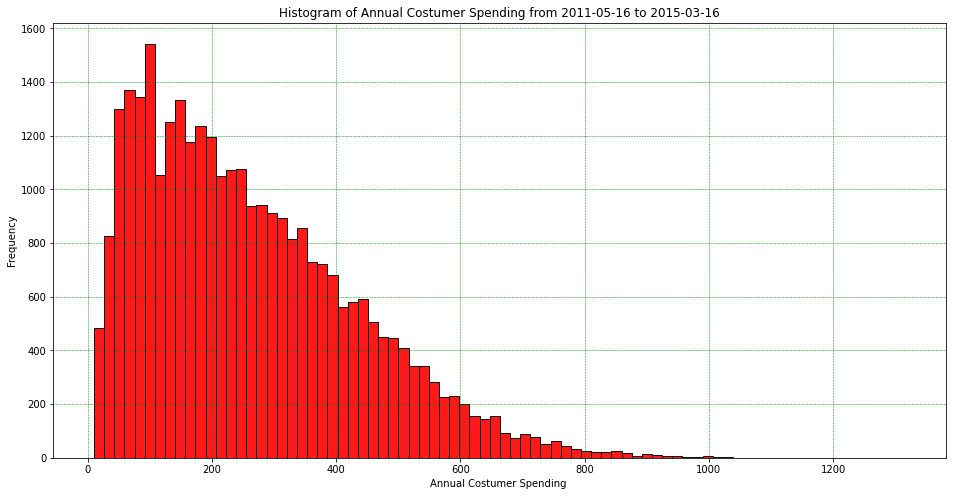

In [0]:
# 2 Plotting the histogram of sum: 

#importing library 
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) #changing the figure size for better visualization of the data

bins, counts = clnt_annual_aggregations.select('ann_txn_amt_sum').rdd.flatMap(lambda x: x).histogram(80) # creating the bins and counts of the histogram 
plt.hist(bins[:-1], bins=bins, weights=counts,color = "red", ec="black",  alpha=0.9) # plotting the histogram and changing the features for better presentation 

# Creating plots labels, titles and grid
plt.ylabel("Frequency")
plt.xlabel("Annual Costumer Spending ")
plt.title("Histogram of Annual Costumer Spending from 2011-05-16 to 2015-03-16")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

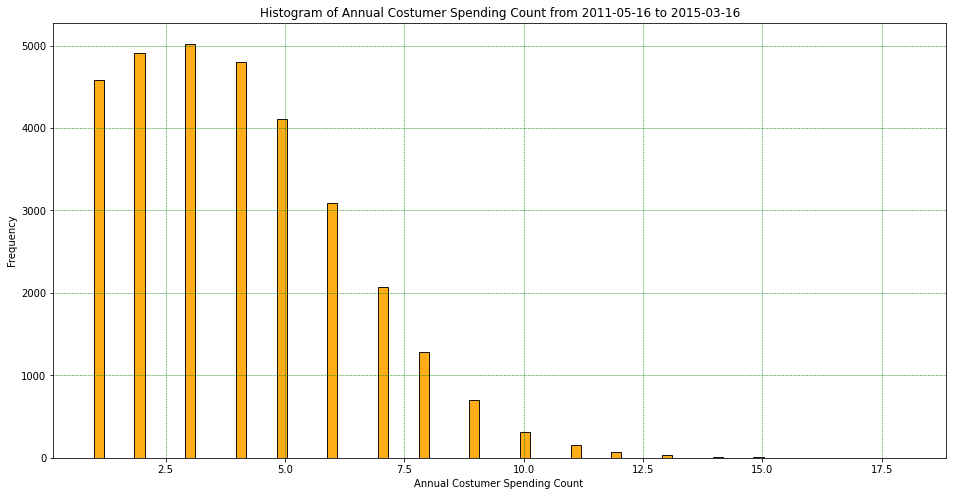

In [0]:
# 2 Plotting the histogram of count:

plt.figure(figsize=(16,8)) #Changing the figure size for better visualization of the data

bins, counts = clnt_annual_aggregations.select('ann_txn_cnt').rdd.flatMap(lambda x: x).histogram(80) # Creating the bins and counts of the histogram 
plt.hist(bins[:-1], bins=bins, weights=counts,color = "orange", ec="black",  alpha=0.9) # Plotting the histogram and changing the features for better presentation 

# Creating plots labels, titles and grid
plt.ylabel("Frequency")
plt.xlabel("Annual Costumer Spending Count ")
plt.title("Histogram of Annual Costumer Spending Count from 2011-05-16 to 2015-03-16")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

In [0]:
# 3: Resetting the index and reshaping the table with the pivot table function to create the clnt_annual_aggregations pivot table shown below with 40 columns. 

# Used PySpark Pivot function to pivot the dataframe accordingy to the YEAR column and groupby customer_id

clnt_annual_aggregations_pivot = clnt_annual_aggregations.groupBy('customer_id').pivot('YEAR').agg(F.first('ann_txn_amt_sum').alias('ann_txn_amt_sum'), F.first('ann_txn_amt_ave').alias('ann_txn_amt_ave'), F.first('ann_txn_amt_std').alias('ann_txn_amt_std'), F.first('ann_txn_amt_var').alias('ann_txn_amt_var'), F.first('ann_txn_amt_sem').alias('ann_txn_amt_sem'), F.first('ann_txn_amt_max').alias('ann_txn_amt_max'), F.first('ann_txn_amt_min').alias('ann_txn_amt_min'), F.first('ann_txn_cnt').alias('ann_txn_cnt')).fillna(0)

clnt_annual_aggregations_pivot.display()

customer_id 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_amt_sem 2011_ann_txn_amt_max 2011_ann_txn_amt_min 2011_ann_txn_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_amt_sem 2012_ann_txn_amt_max 2012_ann_txn_amt_min 2012_ann_txn_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_amt_sem 2013_ann_txn_amt_max 2013_ann_txn_amt_min 2013_ann_txn_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_amt_sem 2014_ann_txn_amt_max 2014_ann_txn_amt_min 2014_ann_txn_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_amt_sem 2015_ann_txn_amt_max 2015_ann_txn_amt_min 2015_ann_txn_cnt CS5241 374 74.8 20.547505931377657 422.2 20.547505931377657 93 45 5 174 58.0 23.259406699226016 541.0 23.259406699226016 83 37 3 293 48.833333333333336 10.778064142816495 116.16666666666667 10.778064142816495 61 37 6 283 70.75 24.26760529320243 588.9166666666666 24.26760529320243 94 37 4 93 93.0 0.0 0.0 0.0 93 93 1 CS2282 185 61.666666666666664 30.74627348693388 945.3333333333333 30.74627348693388 97 41 3 248 62.0 25.468935326524086 648.6666666666666 25.468935326524086 92 35 4 516 73.71428571428571 13.524228699070491 182.90476190476193 13.524228699070491 97 59 7 424 70.66666666666667 18.790068298616337 353.06666666666666 18.790068298616337 91 43 6 79 79.0 0.0 0.0 0.0 79 79 1 CS6001 84 84.0 0.0 0.0 0.0 84 84 1 428 85.6 17.242389625571043 297.29999999999995 17.242389625571043 104 65 5 83 41.5 3.5355339059327378 12.5 3.5355339059327378 44 39 2 727 66.0909090909091 22.783566645521265 519.0909090909091 22.783566645521265 105 43 11 0 0.0 0.0 0.0 0.0 0 0 0 CS2754 185 61.666666666666664 26.025628394590846 677.3333333333334 26.025628394590846 87 35 3 275 68.75 23.128265535198842 534.9166666666666 23.128265535198842 101 46 4 544 68.0 20.632844828435214 425.7142857142857 20.632844828435214 102 39 8 545 90.83333333333333 10.361788777362076 107.36666666666665 10.361788777362076 104 74 6 89 89.0 0.0 0.0 0.0 89 89 1 CS3155 391 78.2 26.752569970004753 715.7 26.752569970004753 105 43 5 503 71.85714285714286 13.107613200332231 171.80952380952377 13.107613200332231 90 49 7 720 80.0 21.1482859825566 447.25 21.1482859825566 101 38 9 174 58.0 21.166010488516726 448.0 21.166010488516726 82 42 3 70 70.0 0.0 0.0 0.0 70 70 1 CS3083 233 58.25 22.911059920192837 524.9166666666666 22.911059920192837 85 35 4 272 68.0 24.61706725018234 606.0 24.61706725018234 91 38 4 239 59.75 24.67623688220444 608.9166666666666 24.67623688220444 93 41 4 283 70.75 18.83923211457056 354.91666666666674 18.83923211457056 94 49 4 42 42.0 0.0 0.0 0.0 42 42 1 CS8367 188 47.0 27.844808013942803 775.3333333333334 27.844808013942803 78 22 4 234 58.5 16.176114078067904 261.66666666666663 16.176114078067904 78 42 4 167 55.666666666666664 20.647840887931437 426.3333333333333 20.647840887931437 70 32 3 139 46.333333333333336 20.744477176668813 430.3333333333333 20.744477176668813 65 24 3 0 0.0 0.0 0.0 0.0 0 0 0 CS3950 128 64.0 25.45584412271571 648.0 25.45584412271571 82 46 2 47 47.0 0.0 0.0 0.0 47 47 1 422 70.33333333333333 22.826884734160874 521.0666666666667 22.826884734160874 97 38 6 527 65.875 24.008555022860374 576.4107142857141 24.008555022860374 105 36 8 125 62.5 36.062445840513924 1300.5 36.062445840513924 88 37 2 CS3128 170 85.0 8.48528137423857 72.0 8.48528137423857 91 79 2 271 67.75 27.83732506306356 774.9166666666666 27.83732506306356 100 37 4 553 61.44444444444444 17.321309932501578 300.02777777777777 17.321309932501578 88 38 9 478 59.75 16.429503079173497 269.92857142857144 16.429503079173497 91 35 8 0 0.0 0.0 0.0 0.0 0 0 0 CS3993 619 77.375 15.927850720402565 253.6964285714285 15.927850720402565 103 62 8 322 53.666666666666664 14.637850479720944 214.26666666666665 14.637850479720944 79 39 6 0 0.0 0.0 0.0 0.0 0 0 0 388 77.6 17.03819239238717 290.3 17.03819

#### The following is an explanation on what and why I imputed the NaN enteries with:

I impute the NaN enteries with zeros because the above table is grouped by customer id and the year of the transaction, meaning that each column is showing one of the statistical features (e.g., summation, average, standard deviation and so on for the customer annual transaction) of a client. If a value is missing, the reason can be one of the following:

- The customer has made no transaction that year (in the case where the sum column is NaN) (case 1)

- The customer has only made one transaction that year (in the case where std, var, and sem are NaN) (case 2)

- During the data gathering phase, the transaction was not captured for that particular year and hence there is a NaN value. Since we have no reason to assume this being     the case, we will not try to consider this case. 


In case 1, it makes sense to impute with zero for all NaN values since no transaction has occured that year. In case 2, since there has only been one transaction, the std, var, and sem will be zero since the std, var, or sem for one number is zero and thats why it makes sense to impute the NaN values with zero.

In [0]:
# Self Check: Seeing if the number of the columns are correct 
print (len(clnt_annual_aggregations_pivot.columns))

# The dataframe ("clnt_annual_aggregations_pivot") has 41 columns, this is because it has 8 functions (sum, mean, std, var, sem, max, min, count) and 5 years (2011, 2012, 2013, 2014, 2015) combining for 40 columns and the additional column is for the customer id.

41


In [0]:
# Self check: Printing all the column names 
clnt_annual_aggregations_pivot.columns

Out[15]: ['customer_id',
 '2011_ann_txn_amt_sum',
 '2011_ann_txn_amt_ave',
 '2011_ann_txn_amt_std',
 '2011_ann_txn_amt_var',
 '2011_ann_txn_amt_sem',
 '2011_ann_txn_amt_max',
 '2011_ann_txn_amt_min',
 '2011_ann_txn_cnt',
 '2012_ann_txn_amt_sum',
 '2012_ann_txn_amt_ave',
 '2012_ann_txn_amt_std',
 '2012_ann_txn_amt_var',
 '2012_ann_txn_amt_sem',
 '2012_ann_txn_amt_max',
 '2012_ann_txn_amt_min',
 '2012_ann_txn_cnt',
 '2013_ann_txn_amt_sum',
 '2013_ann_txn_amt_ave',
 '2013_ann_txn_amt_std',
 '2013_ann_txn_amt_var',
 '2013_ann_txn_amt_sem',
 '2013_ann_txn_amt_max',
 '2013_ann_txn_amt_min',
 '2013_ann_txn_cnt',
 '2014_ann_txn_amt_sum',
 '2014_ann_txn_amt_ave',
 '2014_ann_txn_amt_std',
 '2014_ann_txn_amt_var',
 '2014_ann_txn_amt_sem',
 '2014_ann_txn_amt_max',
 '2014_ann_txn_amt_min',
 '2014_ann_txn_cnt',
 '2015_ann_txn_amt_sum',
 '2015_ann_txn_amt_ave',
 '2015_ann_txn_amt_std',
 '2015_ann_txn_amt_var',
 '2015_ann_txn_amt_sem',
 '2015_ann_txn_amt_max',
 '2015_ann_txn_amt_min',
 '2015_ann_txn_c

In [0]:
# 5. Saving the dataframe as a CSV file. 

display(clnt_annual_aggregations_pivot) 
# Click the download button below the table display to save the csv file to your local computer 

customer_id 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_amt_sem 2011_ann_txn_amt_max 2011_ann_txn_amt_min 2011_ann_txn_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_amt_sem 2012_ann_txn_amt_max 2012_ann_txn_amt_min 2012_ann_txn_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_amt_sem 2013_ann_txn_amt_max 2013_ann_txn_amt_min 2013_ann_txn_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_amt_sem 2014_ann_txn_amt_max 2014_ann_txn_amt_min 2014_ann_txn_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_amt_sem 2015_ann_txn_amt_max 2015_ann_txn_amt_min 2015_ann_txn_cnt CS5241 374 74.8 20.547505931377657 422.2 20.547505931377657 93 45 5 174 58.0 23.259406699226016 541.0 23.259406699226016 83 37 3 293 48.833333333333336 10.778064142816495 116.16666666666667 10.778064142816495 61 37 6 283 70.75 24.26760529320243 588.9166666666666 24.26760529320243 94 37 4 93 93.0 0.0 0.0 0.0 93 93 1 CS2282 185 61.666666666666664 30.74627348693388 945.3333333333333 30.74627348693388 97 41 3 248 62.0 25.468935326524086 648.6666666666666 25.468935326524086 92 35 4 516 73.71428571428571 13.524228699070491 182.90476190476193 13.524228699070491 97 59 7 424 70.66666666666667 18.790068298616337 353.06666666666666 18.790068298616337 91 43 6 79 79.0 0.0 0.0 0.0 79 79 1 CS6001 84 84.0 0.0 0.0 0.0 84 84 1 428 85.6 17.242389625571043 297.29999999999995 17.242389625571043 104 65 5 83 41.5 3.5355339059327378 12.5 3.5355339059327378 44 39 2 727 66.0909090909091 22.783566645521265 519.0909090909091 22.783566645521265 105 43 11 0 0.0 0.0 0.0 0.0 0 0 0 CS2754 185 61.666666666666664 26.025628394590846 677.3333333333334 26.025628394590846 87 35 3 275 68.75 23.128265535198842 534.9166666666666 23.128265535198842 101 46 4 544 68.0 20.632844828435214 425.7142857142857 20.632844828435214 102 39 8 545 90.83333333333333 10.361788777362076 107.36666666666665 10.361788777362076 104 74 6 89 89.0 0.0 0.0 0.0 89 89 1 CS3155 391 78.2 26.752569970004753 715.7 26.752569970004753 105 43 5 503 71.85714285714286 13.107613200332231 171.80952380952377 13.107613200332231 90 49 7 720 80.0 21.1482859825566 447.25 21.1482859825566 101 38 9 174 58.0 21.166010488516726 448.0 21.166010488516726 82 42 3 70 70.0 0.0 0.0 0.0 70 70 1 CS3083 233 58.25 22.911059920192837 524.9166666666666 22.911059920192837 85 35 4 272 68.0 24.61706725018234 606.0 24.61706725018234 91 38 4 239 59.75 24.67623688220444 608.9166666666666 24.67623688220444 93 41 4 283 70.75 18.83923211457056 354.91666666666674 18.83923211457056 94 49 4 42 42.0 0.0 0.0 0.0 42 42 1 CS8367 188 47.0 27.844808013942803 775.3333333333334 27.844808013942803 78 22 4 234 58.5 16.176114078067904 261.66666666666663 16.176114078067904 78 42 4 167 55.666666666666664 20.647840887931437 426.3333333333333 20.647840887931437 70 32 3 139 46.333333333333336 20.744477176668813 430.3333333333333 20.744477176668813 65 24 3 0 0.0 0.0 0.0 0.0 0 0 0 CS3950 128 64.0 25.45584412271571 648.0 25.45584412271571 82 46 2 47 47.0 0.0 0.0 0.0 47 47 1 422 70.33333333333333 22.826884734160874 521.0666666666667 22.826884734160874 97 38 6 527 65.875 24.008555022860374 576.4107142857141 24.008555022860374 105 36 8 125 62.5 36.062445840513924 1300.5 36.062445840513924 88 37 2 CS3128 170 85.0 8.48528137423857 72.0 8.48528137423857 91 79 2 271 67.75 27.83732506306356 774.9166666666666 27.83732506306356 100 37 4 553 61.44444444444444 17.321309932501578 300.02777777777777 17.321309932501578 88 38 9 478 59.75 16.429503079173497 269.92857142857144 16.429503079173497 91 35 8 0 0.0 0.0 0.0 0.0 0 0 0 CS3993 619 77.375 15.927850720402565 253.6964285714285 15.927850720402565 103 62 8 322 53.666666666666664 14.637850479720944 214.26666666666665 14.637850479720944 79 39 6 0 0.0 0.0 0.0 0.0 0 0 0 388 77.6 17.03819239238717 290.3 17.03819

#### Explaning the possible disadvantages in capturing client transaction behavior with the annual features described in this section:

The intention of this project was to use the retail data to predict clients response to promotional campaign. Using annual feature may not be the best way to predict client behaviour because retail purchase activity is seasonal (e.g., clients buy more in some months like december for christmas), and just looking at statistical features on an annaul basis doesnt capture the clients behaviour in enough detail (monthly and daily client information is lost). Futhermore, promotion campaigns normally dont run for a entire year so analyzing client annual behaviour doesnt make sense in this context.

####1.3 Creating monthly aggregations

In [0]:
# 1. Creating the dataframe that captures the monthly sum and count of transactions per client

# Grouping the dataframe in accordance with customer_id and ME_DT and calculating the sum and counts 
clnt_monthly_aggregations = df.groupBy("customer_id", "ME_DT").agg(F.sum("tran_amount").alias("mth_txn_amt_sum"), F.count("tran_amount").alias("mth_txn_cnt"))
clnt_monthly_aggregations.display()

Number_Rows = clnt_monthly_aggregations.count() #Finding the number of rows of the dataframe                   
print('Number of Rows are: ', Number_Rows)

Number of Rows are:  103234


customer_id ME_DT mth_txn_amt_sum mth_txn_cnt CS2724 2012-02-29 93 1 CS5201 2011-07-31 152 2 CS4681 2014-02-28 96 1 CS3182 2013-01-31 148 2 CS1492 2011-09-30 101 1 CS2699 2013-11-30 64 1 CS3758 2014-04-30 55 1 CS5181 2012-04-30 96 1 CS5185 2011-05-31 56 1 CS4278 2013-08-31 99 2 CS2434 2012-09-30 75 1 CS3457 2011-09-30 74 1 CS4203 2012-02-29 84 1 CS5220 2013-07-31 94 1 CS3494 2013-09-30 221 3 CS3786 2013-01-31 77 2 CS3959 2012-12-31 212 3 CS1258 2011-06-30 95 1 CS3540 2013-03-31 67 1 CS3258 2011-11-30 42 1 CS1862 2014-05-31 101 1 CS2432 2014-09-30 91 1 CS6017 2013-05-31 56 1 CS1347 2011-11-30 40 1 CS4890 2014-06-30 136 2 CS1503 2012-04-30 224 3 CS5424 2012-06-30 98 1 CS3561 2013-04-30 187 2 CS4870 2011-07-31 204 3 CS2036 2012-07-31 63 1 CS3796 2011-09-30 129 2 CS2336 2015-02-28 256 3 CS2470 2013-06-30 80 1 CS5028 2014-08-31 82 1 CS1597 2011-07-31 181 3 CS5082 2013-12-31 46 1 CS1410 2014-02-28 88 1 CS3638 2013-07-31 58 1 CS4839 2013-08-31 202 3 CS3106 2014-01-31 71 1 CS2443 2014-05-31 94 1 CS1285 2013-12-31 155 2 CS2353 2013-12-31 74 1 CS3177 2014-09-30 82 1 CS3069 2012-08-31 75 1 CS5649 2014-12-31 39 1 CS5461 2014-11-30 104 1 CS5919 2011-09-30 43 1 CS1644 2014-07-31 137 2 CS2794 2013-02-28 175 2 CS4730 2014-12-31 58 1 CS5776 2013-03-31 86 1 CS2020 2013-03-31 67 1 CS6002 2014-03-31 233 3 CS5497 2014-03-31 175 2 CS1630 2012-12-31 89 1 CS3971 2012-11-30 51 1 CS5525 2012-06-30 95 1 CS3257 2012-07-31 52 1 CS2413 2011-06-30 47 1 CS1934 2011-08-31 69 1 CS3334 2015-02-28 144 2 CS1120 2011-09-30 151 2 CS2189 2012-12-31 64 1 CS5498 2014-01-31 140 2 CS3871 2013-03-31 38 1 CS2920 2014-02-28 175 2 CS2774 2014-11-30 85 1 CS4031 2014-05-31 79 1 CS4580 2012-02-29 42 1 CS4786 2011-08-31 151 2 CS4974 2014-06-30 103 2 CS1385 2015-02-28 104 1 CS3845 2011-10-31 43 1 CS1218 2011-10-31 66 1 CS2006 2014-10-31 103 1 CS5343 2014-11-30 67 1 CS5614 2011-05-31 61 1 CS3933 2014-11-30 75 1 CS4019 2013-01-31 51 1 CS5863 2013-04-30 46 1 CS3730 2014-03-31 198 3 CS5484 2012-06-30 116 2 CS4971 2012-09-30 103 1 CS2508 2012-11-30 147 2 CS1631 2011-11-30 167 2 CS4955 2014-07-31 153 2 CS3132 2014-11-30 94 1 CS2632 2012-07-31 102 1 CS3241 2014-08-31 75 1 CS4877 2014-11-30 46 1 CS5950 2011-10-31 168 2 CS3576 2014-10-31 57 1 CS1796 2014-03-31 61 1 CS1833 2012-12-31 59 1 CS3685 2013-12-31 182 2 CS1560 2011-09-30 56 1 CS2894 2014-03-31 145 2 CS1230 2012-02-29 54 1 CS3145 2014-10-31 58 1 CS3883 2013-02-28 57 1 CS5310 2012-03-31 42 1 CS3304 2013-11-30 156 2 CS5979 2013-04-30 54 1 CS5880 2014-02-28 78 1 CS3918 2013-10-31 96 1 CS4510 2012-10-31 138 2 CS5367 2012-01-31 187 2 CS1593 2012-01-31 75 1 CS2959 2014-09-30 77 1 CS1705 2013-07-31 86 1 CS4440 2012-11-30 66 1 CS1537 2011-09-30 177 3 CS3283 2012-08-31 80 1 CS3773 2011-09-30 96 1 CS4104 2011-06-30 206 2 CS3794 2011-07-31 73 1 CS2313 2012-06-30 49 1 CS4118 2012-12-31 86 1 CS3529 2011-10-31 156 2 CS2488 2013-02-28 130 2 CS2216 2014-01-31 162 2 CS3652 2012-08-31 114 2 CS1199 2012-09-30 150 2 CS2392 2014-10-31 105 1 CS3360 2013-08-31 124 2 CS3276 2013-01-31 54 1 CS1317 2013-05-31 87 1 CS5388 2013-12-31 143 2 CS4268 2012-03-31 63 1 CS4413 2012-10-31 118 2 CS2824 2012-07-31 104 2 CS2369 2012-09-30 80 1 CS1302 2011-05-31 102 1 CS3754 2012-11-30 130 2 CS2093 2013-07-31 91 1 CS5015 2014-09-30 63 1 CS5742 2013-03-31 184 2 CS4246 2014-03-31 142 2 CS3856 2011-07-31 53 1 CS2171 2014-08-31 70 1 CS3977 2014-05-31 102 1 CS1348 2014-03-31 96 1 CS4642 2014-06-30 101 2 CS3369 2012-04-30 39 1 CS4253 2012-12-31 41 1 CS3012 2011-12-31 92 1 CS5107 2012-01-31 41 1 CS5534 2012-09-30 58 1 CS3877 2013-06-30 143 2 CS1115 2014-01-31 70 1 CS4594 2013-11-30 91 1 CS5570 2014-08-31 58 1 CS4344 2013-01-31 68 1 CS3488 2014-11-30 37 1 CS3758 2011-08-31 56 1 CS3715 2011-10-31 77 1 CS4944 2013-10-31 167 3 CS5088 2011-11-30 71 1 CS1444 2014-01-31 59 1 CS3570 2013-09-30 40 1 CS2985 2011-09-30 50 1 CS5748 2014-11-30 72 1 CS1363 2011-12-31 97 1 CS2845 2015-01-31 74 1 CS1751 2014-10-31 68 1 CS4123 2014-12-31 56 1 CS4807 2014-06-30 41 1 CS1510 2011-06-30 60 1 CS1944

In [0]:
# Self-check: Viewing the dataframe 
clnt_monthly_aggregations.filter(clnt_monthly_aggregations.customer_id == "CS1112").drop("customer_id").orderBy("ME_DT").display(15)

ME_DT mth_txn_amt_sum mth_txn_cnt 2011-06-30 56 1 2011-08-31 96 1 2011-10-31 60 1 2012-04-30 56 1 2012-06-30 52 1 2012-07-31 81 1 2012-09-30 72 1 2012-12-31 76 1 2013-03-31 105 1 2013-07-31 36 1 2013-11-30 71 1 2014-04-30 63 1 2014-07-31 90 1 2014-12-31 59 1 2015-01-31 39 1

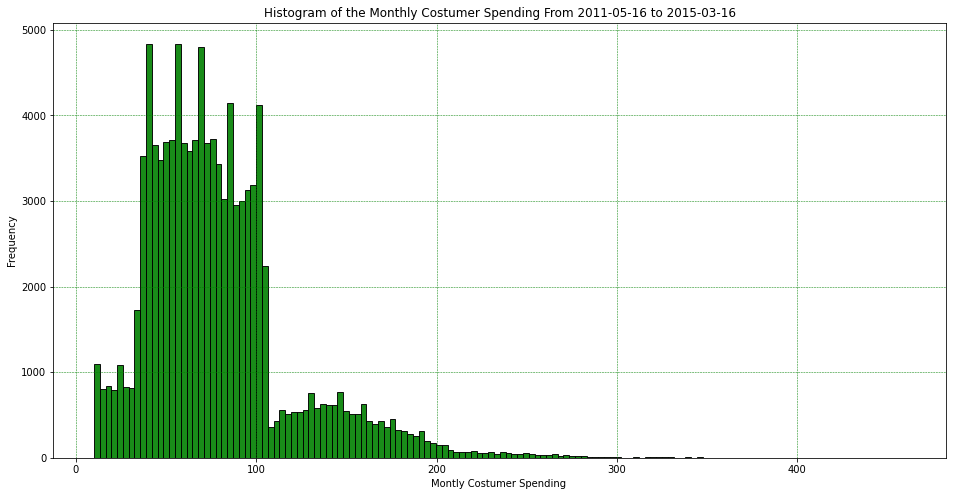

In [0]:
# 2: Creating a histogram of both columns I just created. 

# Histogram for mth_txn_amt_sum column 

plt.figure(figsize=(16,8)) #changing the figure size for better visualization of the data

bins, counts = clnt_monthly_aggregations.select('mth_txn_amt_sum').rdd.flatMap(lambda x: x).histogram(140) # creating the bins and counts of the histogram 
plt.hist(bins[:-1], bins=bins, weights=counts,color = "green", ec="black",  alpha=0.9) # plotting the histogram and changing the features for better presentation 

plt.ylabel("Frequency")
plt.xlabel("Montly Costumer Spending ")
plt.title("Histogram of the Monthly Costumer Spending From 2011-05-16 to 2015-03-16")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

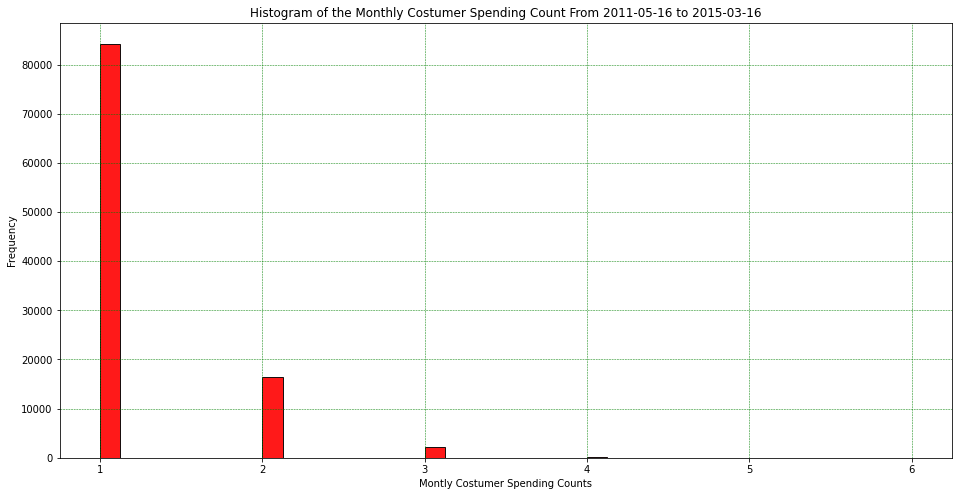

In [0]:
# Histogram for mth_txn_cnt column 

plt.figure(figsize=(16,8)) #changing the figure size for better visualization of the data

bins, counts = clnt_monthly_aggregations.select('mth_txn_cnt').rdd.flatMap(lambda x: x).histogram(40) # creating the bins and counts of the histogram 
plt.hist(bins[:-1], bins=bins, weights=counts,color = "red", ec="black",  alpha=0.9) # plotting the histogram and changing the features for better presentation 

plt.ylabel("Frequency")
plt.xlabel("Montly Costumer Spending Counts")
plt.title("Histogram of the Monthly Costumer Spending Count From 2011-05-16 to 2015-03-16")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

#### The following are my observations:

Most customers in a given month well only have a signle transanction and customers will rarely have more than 3 transactions in a given month. The transaction amount per month for most customers is between $40 and $100.

In [0]:
# Finding the most common value in mth_txn_amt_sum 
Month_Sum_Freq = clnt_monthly_aggregations.groupBy("mth_txn_amt_sum").agg(F.count("mth_txn_amt_sum").alias("Frequency")).orderBy(col("Frequency").desc())
Month_Sum_Freq.display()

#Self-check: Filtering clnt_monthly_aggregations dataframe for when mth_txn_amt_sum = 77 and counting the number of rows to get the frequency to check with Month_Sum_Freq dataframe output 
clnt_monthly_aggregations.filter(clnt_monthly_aggregations.mth_txn_amt_sum == 77).drop("customer_id").orderBy("ME_DT").count()  

Out[21]: 1293

mth_txn_amt_sum Frequency 77 1293 54 1291 53 1280 67 1275 60 1264 49 1262 40 1248 78 1244 43 1242 63 1242 74 1237 76 1236 66 1232 73 1231 50 1228 71 1228 79 1227 56 1227 44 1221 64 1217 69 1209 72 1208 59 1208 58 1208 41 1206 65 1206 57 1200 51 1200 61 1199 55 1198 39 1197 75 1197 38 1196 68 1196 45 1192 42 1185 48 1183 35 1175 37 1172 46 1165 70 1160 36 1155 52 1145 47 1130 62 1129 95 1095 97 1081 86 1069 104 1067 99 1060 98 1045 102 1038 105 1037 103 1035 82 1035 92 1034 85 1029 94 1028 101 1026 87 1023 84 1019 100 1019 96 1006 90 1005 81 1000 89 996 91 985 83 984 93 975 80 960 88 945 18 298 26 286 31 286 28 286 19 285 16 283 15 281 11 277 33 276 10 275 13 275 34 273 24 273 32 271 27 271 21 271 22 266 29 265 23 265 12 263 20 259 25 256 17 255 30 254 14 243 136 231 133 215 140 214 142 213 144 213 141 205 130 202 138 201 145 199 137 199 147 197 149 196 128 196 139 193 152 192 125 192 135 190 148 190 129 189 126 189 143 188 118 184 132 182 131 182 120 182 157 180 150 180 156 179 121 179 123 178 146 177 117 175 154 174 134 174 122 173 158 173 127 173 124 170 151 165 113 159 119 158 169 156 161 156 160 155 163 152 159 150 111 150 155 149 153 149 110 147 114 141 168 140 165 139 164 138 116 138 162 136 106 135 173 135 166 134 170 133 176 133 112 127 167 126 115 124 109 124 107 120 172 118 174 117 108 113 180 112 182 110 179 109 171 105 178 103 185 99 177 99 181 99 175 99 183 99 191 95 186 95 188 91 189 87 184 84 192 80 187 78 194 70 190 70 193 66 195 66 199 62 196 61 198 59 200 56 197 52 202 51 207 43 203 42 205 40 201 38 204 36 216 33 206 30 208 29 210 29 219 27 218 27 221 25 229 25 240 23 214 23 212 22 227 22 209 22 211 21 239 21 226 21 213 21 231 20 215 20 224 20 237 18 225 18 230 18 238 18 244 17 246 17 222 17 242 16 220 16 228 16 260 16 232 16 236 16 249 15 245 15 233 15 251 15 223 15 252 15 259 15 256 14 217 13 255 13 253 13 241 12 264 12 254 11 270 11 263 11 250 11 262 11 267 11 248 11 275 10 271 10 234 10 257 10 269 10 272 10 261 10 277 10 273 10 235 10 295 9 247 9 266 9 243 8 287 8 280 8 265 8 274 7 281 6 299 6 284 6 276 6 290 6 328 5 316 5 278 5 283 5 258 5 330 5 286 5 268 5 294 4 289 4 312 4 282 4 301 4 347 4 279 4 300 3 317 3 288 3 297 3 292 3 291 3 323 3 324 2 321 2 298 2 327 2 310 2 335 2 376 2 308 2 350 2 311 2 338 2 320 2 414 2 285 2 341 2 293 1 442 1 296 1 364 1 343 1 403 1 346 1 332 1 360 1 307 1 460 1 352 1 422 1 358 1 304 1 318 1 303 1 373 1 305 1 314 1 340 1 319 1 339 1 333 1 379 1 322 1 371 1 302 1 374 1 313 1 361 1 345 1 337 1 400 1 315 1

In [0]:
# Finding the maximum value

MAX_Month_Sum = clnt_monthly_aggregations.select("mth_txn_amt_sum").rdd.max()[0]
print("The Maximum Value for the mth_txn_amt_sum Column is: " , MAX_Month_Sum)

MAX_Month_count= clnt_monthly_aggregations.select(F.max(F.col("mth_txn_cnt")).alias("MAX")).limit(1).collect()[0].MAX
print("The Maximum Value for the mth_txn_cnt Column is: " , MAX_Month_count)

The Maximum Value for the mth_txn_amt_sum Column is:  460
The Maximum Value for the mth_txn_cnt Column is:  6


#### The most common and maximum values for each column is:

Most common Values: 
    
   From the above code and histogram 
   
   1. mth_txn_amt_sum: 77
   2. mth_txn_cnt: 1
____________________________________________
Maximum Values: 

   From the above code and histogram

   1. mth_txn_amt_sum: 460
   2. mth_txn_cnt: 6

In [0]:
# Finding the most common value in the ann_txn_amt_sum 
Annual_Sum_Freq = clnt_annual_aggregations.groupBy("ann_txn_amt_sum").agg(F.count("ann_txn_amt_sum").alias("Frequency")).orderBy(col("Frequency").desc())
Annual_Sum_Freq.display()

#Self-check: Filtering clnt_annual_aggregations dataframe for when ann_txn_amt_sum = 97 and counting the number of rows to get the frequency to check with Annual_Sum_Freq dataframe output 
print(clnt_annual_aggregations.filter(clnt_annual_aggregations.ann_txn_amt_sum == 97).drop("customer_id").orderBy("YEAR").count())


# Finding the most common value in the ann_txn_amt_sum f
Annual_Sum_Freq = clnt_annual_aggregations.groupBy("ann_txn_cnt").agg(F.count("ann_txn_cnt").alias("Frequency")).orderBy(col("Frequency").desc())
Annual_Sum_Freq.display()

111


ann_txn_amt_sum Frequency 97 111 105 110 94 109 103 109 101 108 95 107 74 105 72 102 88 99 75 98 71 98 98 97 169 96 90 96 73 95 147 95 53 95 92 95 76 95 136 94 144 94 102 94 174 93 137 93 70 93 218 92 104 92 132 91 173 90 143 90 59 90 78 90 79 89 50 88 200 88 141 88 93 88 89 87 99 87 62 86 160 86 149 86 56 85 142 85 158 84 150 84 118 84 181 84 69 84 83 84 86 84 186 84 81 84 100 83 123 83 134 83 41 83 39 83 178 83 138 82 197 82 82 82 65 82 140 82 85 82 225 82 139 82 54 81 190 81 187 81 130 81 63 81 171 81 77 81 183 81 84 81 189 81 192 80 42 80 153 80 155 80 202 80 185 79 67 79 96 78 128 78 135 78 212 77 208 77 168 77 60 77 61 77 55 77 116 76 45 76 91 76 184 76 175 76 131 75 44 75 51 75 166 75 172 75 124 75 228 75 146 74 48 74 199 74 223 74 40 74 176 73 243 73 188 73 64 73 57 73 156 73 230 72 46 72 148 72 275 72 182 72 157 72 127 72 234 71 170 71 115 71 252 71 165 71 269 71 66 71 112 71 43 71 68 70 249 70 207 70 117 70 282 70 240 70 267 70 47 70 241 70 229 70 191 70 49 69 245 69 36 69 180 69 318 69 288 69 38 69 214 69 198 69 235 68 224 68 80 68 233 68 193 67 257 67 239 67 246 67 205 67 179 67 238 67 110 67 145 67 58 67 113 66 129 66 283 66 162 66 258 65 210 65 125 65 37 65 195 65 154 65 152 65 133 65 211 65 126 65 201 65 87 65 215 64 167 64 361 64 177 64 213 64 35 64 286 64 194 64 256 64 278 64 151 64 254 63 216 63 52 63 301 63 159 63 227 63 232 63 161 62 226 62 111 62 164 62 217 62 274 62 311 62 203 62 261 62 289 62 297 62 196 62 308 61 204 61 260 61 319 61 219 61 270 60 326 60 222 60 338 60 250 60 108 60 255 60 320 60 377 60 317 60 120 59 119 59 330 59 280 59 272 59 248 59 107 59 209 59 346 58 305 58 316 58 378 58 121 58 285 58 206 58 321 58 262 58 343 57 244 57 381 57 237 57 242 57 298 57 251 57 303 57 231 57 333 56 287 56 290 56 336 56 106 56 279 55 331 55 276 55 236 55 314 55 281 55 340 55 247 55 220 55 293 55 302 54 265 54 307 54 322 54 300 54 284 54 398 54 114 54 337 54 341 54 328 53 373 53 259 53 332 52 359 52 335 52 163 52 253 52 348 52 271 52 263 51 264 51 312 51 323 51 371 51 339 50 295 50 354 50 268 50 309 50 327 50 360 50 351 50 296 50 357 50 358 50 370 50 266 50 386 49 325 49 304 49 352 49 294 49 306 49 344 49 122 49 310 49 313 49 109 49 299 49 356 48 350 48 273 48 363 47 355 47 221 47 384 47 315 46 367 46 353 46 342 45 390 45 277 45 447 45 376 45 389 44 347 44 394 44 324 44 391 44 441 43 388 43 345 43 366 43 419 43 455 43 365 43 379 42 408 42 430 42 444 42 402 42 418 42 393 41 375 41 426 41 409 41 349 41 382 41 450 41 427 41 420 40 292 40 28 40 334 40 406 40 438 39 404 39 19 39 26 38 442 38 429 38 400 38 424 38 392 38 362 38 421 38 432 38 401 38 469 38 451 38 380 38 407 37 475 37 369 37 403 37 374 37 24 37 516 37 423 36 383 36 422 36 462 36 452 36 491 36 410 36 396 36 456 36 461 36 395 36 385 36 454 35 413 35 473 35 291 35 443 35 364 35 32 34 414 34 458 34 440 34 507 34 449 33 490 33 465 33 472 33 25 33 468 33 445 33 20 33 387 33 411 33 435 33 513 33 415 33 446 32 433 32 471 32 428 32 372 31 416 31 431 31 22 31 368 31 11 30 541 30 466 30 486 30 399 30 501 29 484 29 532 29 27 29 497 29 514 29 412 29 467 29 14 29 436 29 457 29 34 28 487 28 434 28 30 28 439 28 499 28 425 28 476 28 488 28 29 28 510 28 329 28 417 27 12 27 31 27 464 27 459 27 405 27 463 27 500 26 498 26 485 26 470 26 524 26 33 26 23 26 16 26 18 26 479 26 509 25 538 25 453 25 521 25 477 25 519 25 397 25 481 25 544 25 518 25 483 25 437 25 17 25 492 25 525 25 503 25 448 24 494 24 587 24 505 24 540 23 460 23 474 23 512 23 537 23 599 23 480 23 10 23 549 22 552 22 21 22 545 22 534 22 489 22 526 22 558 22 502 22 511 21 539 21 565 21 556 21 555 21 506 21 523 21 478 21 496 21 508 21 536 20 13 20 531 20 15 20 522 20 482 20 515 19 557 19 543 19 569 19 520 19 527 19 504 19 553 19 495 19 529 18 572 18 561 18 571 18 581 18 493 18 530 18 542 17 546 17 597 17 591 17 517 17 535 17 547 16 582 16 580 16 560 16 611 16 562 16 554 16 579 15 584 15 550 15 559 15 585 15 551 15 606 15 595 15 528 14 567 14 576 14 604 14 610 14 533 14 594 14 663 14 598 14 570 14 620 14 589 14 573

ann_txn_cnt Frequency 3 5023 2 4908 4 4798 1 4587 5 4107 6 3085 7 2076 8 1278 9 700 10 311 11 151 12 70 13 33 14 6 15 4 17 1 18 1 16 1

In [0]:
# Finding the maximum value for the clnt_annual_aggregation dataframe:

MAX_Annual_Sum = clnt_annual_aggregations.select("ann_txn_amt_sum").rdd.max()[0]
print("The Maximum Value for the ann_txn_amt_sum Column is: " , MAX_Annual_Sum)

MAX_Annual_count= clnt_annual_aggregations.select(F.max(F.col("ann_txn_cnt")).alias("MAX")).limit(1).collect()[0].MAX
print("The Maximum Value for the ann_txn_cnt Column is: " , MAX_Annual_count) 

The Maximum Value for the ann_txn_amt_sum Column is:  1317
The Maximum Value for the ann_txn_cnt Column is:  18


#### How do my findings here compare with the ones in section 1.2?

Most common Values for clnt_annual_aggregations dataframe: 
    
   From the above code and histogram 
   
   1. ann_txn_amt_sum: 97
   2. ann_txn_cnt: 3
   
Comparing ann_txn_amt_sum of 97 with the clnt_monthly_aggregations dataframe that has a sum count of 77 we can conclude that most people complete their transactions in      certain months of the year and dont spend as much in the rest of the year. Since the ann_txn_cnt is 3 and mth_txn_cnt is 1 we can conclude that most people dont buy anyting is a given year, and most they buy 1 to 3 times in a year. 
____________________________________________
Maximum Values clnt_annual_aggregations dataframe: 

   From the above code and histogram

   1. ann_txn_amt_sum: 1317
   2. ann_txn_cnt: 18
   

We cant draw too many conclusions from the maximum amounts for the clients monthly and annual dataframes as we dont know which client these numbers are allocated to. For example, all four of these metrics could be for one client or it can for multiple different clients. 


Also, we can see that the maximum and common amounts for both annaul spending and counts is higher then the maximum and common amounts for the monthly client spending

#### 1.4 Creating the base table for the rolling window features

In [0]:
# 1.Creating a numpy array of the unique elements in columns ’customer_id’ and ’ME_DT’ of the txn table I created in section 1.1.

clnt_no = df.select("customer_id").distinct()                 # Finding the unique elements for the customer_id column in the dataframe in section 1.1
print ("Number of Unique Customers ID's Are: ", clnt_no.count()) # Finding the counts for the me_dt unique values
print ("clnt_no type is: ", type(clnt_no))                    # printing type clnt_no
display(clnt_no)

print ("-------------------------------------")               # Adding space for better visualization of the output 
me_dt = df.select("ME_DT").distinct()                         # Finding the unique elements for the ME_DT column 
print ("Number of Unique Dates(Months) Are: ", me_dt.count()) # Finding the counts for the me_dt unique values
print ("me_dt type is: ", type(me_dt))
display(me_dt)

Number of Unique Customers ID's Are:  6889
clnt_no type is:  <class 'pyspark.sql.dataframe.DataFrame'>
-------------------------------------
Number of Unique Dates(Months) Are:  47
me_dt type is:  <class 'pyspark.sql.dataframe.DataFrame'>


customer_id CS6001 CS3128 CS5241 CS3155 CS4564 CS2544 CS4952 CS5810 CS2305 CS5638 CS5499 CS3176 CS3659 CS3854 CS4024 CS5790 CS2809 CS5126 CS3367 CS5038 CS3857 CS2729 CS6043 CS2493 CS5690 CS2298 CS3450 CS5208 CS1201 CS4147 CS5760 CS1347 CS5785 CS3635 CS4454 CS1558 CS1826 CS5539 CS4991 CS3026 CS4539 CS5624 CS1330 CS5516 CS1673 CS4152 CS4951 CS6067 CS3355 CS3796 CS3441 CS3021 CS3073 CS1590 CS3945 CS2187 CS4695 CS4883 CS4424 CS5345 CS4136 CS5704 CS1891 CS1492 CS4224 CS2743 CS1217 CS2897 CS3157 CS1752 CS3598 CS2442 CS2522 CS5784 CS2934 CS2962 CS3160 CS5181 CS2296 CS6088 CS5212 CS4142 CS1206 CS4557 CS5775 CS5064 CS4395 CS4992 CS5623 CS4782 CS5283 CS3404 CS5264 CS4346 CS3658 CS6092 CS5522 CS1939 CS3629 CS1155 CS5148 CS2231 CS6096 CS2685 CS1273 CS1243 CS3695 CS2452 CS4830 CS2618 CS3641 CS4245 CS1790 CS2185 CS4681 CS2134 CS2419 CS4665 CS3154 CS2712 CS3127 CS2720 CS3424 CS4993 CS5184 CS2311 CS1123 CS1865 CS1746 CS3407 CS3400 CS5480 CS3676 CS1533 CS1474 CS5019 CS5211 CS4243 CS2302 CS4738 CS3732 CS2399 CS1470 CS3180 CS2462 CS4851 CS2505 CS2403 CS1707 CS3454 CS2209 CS2643 CS1415 CS1626 CS2721 CS3552 CS3911 CS2771 CS1235 CS1883 CS4980 CS4654 CS1562 CS2332 CS2753 CS4343 CS6101 CS5171 CS5910 CS5815 CS1882 CS2528 CS4849 CS5376 CS4328 CS5667 CS1697 CS4372 CS2860 CS6085 CS4480 CS4227 CS5402 CS4573 CS3431 CS5630 CS3511 CS2437 CS5812 CS2434 CS3988 CS5154 CS3411 CS1244 CS2359 CS3885 CS2942 CS1164 CS3964 CS3331 CS2531 CS4716 CS4708 CS4094 CS2905 CS1984 CS3506 CS2666 CS1639 CS4338 CS1456 CS5633 CS4306 CS5292 CS6056 CS5925 CS4645 CS1228 CS5761 CS5620 CS1511 CS2234 CS1508 CS3426 CS1653 CS1680 CS3418 CS2289 CS5468 CS2603 CS2703 CS3874 CS3888 CS1696 CS1596 CS1522 CS1171 CS6077 CS3590 CS4967 CS3539 CS1930 CS4355 CS3460 CS1433 CS5382 CS5277 CS2607 CS4174 CS5482 CS2312 CS3787 CS2591 CS5814 CS2490 CS5628 CS2006 CS3291 CS4841 CS4420 CS2011 CS3359 CS1523 CS6087 CS1494 CS5750 CS2714 CS1993 CS4593 CS3181 CS3702 CS4166 CS2329 CS5514 CS4905 CS1961 CS1445 CS4892 CS2745 CS2600 CS1501 CS5976 CS2149 CS4389 CS4763 CS5063 CS4205 CS3927 CS4123 CS2252 CS3555 CS3593 CS4548 CS5533 CS5557 CS4349 CS5708 CS4292 CS4079 CS4418 CS2724 CS1927 CS2580 CS3942 CS2197 CS4121 CS2243 CS4026 CS2687 CS5762 CS1488 CS3782 CS1430 CS6063 CS2217 CS3928 CS1959 CS2859 CS2881 CS2336 CS3802 CS2596 CS1259 CS3775 CS2366 CS4721 CS4752 CS1453 CS5994 CS5114 CS4527 CS1549 CS3525 CS2569 CS5335 CS5724 CS3235 CS5464 CS3039 CS4077 CS6011 CS3780 CS4320 CS5104 CS5299 CS1184 CS2770 CS5370 CS2920 CS3207 CS4109 CS5855 CS1634 CS4757 CS2345 CS4023 CS5489 CS3621 CS5996 CS1893 CS3815 CS1257 CS1770 CS1641 CS4310 CS4629 CS2269 CS1583 CS5902 CS5546 CS6109 CS1624 CS4864 CS3581 CS3708 CS3281 CS3163 CS1471 CS5800 CS1580 CS3683 CS3810 CS2848 CS4667 CS1517 CS5111 CS1452 CS4853 CS1140 CS3182 CS1319 CS4327 CS2843 CS4282 CS5938 CS5721 CS3494 CS2158 CS1343 CS3165 CS4637 CS4675 CS3152 CS1165 CS2104 CS4948 CS5383 CS4354 CS5547 CS2515 CS3886 CS3261 CS3785 CS4694 CS2548 CS2357 CS4895 CS4203 CS4215 CS4330 CS1472 CS2837 CS3177 CS4393 CS5313 CS3419 CS5400 CS2164 CS4259 CS5467 CS2226 CS2555 CS5201 CS2026 CS5461 CS6084 CS4569 CS4237 CS5532 CS3826 CS1481 CS5565 CS3368 CS4924 CS6066 CS6090 CS3692 CS2223 CS3374 CS1438 CS1420 CS2776 CS5930 CS2119 CS2512 CS4086 CS5260 CS2867 CS3713 CS5531 CS4653 CS3510 CS3015 CS4050 CS5582 CS4490 CS2653 CS3249 CS1233 CS4704 CS5431 CS1638 CS3210 CS5490 CS5553 CS2652 CS5387 CS1850 CS4421 CS5975 CS1337 CS2148 CS5275 CS4811 CS5356 CS1633 CS5990 CS1776 CS5229 CS1693 CS2177 CS3518 CS5169 CS4663 CS5182 CS4103 CS4802 CS2887 CS5716 CS5643 CS5287 CS3069 CS1818 CS3100 CS1890 CS1791 CS4724 CS1749 CS5207 CS4311 CS5552 CS4655 CS1328 CS1815 CS5046 CS4908 CS6024 CS2416 CS4884 CS3421 CS3060 CS2469 CS1396 CS5425 CS3174 CS3789 CS4581 CS3276 CS3908 CS3341 CS2797 CS2447 CS1985 CS2463 CS3300 CS5305 CS4285 CS1862 CS3730 CS1270 CS5474 CS2507 CS5763 CS1909 CS3147 CS2253 CS5488 CS2662 CS6098 CS6019 CS5569 CS3960 CS4462 CS4768 CS2352 CS1710 CS5668 CS4391 CS1906 CS5742 CS5811 CS1475 CS6018 CS5566 CS2072 CS5971 CS5616 CS4491 CS5942 CS381

ME_DT 2012-05-31 2013-03-31 2012-08-31 2012-01-31 2014-02-28 2013-05-31 2011-07-31 2011-12-31 2013-02-28 2011-09-30 2013-12-31 2013-04-30 2012-09-30 2014-06-30 2012-04-30 2014-05-31 2015-02-28 2014-11-30 2011-05-31 2013-10-31 2012-02-29 2011-11-30 2013-08-31 2014-12-31 2012-11-30 2014-07-31 2013-01-31 2012-06-30 2014-04-30 2014-01-31 2013-06-30 2013-11-30 2014-10-31 2012-07-31 2011-10-31 2011-08-31 2011-06-30 2013-09-30 2013-07-31 2015-03-31 2014-03-31 2014-09-30 2014-08-31 2012-10-31 2012-12-31 2012-03-31 2015-01-31

In [0]:
# 2. Generating all the possible combinations of ’customer_id’ and ’ME_DT’ using Cross Join
# Cross join creates a table with cartesian product of observation between two tables. For each row of table 1, a mapping takes place with each row of table 2. 

base_table = clnt_no.crossJoin(me_dt)
print ("base_table type is: ", type(base_table))
print ("Number of Rows base_table DataFrame Are: ", base_table.count())
print ("Number of Columns in base_table DataFrame Are: ", len(base_table.columns))

# The number of the rows of a Cartesian (Cross) Join result should be, the rows of the two joining tables multiplied by one another so in our case we have 6889 rows of Customers ID's and 47 Unique Dates(Months) and therefore should have 6889 x 47 rows 

print("") # Adding space for better visualization of the output 

print ("Check:\nNumber_of_Rows_CRS_Joint should be: ", clnt_no.count() * me_dt.count())
# As we can see the check amount and cross joint amount are equal and so cross join is working as we expected

base_table type is:  <class 'pyspark.sql.dataframe.DataFrame'>
Number of Rows base_table DataFrame Are:  323783
Number of Columns in base_table DataFrame Are:  2

Check:
Number_of_Rows_CRS_Joint should be:  323783


In [0]:
# 3. Converting the base_table PySpark dataframe into a pandas object called base_table_pd.

# Importing important library
import pandas as pd

# Renaming the dataframe 
base_table = base_table.withColumnRenamed("customer_id","CLNT_NO")

# Converting the PySpark Dataframe to a Pandas DataFrame  
base_table_pd = base_table.toPandas()
base_table_pd.head() # Prinintg the first 5 rows of the dataframe

CLNT_NO 
 ME_DT 
 
 
 
 
 0 
 CS6001 
 2012-05-31 
 
 
 1 
 CS3128 
 2012-05-31 
 
 
 2 
 CS5241 
 2012-05-31 
 
 
 3 
 CS3155 
 2012-05-31 
 
 
 4 
 CS2754 
 2012-05-31

In [0]:
# 4. Completing two checks:

# First: Filtering for client CS1112 and confirming that the dates fall between 
# the min and max month-dates I identified in section 1.1. Also, confirming that the 
# snapshot of client CS1112 has 47 rows, one for each month in the dataset.

print ("Min and Max dates for section 1.1")
df.agg(F.min("ME_DT"), F.max("ME_DT")).show() # showing the min max dates for section 1.1 

base_table.filter(base_table["CLNT_NO"] == "CS1112").orderBy(col("ME_DT").asc()).display()

# As we can see below, the min and max dates for the base_table dataframe fall between the min and max dates for the dataframe idetified in section 1.1

Min and Max dates for section 1.1
+----------+----------+
|min(ME_DT)|max(ME_DT)|
+----------+----------+
|2011-05-31|2015-03-31|
+----------+----------+



CLNT_NO ME_DT CS1112 2011-05-31 CS1112 2011-06-30 CS1112 2011-07-31 CS1112 2011-08-31 CS1112 2011-09-30 CS1112 2011-10-31 CS1112 2011-11-30 CS1112 2011-12-31 CS1112 2012-01-31 CS1112 2012-02-29 CS1112 2012-03-31 CS1112 2012-04-30 CS1112 2012-05-31 CS1112 2012-06-30 CS1112 2012-07-31 CS1112 2012-08-31 CS1112 2012-09-30 CS1112 2012-10-31 CS1112 2012-11-30 CS1112 2012-12-31 CS1112 2013-01-31 CS1112 2013-02-28 CS1112 2013-03-31 CS1112 2013-04-30 CS1112 2013-05-31 CS1112 2013-06-30 CS1112 2013-07-31 CS1112 2013-08-31 CS1112 2013-09-30 CS1112 2013-10-31 CS1112 2013-11-30 CS1112 2013-12-31 CS1112 2014-01-31 CS1112 2014-02-28 CS1112 2014-03-31 CS1112 2014-04-30 CS1112 2014-05-31 CS1112 2014-06-30 CS1112 2014-07-31 CS1112 2014-08-31 CS1112 2014-09-30 CS1112 2014-10-31 CS1112 2014-11-30 CS1112 2014-12-31 CS1112 2015-01-31 CS1112 2015-02-28 CS1112 2015-03-31

In [0]:
# Confirming that the client CS1112 has 47 rows, one for each month in the dataset.
print ("Number of rows for client with ID of CS1112 is: ", base_table.filter(base_table["CLNT_NO"] == "CS1112").count())

Number of rows for client with ID of CS1112 is:  47


In [0]:
# Second: Confirming that the base_table_pd has 323,783 rows. 
print ("Number of rows in the base_table dataframe is: ", base_table.count())

Number of rows in the base_table dataframe is:  323783


#### 1.5 Creaing the monthly rolling window features

In [0]:
# 1. I Left-join the base table pd with the clnt_monthly_aggregations table from section 1.3 on [CLNT_NO, ME_DT] to create the table base_clnt_mth

# Left-joining base_table_pd_spark and clnt_monthly_aggregations dataframes
# joinExpression is the basis on which we join the two dataframes with one another 
joinExpression = [base_table["CLNT_NO"] == clnt_monthly_aggregations["customer_id"] , base_table["ME_DT"] == clnt_monthly_aggregations["ME_DT"]]

base_clnt_mth = base_table.alias("a").join(clnt_monthly_aggregations.alias("b"), joinExpression, "left_outer").select("a.CLNT_NO" , "a.ME_DT", "b.customer_id", "b.mth_txn_amt_sum", "b.mth_txn_cnt")

base_clnt_mth = base_clnt_mth.drop("customer_id") # Droping not needed columns as we already have CLNT_NO

base_clnt_mth.display()
base_clnt_mth.count() # confirming the counts of the new dataframe is correct (it should be 323783)

Out[31]: 323783

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS6001 2012-05-31 null null CS3128 2012-05-31 null null CS5241 2012-05-31 37 1 CS3155 2012-05-31 82 1 CS2754 2012-05-31 46 1 CS3950 2012-05-31 null null CS5130 2012-05-31 null null CS3935 2012-05-31 70 1 CS3083 2012-05-31 null null CS3587 2012-05-31 null null CS2282 2012-05-31 48 1 CS1664 2012-05-31 61 1 CS1802 2012-05-31 81 1 CS2412 2012-05-31 98 1 CS4335 2012-05-31 null null CS3997 2012-05-31 null null CS4915 2012-05-31 null null CS3649 2012-05-31 94 2 CS3993 2012-05-31 46 1 CS2811 2012-05-31 null null CS6062 2012-05-31 null null CS2757 2012-05-31 null null CS8771 2012-05-31 null null CS7367 2012-05-31 78 1 CS8488 2012-05-31 null null CS8112 2012-05-31 null null CS8367 2012-05-31 65 1 CS7524 2012-05-31 null null CS4564 2012-05-31 93 1 CS2544 2012-05-31 null null CS4952 2012-05-31 100 1 CS5810 2012-05-31 99 1 CS2305 2012-05-31 null null CS3817 2012-05-31 null null CS1183 2012-05-31 null null CS1231 2012-05-31 215 3 CS5556 2012-05-31 null null CS5605 2012-05-31 null null CS1553 2012-05-31 78 1 CS4510 2012-05-31 81 1 CS4910 2012-05-31 null null CS3943 2012-05-31 61 1 CS5926 2012-05-31 null null CS2238 2012-05-31 null null CS1860 2012-05-31 null null CS2385 2012-05-31 null null CS4523 2012-05-31 null null CS4206 2012-05-31 null null CS1151 2012-05-31 null null CS7939 2012-05-31 null null CS8138 2012-05-31 36 1 CS8902 2012-05-31 null null CS7640 2012-05-31 null null CS8737 2012-05-31 null null CS5638 2012-05-31 54 1 CS5499 2012-05-31 null null CS3176 2012-05-31 null null CS4612 2012-05-31 null null CS5992 2012-05-31 86 1 CS4271 2012-05-31 null null CS1817 2012-05-31 null null CS3820 2012-05-31 null null CS1687 2012-05-31 null null CS2182 2012-05-31 null null CS5893 2012-05-31 null null CS5214 2012-05-31 null null CS4838 2012-05-31 91 1 CS4818 2012-05-31 null null CS3771 2012-05-31 null null CS5828 2012-05-31 null null CS2894 2012-05-31 null null CS3650 2012-05-31 null null CS4325 2012-05-31 140 2 CS4334 2012-05-31 null null CS1521 2012-05-31 null null CS8463 2012-05-31 null null CS7241 2012-05-31 47 1 CS8148 2012-05-31 null null CS7712 2012-05-31 null null CS8668 2012-05-31 null null CS7687 2012-05-31 null null CS8830 2012-05-31 null null CS7698 2012-05-31 null null CS8460 2012-05-31 null null CS8387 2012-05-31 null null CS3659 2012-05-31 151 2 CS3854 2012-05-31 88 1 CS4024 2012-05-31 62 1 CS5790 2012-05-31 null null CS2809 2012-05-31 143 2 CS5126 2012-05-31 98 1 CS3367 2012-05-31 null null CS5038 2012-05-31 null null CS3857 2012-05-31 38 1 CS2729 2012-05-31 null null CS1519 2012-05-31 36 1 CS1429 2012-05-31 null null CS3753 2012-05-31 null null CS5261 2012-05-31 null null CS2833 2012-05-31 null null CS5808 2012-05-31 null null CS5324 2012-05-31 null null CS4937 2012-05-31 null null CS4917 2012-05-31 null null CS3311 2012-05-31 null null CS4535 2012-05-31 null null CS4815 2012-05-31 37 1 CS2299 2012-05-31 82 1 CS7633 2012-05-31 null null CS8474 2012-05-31 null null CS7143 2012-05-31 null null CS8984 2012-05-31 57 1 CS8464 2012-05-31 null null CS7885 2012-05-31 64 1 CS7949 2012-05-31 null null CS8636 2012-05-31 59 1 CS8353 2012-05-31 null null CS7153 2012-05-31 null null CS7334 2012-05-31 null null CS6043 2012-05-31 null null CS2493 2012-05-31 null null CS5690 2012-05-31 null null CS2298 2012-05-31 97 1 CS3450 2012-05-31 65 1 CS5208 2012-05-31 null null CS1201 2012-05-31 null null CS3978 2012-05-31 null null CS1921 2012-05-31 71 1 CS3277 2012-05-31 100 1 CS2791 2012-05-31 null null CS1894 2012-05-31 null null CS5882 2012-05-31 null null CS2059 2012-05-31 null null CS1604 2012-05-31 164 2 CS4868 2012-05-31 null null CS2020 2012-05-31 94 1 CS2225 2012-05-31 null null CS1872 2012-05-31 148 2 CS4528 2012-05-31 72 1 CS1682 2012-05-31 null null CS2392 2012-05-31 null null CS5438 2012-05-31 null null CS3130 2012-05-31 null null CS2907 2012-05-31 null null CS3490 2012-05-31 null null CS4943 2012-05-31 null null CS3168 2012-05-31 50 1 CS4385 2012-05-31 194 2 CS4877 2012-05-31 null null CS4638 2012-

In [0]:
# comparing two dataframes 

clnt_monthly_aggregations.filter(clnt_monthly_aggregations.customer_id == "CS2892").display(15)

base_clnt_mth.filter(base_clnt_mth["CLNT_NO"] == "CS2892").display(15)

customer_id ME_DT mth_txn_amt_sum mth_txn_cnt CS2892 2014-07-31 71 1 CS2892 2013-05-31 232 4 CS2892 2012-03-31 62 1 CS2892 2014-06-30 84 1 CS2892 2013-12-31 84 1 CS2892 2012-09-30 59 1 CS2892 2013-06-30 69 1 CS2892 2012-12-31 230 3 CS2892 2011-07-31 85 1 CS2892 2014-04-30 90 1 CS2892 2011-10-31 60 1 CS2892 2014-09-30 55 1

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS2892 2012-05-31 null null CS2892 2013-03-31 null null CS2892 2012-08-31 null null CS2892 2012-01-31 null null CS2892 2014-02-28 null null CS2892 2013-05-31 232 4 CS2892 2011-07-31 85 1 CS2892 2011-12-31 null null CS2892 2013-02-28 null null CS2892 2011-09-30 null null CS2892 2013-12-31 84 1 CS2892 2013-04-30 null null CS2892 2012-09-30 59 1 CS2892 2014-06-30 84 1 CS2892 2012-04-30 null null CS2892 2014-05-31 null null CS2892 2015-02-28 null null CS2892 2014-11-30 null null CS2892 2011-05-31 null null CS2892 2013-10-31 null null CS2892 2012-02-29 null null CS2892 2011-11-30 null null CS2892 2013-08-31 null null CS2892 2014-12-31 null null CS2892 2012-11-30 null null CS2892 2014-07-31 71 1 CS2892 2013-01-31 null null CS2892 2012-06-30 null null CS2892 2014-04-30 90 1 CS2892 2014-01-31 null null CS2892 2013-06-30 69 1 CS2892 2013-11-30 null null CS2892 2014-10-31 null null CS2892 2012-07-31 null null CS2892 2011-10-31 60 1 CS2892 2011-08-31 null null CS2892 2011-06-30 null null CS2892 2013-09-30 null null CS2892 2013-07-31 null null CS2892 2015-03-31 null null CS2892 2014-03-31 null null CS2892 2014-09-30 55 1 CS2892 2014-08-31 null null CS2892 2012-10-31 null null CS2892 2012-12-31 230 3 CS2892 2012-03-31 62 1 CS2892 2015-01-31 null null

Some rows have NaN values because the customer/client never purchased anything on that date. For Example, customer ID CS2122 has NaN values for date 2012-11-30. This is because this customer never visited or purchase anything at that date. The only reason there is a customer ID for that date is because we used cross join to join all unique values of costumer_id and ME_DT (base_table DataFrame) to generate all the possible combinations of "customer_id" and "ME_DT" and hence we allocated a customer_id for every possible ME_DT which ended up creating NaN values.

I impute the NaN values with zero because the client did not visit the store or purchase anything for that given month. Since we have no reason to assume that the data was not captured during the data gathering phase, we can assume that the client did not visit the store and hence replace the NaN value with 0.

In [0]:
# Performing the imputation 

base_clnt_mth = base_clnt_mth.fillna(0) #Replacing all the null values in the dataframe with "0"
base_clnt_mth.display()

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS6001 2012-05-31 0 0 CS3128 2012-05-31 0 0 CS5241 2012-05-31 37 1 CS3155 2012-05-31 82 1 CS2754 2012-05-31 46 1 CS3950 2012-05-31 0 0 CS5130 2012-05-31 0 0 CS3935 2012-05-31 70 1 CS3083 2012-05-31 0 0 CS3587 2012-05-31 0 0 CS2282 2012-05-31 48 1 CS1664 2012-05-31 61 1 CS1802 2012-05-31 81 1 CS2412 2012-05-31 98 1 CS4335 2012-05-31 0 0 CS3997 2012-05-31 0 0 CS4915 2012-05-31 0 0 CS3649 2012-05-31 94 2 CS3993 2012-05-31 46 1 CS2811 2012-05-31 0 0 CS6062 2012-05-31 0 0 CS2757 2012-05-31 0 0 CS8771 2012-05-31 0 0 CS7367 2012-05-31 78 1 CS8488 2012-05-31 0 0 CS8112 2012-05-31 0 0 CS8367 2012-05-31 65 1 CS7524 2012-05-31 0 0 CS4564 2012-05-31 93 1 CS2544 2012-05-31 0 0 CS4952 2012-05-31 100 1 CS5810 2012-05-31 99 1 CS2305 2012-05-31 0 0 CS3817 2012-05-31 0 0 CS1183 2012-05-31 0 0 CS1231 2012-05-31 215 3 CS5556 2012-05-31 0 0 CS5605 2012-05-31 0 0 CS1553 2012-05-31 78 1 CS4510 2012-05-31 81 1 CS4910 2012-05-31 0 0 CS3943 2012-05-31 61 1 CS5926 2012-05-31 0 0 CS2238 2012-05-31 0 0 CS1860 2012-05-31 0 0 CS2385 2012-05-31 0 0 CS4523 2012-05-31 0 0 CS4206 2012-05-31 0 0 CS1151 2012-05-31 0 0 CS7939 2012-05-31 0 0 CS8138 2012-05-31 36 1 CS8902 2012-05-31 0 0 CS7640 2012-05-31 0 0 CS8737 2012-05-31 0 0 CS5638 2012-05-31 54 1 CS5499 2012-05-31 0 0 CS3176 2012-05-31 0 0 CS4612 2012-05-31 0 0 CS5992 2012-05-31 86 1 CS4271 2012-05-31 0 0 CS1817 2012-05-31 0 0 CS3820 2012-05-31 0 0 CS1687 2012-05-31 0 0 CS2182 2012-05-31 0 0 CS5893 2012-05-31 0 0 CS5214 2012-05-31 0 0 CS4838 2012-05-31 91 1 CS4818 2012-05-31 0 0 CS3771 2012-05-31 0 0 CS5828 2012-05-31 0 0 CS2894 2012-05-31 0 0 CS3650 2012-05-31 0 0 CS4325 2012-05-31 140 2 CS4334 2012-05-31 0 0 CS1521 2012-05-31 0 0 CS8463 2012-05-31 0 0 CS7241 2012-05-31 47 1 CS8148 2012-05-31 0 0 CS7712 2012-05-31 0 0 CS8668 2012-05-31 0 0 CS7687 2012-05-31 0 0 CS8830 2012-05-31 0 0 CS7698 2012-05-31 0 0 CS8460 2012-05-31 0 0 CS8387 2012-05-31 0 0 CS3659 2012-05-31 151 2 CS3854 2012-05-31 88 1 CS4024 2012-05-31 62 1 CS5790 2012-05-31 0 0 CS2809 2012-05-31 143 2 CS5126 2012-05-31 98 1 CS3367 2012-05-31 0 0 CS5038 2012-05-31 0 0 CS3857 2012-05-31 38 1 CS2729 2012-05-31 0 0 CS1519 2012-05-31 36 1 CS1429 2012-05-31 0 0 CS3753 2012-05-31 0 0 CS5261 2012-05-31 0 0 CS2833 2012-05-31 0 0 CS5808 2012-05-31 0 0 CS5324 2012-05-31 0 0 CS4937 2012-05-31 0 0 CS4917 2012-05-31 0 0 CS3311 2012-05-31 0 0 CS4535 2012-05-31 0 0 CS4815 2012-05-31 37 1 CS2299 2012-05-31 82 1 CS7633 2012-05-31 0 0 CS8474 2012-05-31 0 0 CS7143 2012-05-31 0 0 CS8984 2012-05-31 57 1 CS8464 2012-05-31 0 0 CS7885 2012-05-31 64 1 CS7949 2012-05-31 0 0 CS8636 2012-05-31 59 1 CS8353 2012-05-31 0 0 CS7153 2012-05-31 0 0 CS7334 2012-05-31 0 0 CS6043 2012-05-31 0 0 CS2493 2012-05-31 0 0 CS5690 2012-05-31 0 0 CS2298 2012-05-31 97 1 CS3450 2012-05-31 65 1 CS5208 2012-05-31 0 0 CS1201 2012-05-31 0 0 CS3978 2012-05-31 0 0 CS1921 2012-05-31 71 1 CS3277 2012-05-31 100 1 CS2791 2012-05-31 0 0 CS1894 2012-05-31 0 0 CS5882 2012-05-31 0 0 CS2059 2012-05-31 0 0 CS1604 2012-05-31 164 2 CS4868 2012-05-31 0 0 CS2020 2012-05-31 94 1 CS2225 2012-05-31 0 0 CS1872 2012-05-31 148 2 CS4528 2012-05-31 72 1 CS1682 2012-05-31 0 0 CS2392 2012-05-31 0 0 CS5438 2012-05-31 0 0 CS3130 2012-05-31 0 0 CS2907 2012-05-31 0 0 CS3490 2012-05-31 0 0 CS4943 2012-05-31 0 0 CS3168 2012-05-31 50 1 CS4385 2012-05-31 194 2 CS4877 2012-05-31 0 0 CS4638 2012-05-31 0 0 CS3391 2012-05-31 95 1 CS2471 2012-05-31 142 2 CS8473 2012-05-31 78 1 CS7402 2012-05-31 0 0 CS8936 2012-05-31 0 0 CS7983 2012-05-31 0 0 CS7483 2012-05-31 0 0 CS8408 2012-05-31 0 0 CS4147 2012-05-31 0 0 CS5760 2012-05-31 176 2 CS1347 2012-05-31 84 1 CS5785 2012-05-31 38 1 CS3635 2012-05-31 53 1 CS4454 2012-05-31 0 0 CS1558 2012-05-31 153 2 CS1826 2012-05-31 0 0 CS3476 2012-05-31 0 0 CS2210 2012-05-31 0 0 CS2363 2012-05-31 0 0 CS4179 2012-05-31 35 1 CS4983 2012-05-31 105 1 CS3647 2012-05-31 39 1 CS5965 2012-05-31 0 0 CS3310 2012-05-31 140 2 CS5075 2012-05-31 133 2 CS1329 2012-05-31 0 0 CS1856 2012

#### Confirming  that the number of rows is what I expect

In [0]:
print ("base_table Number of Rows: ", base_table.count())
print ("clnt_monthly_aggregations Number of Rows: ", clnt_monthly_aggregations.count())
print ("base_clnt_mth Number of Rows: ", base_clnt_mth.count())

base_table Number of Rows:  323783
clnt_monthly_aggregations Number of Rows:  103234
base_clnt_mth Number of Rows:  323783


Since we are performing left outer join, we would expect the resulting dataframe (base_clnt_mth) should have the same amount of rows as the left dataframe (base_table). From the code above we can see that this is true. The new dataframe (base_clnt_mth) has 323783 rows which is the same amount as left dataframe (base_table). The row amount for the new dataframe is 323783, which makes sense as its equal to 6889 (unique customer id) multiply by 47 (uniqiue end month dates).

#### Explaining how the tables "base_clnt_mth" and "clnt_monthly_aggregations" are different

base_clnt_mth is a combination of all the unique customer id's with all the unique end month dates and essentially is the regular format of the clnt_monthly_aggregations dataframe. A regular format is useful in the sense that we can now compute rolling window features. With this said, its easy to understand that base_clnt_mth (row #323783) has more rows when compared to clnt_monthly_aggregations (row #103234), however, all the additional rows are NaN values.

In [0]:
# 2. Sorting the dataframe first by ’CLNT_NO’ and then by ’ME_DT’ in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.
base_clnt_mth.sort("CLNT_NO", "ME_DT").display() # sorting based on CLNT_NO and ME_DT in ascending order
base_clnt_mth.count()

Out[35]: 323783

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS1112 2011-05-31 0 0 CS1112 2011-06-30 56 1 CS1112 2011-07-31 0 0 CS1112 2011-08-31 96 1 CS1112 2011-09-30 0 0 CS1112 2011-10-31 60 1 CS1112 2011-11-30 0 0 CS1112 2011-12-31 0 0 CS1112 2012-01-31 0 0 CS1112 2012-02-29 0 0 CS1112 2012-03-31 0 0 CS1112 2012-04-30 56 1 CS1112 2012-05-31 0 0 CS1112 2012-06-30 52 1 CS1112 2012-07-31 81 1 CS1112 2012-08-31 0 0 CS1112 2012-09-30 72 1 CS1112 2012-10-31 0 0 CS1112 2012-11-30 0 0 CS1112 2012-12-31 76 1 CS1112 2013-01-31 0 0 CS1112 2013-02-28 0 0 CS1112 2013-03-31 105 1 CS1112 2013-04-30 0 0 CS1112 2013-05-31 0 0 CS1112 2013-06-30 0 0 CS1112 2013-07-31 36 1 CS1112 2013-08-31 0 0 CS1112 2013-09-30 0 0 CS1112 2013-10-31 0 0 CS1112 2013-11-30 71 1 CS1112 2013-12-31 0 0 CS1112 2014-01-31 0 0 CS1112 2014-02-28 0 0 CS1112 2014-03-31 0 0 CS1112 2014-04-30 63 1 CS1112 2014-05-31 0 0 CS1112 2014-06-30 0 0 CS1112 2014-07-31 90 1 CS1112 2014-08-31 0 0 CS1112 2014-09-30 0 0 CS1112 2014-10-31 0 0 CS1112 2014-11-30 0 0 CS1112 2014-12-31 59 1 CS1112 2015-01-31 39 1 CS1112 2015-02-28 0 0 CS1112 2015-03-31 0 0 CS1113 2011-05-31 94 1 CS1113 2011-06-30 0 0 CS1113 2011-07-31 57 1 CS1113 2011-08-31 0 0 CS1113 2011-09-30 0 0 CS1113 2011-10-31 93 1 CS1113 2011-11-30 0 0 CS1113 2011-12-31 0 0 CS1113 2012-01-31 0 0 CS1113 2012-02-29 0 0 CS1113 2012-03-31 86 1 CS1113 2012-04-30 0 0 CS1113 2012-05-31 0 0 CS1113 2012-06-30 0 0 CS1113 2012-07-31 0 0 CS1113 2012-08-31 0 0 CS1113 2012-09-30 67 1 CS1113 2012-10-31 95 1 CS1113 2012-11-30 51 1 CS1113 2012-12-31 75 1 CS1113 2013-01-31 0 0 CS1113 2013-02-28 0 0 CS1113 2013-03-31 97 1 CS1113 2013-04-30 65 1 CS1113 2013-05-31 0 0 CS1113 2013-06-30 81 1 CS1113 2013-07-31 183 2 CS1113 2013-08-31 0 0 CS1113 2013-09-30 0 0 CS1113 2013-10-31 0 0 CS1113 2013-11-30 0 0 CS1113 2013-12-31 0 0 CS1113 2014-01-31 53 1 CS1113 2014-02-28 0 0 CS1113 2014-03-31 0 0 CS1113 2014-04-30 36 1 CS1113 2014-05-31 97 1 CS1113 2014-06-30 0 0 CS1113 2014-07-31 40 1 CS1113 2014-08-31 0 0 CS1113 2014-09-30 0 0 CS1113 2014-10-31 0 0 CS1113 2014-11-30 0 0 CS1113 2014-12-31 0 0 CS1113 2015-01-31 44 1 CS1113 2015-02-28 176 2 CS1113 2015-03-31 0 0 CS1114 2011-05-31 0 0 CS1114 2011-06-30 0 0 CS1114 2011-07-31 77 1 CS1114 2011-08-31 170 2 CS1114 2011-09-30 179 2 CS1114 2011-10-31 0 0 CS1114 2011-11-30 0 0 CS1114 2011-12-31 0 0 CS1114 2012-01-31 0 0 CS1114 2012-02-29 0 0 CS1114 2012-03-31 0 0 CS1114 2012-04-30 0 0 CS1114 2012-05-31 53 1 CS1114 2012-06-30 0 0 CS1114 2012-07-31 97 1 CS1114 2012-08-31 0 0 CS1114 2012-09-30 0 0 CS1114 2012-10-31 0 0 CS1114 2012-11-30 0 0 CS1114 2012-12-31 0 0 CS1114 2013-01-31 52 1 CS1114 2013-02-28 0 0 CS1114 2013-03-31 0 0 CS1114 2013-04-30 0 0 CS1114 2013-05-31 68 1 CS1114 2013-06-30 0 0 CS1114 2013-07-31 0 0 CS1114 2013-08-31 0 0 CS1114 2013-09-30 84 1 CS1114 2013-10-31 0 0 CS1114 2013-11-30 0 0 CS1114 2013-12-31 148 2 CS1114 2014-01-31 94 1 CS1114 2014-02-28 95 1 CS1114 2014-03-31 0 0 CS1114 2014-04-30 0 0 CS1114 2014-05-31 0 0 CS1114 2014-06-30 0 0 CS1114 2014-07-31 0 0 CS1114 2014-08-31 46 1 CS1114 2014-09-30 58 1 CS1114 2014-10-31 0 0 CS1114 2014-11-30 0 0 CS1114 2014-12-31 132 2 CS1114 2015-01-31 0 0 CS1114 2015-02-28 79 1 CS1114 2015-03-31 0 0 CS1115 2011-05-31 0 0 CS1115 2011-06-30 0 0 CS1115 2011-07-31 0 0 CS1115 2011-08-31 87 1 CS1115 2011-09-30 174 2 CS1115 2011-10-31 0 0 CS1115 2011-11-30 0 0 CS1115 2011-12-31 0 0 CS1115 2012-01-31 64 1 CS1115 2012-02-29 118 2 CS1115 2012-03-31 0 0 CS1115 2012-04-30 58 1 CS1115 2012-05-31 88 1 CS1115 2012-06-30 0 0 CS1115 2012-07-31 41 1 CS1115 2012-08-31 0 0 CS1115 2012-09-30 0 0 CS1115 2012-10-31 104 1 CS1115 2012-11-30 0 0 CS1115 2012-12-31 0 0 CS1115 2013-01-31 94 1 CS1115 2013-02-28 0 0 CS1115 2013-03-31 66 1 CS1115 2013-04-30 0 0 CS1115 2013-05-31 90 1 CS1115 2013-06-30 85 1 CS1115 2013-07-31 0 0 CS1115 2013-08-31 0 0 CS1115 2013-09-30 73 1 CS1115 2013-10-31 149 2 CS1115 2013-11-30 0 0 CS1115 2013-12-31 0 0 CS1115 2014-01-31 70 1 CS1115 2014-02-28 0 0 CS1115 2014-03-31 50 1 CS1115 2014

In [0]:
# 3. calculating the 3-month rolling window features

# Importing libraries 
from pyspark.sql import Window
from pyspark.sql.functions import col,lit


windowSpec_3M = Window.partitionBy("CLNT_NO").orderBy(F.asc("ME_DT")).rowsBetween(-2, 0)
windowSpec_3M_sub = Window.partitionBy('CLNT_NO').orderBy(F.asc("ME_DT"))

# making a new dataframe rolling_feature_3M with statistical features like sum, max for monthly summations and counts 
# setting the two first rows to zero 
rolling_feature_3M = base_clnt_mth\
.withColumn("mth_txn_sum_3M",F.sum('mth_txn_amt_sum').over(windowSpec_3M)).withColumn("dummy_column",F.row_number().over(windowSpec_3M_sub)).withColumn("mth_txn_sum_3M", F.when(F.col("dummy_column") <= 2 ,lit(None)).otherwise(col("mth_txn_sum_3M"))).drop("dummy_column")\
.withColumn("mth_txn_max_3M",F.max('mth_txn_amt_sum').over(windowSpec_3M)).withColumn("dummy_column",F.row_number().over(windowSpec_3M_sub)).withColumn("mth_txn_max_3M", F.when(F.col("dummy_column") <= 2 ,lit(None)).otherwise(col("mth_txn_max_3M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_sum_3M",F.sum('mth_txn_cnt').over(windowSpec_3M)).withColumn("dummy_column",F.row_number().over(windowSpec_3M_sub)).withColumn("mth_txn_cnt_sum_3M", F.when(F.col("dummy_column") <= 2 ,lit(None)).otherwise(col("mth_txn_cnt_sum_3M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_max_3M",F.max('mth_txn_cnt').over(windowSpec_3M)).withColumn("dummy_column",F.row_number().over(windowSpec_3M_sub)).withColumn("mth_txn_cnt_max_3M", F.when(F.col("dummy_column") <= 2 ,lit(None)).otherwise(col("mth_txn_cnt_max_3M"))).drop("dummy_column")

# adding two new columns for the "mean" statistical feature for monthly summations and counts 
rolling_feature_3M = rolling_feature_3M.withColumn("mth_txn_mean_3M", rolling_feature_3M["mth_txn_sum_3M"]/3).withColumn("mth_txn_cnt_mean_3M", rolling_feature_3M["mth_txn_cnt_sum_3M"]/3)

# Dropping columns that are not needed 
rolling_feature_3M = rolling_feature_3M.drop("customer_id", "mth_txn_amt_sum", "mth_txn_cnt")

rolling_feature_3M = rolling_feature_3M.select("CLNT_NO","ME_DT","mth_txn_sum_3M", "mth_txn_mean_3M" , "mth_txn_max_3M", "mth_txn_cnt_sum_3M", "mth_txn_cnt_mean_3M", "mth_txn_cnt_max_3M")  # Rearranging the dataframe columns 

rolling_feature_3M.filter(rolling_feature_3M.CLNT_NO == "CS1112").display()
rolling_feature_3M.count()

Out[36]: 323783

CLNT_NO ME_DT mth_txn_sum_3M mth_txn_mean_3M mth_txn_max_3M mth_txn_cnt_sum_3M mth_txn_cnt_mean_3M mth_txn_cnt_max_3M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2011-08-31 152 50.666666666666664 96 2 0.6666666666666666 1 CS1112 2011-09-30 96 32.0 96 1 0.3333333333333333 1 CS1112 2011-10-31 156 52.0 96 2 0.6666666666666666 1 CS1112 2011-11-30 60 20.0 60 1 0.3333333333333333 1 CS1112 2011-12-31 60 20.0 60 1 0.3333333333333333 1 CS1112 2012-01-31 0 0.0 0 0 0.0 0 CS1112 2012-02-29 0 0.0 0 0 0.0 0 CS1112 2012-03-31 0 0.0 0 0 0.0 0 CS1112 2012-04-30 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2012-05-31 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2012-06-30 108 36.0 56 2 0.6666666666666666 1 CS1112 2012-07-31 133 44.333333333333336 81 2 0.6666666666666666 1 CS1112 2012-08-31 133 44.333333333333336 81 2 0.6666666666666666 1 CS1112 2012-09-30 153 51.0 81 2 0.6666666666666666 1 CS1112 2012-10-31 72 24.0 72 1 0.3333333333333333 1 CS1112 2012-11-30 72 24.0 72 1 0.3333333333333333 1 CS1112 2012-12-31 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-01-31 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-02-28 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-03-31 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-04-30 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-05-31 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-06-30 0 0.0 0 0 0.0 0 CS1112 2013-07-31 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-08-31 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-09-30 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-10-31 0 0.0 0 0 0.0 0 CS1112 2013-11-30 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2013-12-31 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2014-01-31 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2014-02-28 0 0.0 0 0 0.0 0 CS1112 2014-03-31 0 0.0 0 0 0.0 0 CS1112 2014-04-30 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-05-31 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-06-30 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-07-31 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-08-31 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-09-30 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-10-31 0 0.0 0 0 0.0 0 CS1112 2014-11-30 0 0.0 0 0 0.0 0 CS1112 2014-12-31 59 19.666666666666668 59 1 0.3333333333333333 1 CS1112 2015-01-31 98 32.666666666666664 59 2 0.6666666666666666 1 CS1112 2015-02-28 98 32.666666666666664 59 2 0.6666666666666666 1 CS1112 2015-03-31 39 13.0 39 1 0.3333333333333333 1

In [0]:
# 3. calculating the 6-month rolling window features

windowSpec_6M = Window.partitionBy("CLNT_NO").orderBy(F.asc("ME_DT")).rowsBetween(-5, 0)
windowSpec_6M_sub = Window.partitionBy('CLNT_NO').orderBy(F.asc("ME_DT"))

rolling_feature_6M = base_clnt_mth\
.withColumn("mth_txn_sum_6M",F.sum('mth_txn_amt_sum').over(windowSpec_6M)).withColumn("dummy_column",F.row_number().over(windowSpec_6M_sub)).withColumn("mth_txn_sum_6M", F.when(F.col("dummy_column") <= 5 ,lit(None)).otherwise(col("mth_txn_sum_6M"))).drop("dummy_column")\
.withColumn("mth_txn_max_6M",F.max('mth_txn_amt_sum').over(windowSpec_6M)).withColumn("dummy_column",F.row_number().over(windowSpec_6M_sub)).withColumn("mth_txn_max_6M", F.when(F.col("dummy_column") <= 5 ,lit(None)).otherwise(col("mth_txn_max_6M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_sum_6M",F.sum('mth_txn_cnt').over(windowSpec_6M)).withColumn("dummy_column",F.row_number().over(windowSpec_6M_sub)).withColumn("mth_txn_cnt_sum_6M", F.when(F.col("dummy_column") <= 5 ,lit(None)).otherwise(col("mth_txn_cnt_sum_6M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_max_6M",F.max('mth_txn_cnt').over(windowSpec_6M)).withColumn("dummy_column",F.row_number().over(windowSpec_6M_sub)).withColumn("mth_txn_cnt_max_6M", F.when(F.col("dummy_column") <= 5 ,lit(None)).otherwise(col("mth_txn_cnt_max_6M"))).drop("dummy_column")


rolling_feature_6M = rolling_feature_6M.withColumn("mth_txn_mean_6M", rolling_feature_6M["mth_txn_sum_6M"]/6).withColumn("mth_txn_cnt_mean_6M", rolling_feature_6M["mth_txn_cnt_sum_6M"]/6)

rolling_feature_6M = rolling_feature_6M.drop("customer_id", "mth_txn_amt_sum", "mth_txn_cnt")

rolling_feature_6M = rolling_feature_6M.select("CLNT_NO","ME_DT","mth_txn_sum_6M", "mth_txn_mean_6M" , "mth_txn_max_6M", "mth_txn_cnt_sum_6M", "mth_txn_cnt_mean_6M", "mth_txn_cnt_max_6M")  # Rearranging the dataframe columns

rolling_feature_6M.filter(rolling_feature_6M.CLNT_NO == "CS1112").display()

CLNT_NO ME_DT mth_txn_sum_6M mth_txn_mean_6M mth_txn_max_6M mth_txn_cnt_sum_6M mth_txn_cnt_mean_6M mth_txn_cnt_max_6M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 null null null null null null CS1112 2011-08-31 null null null null null null CS1112 2011-09-30 null null null null null null CS1112 2011-10-31 212 35.333333333333336 96 3 0.5 1 CS1112 2011-11-30 212 35.333333333333336 96 3 0.5 1 CS1112 2011-12-31 156 26.0 96 2 0.3333333333333333 1 CS1112 2012-01-31 156 26.0 96 2 0.3333333333333333 1 CS1112 2012-02-29 60 10.0 60 1 0.16666666666666666 1 CS1112 2012-03-31 60 10.0 60 1 0.16666666666666666 1 CS1112 2012-04-30 56 9.333333333333334 56 1 0.16666666666666666 1 CS1112 2012-05-31 56 9.333333333333334 56 1 0.16666666666666666 1 CS1112 2012-06-30 108 18.0 56 2 0.3333333333333333 1 CS1112 2012-07-31 189 31.5 81 3 0.5 1 CS1112 2012-08-31 189 31.5 81 3 0.5 1 CS1112 2012-09-30 261 43.5 81 4 0.6666666666666666 1 CS1112 2012-10-31 205 34.166666666666664 81 3 0.5 1 CS1112 2012-11-30 205 34.166666666666664 81 3 0.5 1 CS1112 2012-12-31 229 38.166666666666664 81 3 0.5 1 CS1112 2013-01-31 148 24.666666666666668 76 2 0.3333333333333333 1 CS1112 2013-02-28 148 24.666666666666668 76 2 0.3333333333333333 1 CS1112 2013-03-31 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-04-30 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-05-31 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-06-30 105 17.5 105 1 0.16666666666666666 1 CS1112 2013-07-31 141 23.5 105 2 0.3333333333333333 1 CS1112 2013-08-31 141 23.5 105 2 0.3333333333333333 1 CS1112 2013-09-30 36 6.0 36 1 0.16666666666666666 1 CS1112 2013-10-31 36 6.0 36 1 0.16666666666666666 1 CS1112 2013-11-30 107 17.833333333333332 71 2 0.3333333333333333 1 CS1112 2013-12-31 107 17.833333333333332 71 2 0.3333333333333333 1 CS1112 2014-01-31 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-02-28 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-03-31 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-04-30 134 22.333333333333332 71 2 0.3333333333333333 1 CS1112 2014-05-31 63 10.5 63 1 0.16666666666666666 1 CS1112 2014-06-30 63 10.5 63 1 0.16666666666666666 1 CS1112 2014-07-31 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-08-31 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-09-30 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-10-31 90 15.0 90 1 0.16666666666666666 1 CS1112 2014-11-30 90 15.0 90 1 0.16666666666666666 1 CS1112 2014-12-31 149 24.833333333333332 90 2 0.3333333333333333 1 CS1112 2015-01-31 98 16.333333333333332 59 2 0.3333333333333333 1 CS1112 2015-02-28 98 16.333333333333332 59 2 0.3333333333333333 1 CS1112 2015-03-31 98 16.333333333333332 59 2 0.3333333333333333 1

In [0]:
# 3. calculating the 12-month rolling window features

windowSpec_12M = Window.partitionBy("CLNT_NO").orderBy(F.asc("ME_DT")).rowsBetween(-11, 0)
windowSpec_12M_sub = Window.partitionBy('CLNT_NO').orderBy(F.asc("ME_DT"))

rolling_feature_12M = base_clnt_mth\
.withColumn("mth_txn_sum_12M",F.sum('mth_txn_amt_sum').over(windowSpec_12M)).withColumn("dummy_column",F.row_number().over(windowSpec_12M_sub)).withColumn("mth_txn_sum_12M", F.when(F.col("dummy_column") <= 11 ,lit(None)).otherwise(col("mth_txn_sum_12M"))).drop("dummy_column")\
.withColumn("mth_txn_max_12M",F.max('mth_txn_amt_sum').over(windowSpec_12M)).withColumn("dummy_column",F.row_number().over(windowSpec_12M_sub)).withColumn("mth_txn_max_12M", F.when(F.col("dummy_column") <= 11 ,lit(None)).otherwise(col("mth_txn_max_12M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_sum_12M",F.sum('mth_txn_cnt').over(windowSpec_12M)).withColumn("dummy_column",F.row_number().over(windowSpec_12M_sub)).withColumn("mth_txn_cnt_sum_12M", F.when(F.col("dummy_column") <= 11 ,lit(None)).otherwise(col("mth_txn_cnt_sum_12M"))).drop("dummy_column")\
.withColumn("mth_txn_cnt_max_12M",F.max('mth_txn_cnt').over(windowSpec_12M)).withColumn("dummy_column",F.row_number().over(windowSpec_12M_sub)).withColumn("mth_txn_cnt_max_12M", F.when(F.col("dummy_column") <= 11 ,lit(None)).otherwise(col("mth_txn_cnt_max_12M"))).drop("dummy_column")


rolling_feature_12M = rolling_feature_12M.withColumn("mth_txn_mean_12M", rolling_feature_12M["mth_txn_sum_12M"]/12).withColumn("mth_txn_cnt_mean_12M", rolling_feature_12M["mth_txn_cnt_sum_12M"]/12)

rolling_feature_12M = rolling_feature_12M.drop("customer_id", "mth_txn_amt_sum", "mth_txn_cnt")

rolling_feature_12M = rolling_feature_12M.select("CLNT_NO","ME_DT","mth_txn_sum_12M", "mth_txn_mean_12M" , "mth_txn_max_12M", "mth_txn_cnt_sum_12M", "mth_txn_cnt_mean_12M", "mth_txn_cnt_max_12M")  # Rearranging the dataframe columns

rolling_feature_12M.filter(rolling_feature_12M.CLNT_NO == "CS9000").display()

CLNT_NO ME_DT mth_txn_sum_12M mth_txn_mean_12M mth_txn_max_12M mth_txn_cnt_sum_12M mth_txn_cnt_mean_12M mth_txn_cnt_max_12M CS9000 2011-05-31 null null null null null null CS9000 2011-06-30 null null null null null null CS9000 2011-07-31 null null null null null null CS9000 2011-08-31 null null null null null null CS9000 2011-09-30 null null null null null null CS9000 2011-10-31 null null null null null null CS9000 2011-11-30 null null null null null null CS9000 2011-12-31 null null null null null null CS9000 2012-01-31 null null null null null null CS9000 2012-02-29 null null null null null null CS9000 2012-03-31 null null null null null null CS9000 2012-04-30 39 3.25 23 2 0.16666666666666666 1 CS9000 2012-05-31 169 14.083333333333334 130 4 0.3333333333333333 2 CS9000 2012-06-30 206 17.166666666666668 130 5 0.4166666666666667 2 CS9000 2012-07-31 206 17.166666666666668 130 5 0.4166666666666667 2 CS9000 2012-08-31 206 17.166666666666668 130 5 0.4166666666666667 2 CS9000 2012-09-30 190 15.833333333333334 130 4 0.3333333333333333 2 CS9000 2012-10-31 167 13.916666666666666 130 3 0.25 2 CS9000 2012-11-30 167 13.916666666666666 130 3 0.25 2 CS9000 2012-12-31 216 18.0 130 4 0.3333333333333333 2 CS9000 2013-01-31 216 18.0 130 4 0.3333333333333333 2 CS9000 2013-02-28 216 18.0 130 4 0.3333333333333333 2 CS9000 2013-03-31 216 18.0 130 4 0.3333333333333333 2 CS9000 2013-04-30 216 18.0 130 4 0.3333333333333333 2 CS9000 2013-05-31 86 7.166666666666667 49 2 0.16666666666666666 1 CS9000 2013-06-30 49 4.083333333333333 49 1 0.08333333333333333 1 CS9000 2013-07-31 125 10.416666666666666 76 2 0.16666666666666666 1 CS9000 2013-08-31 125 10.416666666666666 76 2 0.16666666666666666 1 CS9000 2013-09-30 125 10.416666666666666 76 2 0.16666666666666666 1 CS9000 2013-10-31 196 16.333333333333332 76 3 0.25 1 CS9000 2013-11-30 196 16.333333333333332 76 3 0.25 1 CS9000 2013-12-31 147 12.25 76 2 0.16666666666666666 1 CS9000 2014-01-31 163 13.583333333333334 76 3 0.25 1 CS9000 2014-02-28 163 13.583333333333334 76 3 0.25 1 CS9000 2014-03-31 163 13.583333333333334 76 3 0.25 1 CS9000 2014-04-30 163 13.583333333333334 76 3 0.25 1 CS9000 2014-05-31 183 15.25 76 4 0.3333333333333333 1 CS9000 2014-06-30 183 15.25 76 4 0.3333333333333333 1 CS9000 2014-07-31 133 11.083333333333334 71 4 0.3333333333333333 1 CS9000 2014-08-31 168 14.0 71 5 0.4166666666666667 1 CS9000 2014-09-30 168 14.0 71 5 0.4166666666666667 1 CS9000 2014-10-31 97 8.083333333333334 35 4 0.3333333333333333 1 CS9000 2014-11-30 97 8.083333333333334 35 4 0.3333333333333333 1 CS9000 2014-12-31 97 8.083333333333334 35 4 0.3333333333333333 1 CS9000 2015-01-31 81 6.75 35 3 0.25 1 CS9000 2015-02-28 115 9.583333333333334 35 4 0.3333333333333333 1 CS9000 2015-03-31 115 9.583333333333334 35 4 0.3333333333333333 1

#### Some General Notes:

For the 3 month rolling feature we have the first two rows as NaN values.

For the 6 month rolling feature we have the first 5 rows as NaN values. 

For the 12 month rolling feature we have the first 11 rows as NaN values. 


The rolling feature calculates the statistical features over a specified period (in our case 3, 6, and 12 months). In order to calculate the 3 day rolling feature, we need a window length of 3 rows (we need 3 elements) and then we can compute any statistical feature over that length. So if we have dataframe with 5 rows (each row represents a month) and we are computing moving average over 3 months, the first 2 rows will be NaN as we need a minimum of 3 rows to calcualate any rolling feature. Row 3 would have the first value and so on for rows 4 and 5.

Same can be said for 6 and 12 months as we need a minimum of 6 and 12 rows respectively.

In [0]:
# Renaming the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’, ’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ for the 3 month rollowing avaerage dataframe
rolling_feature_3M = rolling_feature_3M.withColumnRenamed("mth_txn_amt_sum_sum","amt_sum_3M").withColumnRenamed("mth_txn_amt_sum_mean","amt_mean_3M")\
.withColumnRenamed("mth_txn_amt_sum_max","amt_max_3M").withColumnRenamed("mth_txn_cnt_sum","txn_cnt_sum_3M").withColumnRenamed("mth_txn_cnt_mean","txn_cnt_mean_3M")\
.withColumnRenamed("mth_txn_cnt_max","txn_cnt_max_3M")

print ('Renamed the 3 Month Rolling Average Dataframe')
rolling_feature_3M.filter(rolling_feature_3M.CLNT_NO == "CS1112").display()

Renamed the 3 Month Rolling Average Dataframe


CLNT_NO ME_DT mth_txn_sum_3M mth_txn_mean_3M mth_txn_max_3M mth_txn_cnt_sum_3M mth_txn_cnt_mean_3M mth_txn_cnt_max_3M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2011-08-31 152 50.666666666666664 96 2 0.6666666666666666 1 CS1112 2011-09-30 96 32.0 96 1 0.3333333333333333 1 CS1112 2011-10-31 156 52.0 96 2 0.6666666666666666 1 CS1112 2011-11-30 60 20.0 60 1 0.3333333333333333 1 CS1112 2011-12-31 60 20.0 60 1 0.3333333333333333 1 CS1112 2012-01-31 0 0.0 0 0 0.0 0 CS1112 2012-02-29 0 0.0 0 0 0.0 0 CS1112 2012-03-31 0 0.0 0 0 0.0 0 CS1112 2012-04-30 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2012-05-31 56 18.666666666666668 56 1 0.3333333333333333 1 CS1112 2012-06-30 108 36.0 56 2 0.6666666666666666 1 CS1112 2012-07-31 133 44.333333333333336 81 2 0.6666666666666666 1 CS1112 2012-08-31 133 44.333333333333336 81 2 0.6666666666666666 1 CS1112 2012-09-30 153 51.0 81 2 0.6666666666666666 1 CS1112 2012-10-31 72 24.0 72 1 0.3333333333333333 1 CS1112 2012-11-30 72 24.0 72 1 0.3333333333333333 1 CS1112 2012-12-31 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-01-31 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-02-28 76 25.333333333333332 76 1 0.3333333333333333 1 CS1112 2013-03-31 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-04-30 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-05-31 105 35.0 105 1 0.3333333333333333 1 CS1112 2013-06-30 0 0.0 0 0 0.0 0 CS1112 2013-07-31 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-08-31 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-09-30 36 12.0 36 1 0.3333333333333333 1 CS1112 2013-10-31 0 0.0 0 0 0.0 0 CS1112 2013-11-30 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2013-12-31 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2014-01-31 71 23.666666666666668 71 1 0.3333333333333333 1 CS1112 2014-02-28 0 0.0 0 0 0.0 0 CS1112 2014-03-31 0 0.0 0 0 0.0 0 CS1112 2014-04-30 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-05-31 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-06-30 63 21.0 63 1 0.3333333333333333 1 CS1112 2014-07-31 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-08-31 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-09-30 90 30.0 90 1 0.3333333333333333 1 CS1112 2014-10-31 0 0.0 0 0 0.0 0 CS1112 2014-11-30 0 0.0 0 0 0.0 0 CS1112 2014-12-31 59 19.666666666666668 59 1 0.3333333333333333 1 CS1112 2015-01-31 98 32.666666666666664 59 2 0.6666666666666666 1 CS1112 2015-02-28 98 32.666666666666664 59 2 0.6666666666666666 1 CS1112 2015-03-31 39 13.0 39 1 0.3333333333333333 1

In [0]:
# Renaming the columns as following: ’amt sum 6M’, ’amt mean 6M’, ’amt max 6M’, ’txn cnt sum 6M’, ’txn cnt mean 6M’, ’txn cnt max 6M’ for the 6 month rollowing avaerage dataframe

rolling_feature_6M = rolling_feature_6M.withColumnRenamed("mth_txn_amt_sum_sum","amt_sum_6M").withColumnRenamed("mth_txn_amt_sum_mean","amt_mean_6M")\
.withColumnRenamed("mth_txn_amt_sum_max","amt_max_6M").withColumnRenamed("mth_txn_cnt_sum","txn_cnt_sum_6M").withColumnRenamed("mth_txn_cnt_mean","txn_cnt_mean_6M")\
.withColumnRenamed("mth_txn_cnt_max","txn_cnt_max_6M")

print ('Renamed the 6 Month Rolling Average Dataframe')
rolling_feature_6M.filter(rolling_feature_6M.CLNT_NO == "CS1112").display()

Renamed the 6 Month Rolling Average Dataframe


CLNT_NO ME_DT mth_txn_sum_6M mth_txn_mean_6M mth_txn_max_6M mth_txn_cnt_sum_6M mth_txn_cnt_mean_6M mth_txn_cnt_max_6M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 null null null null null null CS1112 2011-08-31 null null null null null null CS1112 2011-09-30 null null null null null null CS1112 2011-10-31 212 35.333333333333336 96 3 0.5 1 CS1112 2011-11-30 212 35.333333333333336 96 3 0.5 1 CS1112 2011-12-31 156 26.0 96 2 0.3333333333333333 1 CS1112 2012-01-31 156 26.0 96 2 0.3333333333333333 1 CS1112 2012-02-29 60 10.0 60 1 0.16666666666666666 1 CS1112 2012-03-31 60 10.0 60 1 0.16666666666666666 1 CS1112 2012-04-30 56 9.333333333333334 56 1 0.16666666666666666 1 CS1112 2012-05-31 56 9.333333333333334 56 1 0.16666666666666666 1 CS1112 2012-06-30 108 18.0 56 2 0.3333333333333333 1 CS1112 2012-07-31 189 31.5 81 3 0.5 1 CS1112 2012-08-31 189 31.5 81 3 0.5 1 CS1112 2012-09-30 261 43.5 81 4 0.6666666666666666 1 CS1112 2012-10-31 205 34.166666666666664 81 3 0.5 1 CS1112 2012-11-30 205 34.166666666666664 81 3 0.5 1 CS1112 2012-12-31 229 38.166666666666664 81 3 0.5 1 CS1112 2013-01-31 148 24.666666666666668 76 2 0.3333333333333333 1 CS1112 2013-02-28 148 24.666666666666668 76 2 0.3333333333333333 1 CS1112 2013-03-31 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-04-30 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-05-31 181 30.166666666666668 105 2 0.3333333333333333 1 CS1112 2013-06-30 105 17.5 105 1 0.16666666666666666 1 CS1112 2013-07-31 141 23.5 105 2 0.3333333333333333 1 CS1112 2013-08-31 141 23.5 105 2 0.3333333333333333 1 CS1112 2013-09-30 36 6.0 36 1 0.16666666666666666 1 CS1112 2013-10-31 36 6.0 36 1 0.16666666666666666 1 CS1112 2013-11-30 107 17.833333333333332 71 2 0.3333333333333333 1 CS1112 2013-12-31 107 17.833333333333332 71 2 0.3333333333333333 1 CS1112 2014-01-31 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-02-28 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-03-31 71 11.833333333333334 71 1 0.16666666666666666 1 CS1112 2014-04-30 134 22.333333333333332 71 2 0.3333333333333333 1 CS1112 2014-05-31 63 10.5 63 1 0.16666666666666666 1 CS1112 2014-06-30 63 10.5 63 1 0.16666666666666666 1 CS1112 2014-07-31 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-08-31 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-09-30 153 25.5 90 2 0.3333333333333333 1 CS1112 2014-10-31 90 15.0 90 1 0.16666666666666666 1 CS1112 2014-11-30 90 15.0 90 1 0.16666666666666666 1 CS1112 2014-12-31 149 24.833333333333332 90 2 0.3333333333333333 1 CS1112 2015-01-31 98 16.333333333333332 59 2 0.3333333333333333 1 CS1112 2015-02-28 98 16.333333333333332 59 2 0.3333333333333333 1 CS1112 2015-03-31 98 16.333333333333332 59 2 0.3333333333333333 1

In [0]:
# Renaming the columns as following: ’amt sum 12M’, ’amt mean 12M’, ’amt max 12M’, ’txn cnt sum 12M’, ’txn cnt mean 12M’, ’txn cnt max 12M’ for the 12 month rollowing avaerage dataframe

rolling_feature_12M = rolling_feature_12M.withColumnRenamed("mth_txn_amt_sum_sum","amt_sum_12M").withColumnRenamed("mth_txn_amt_sum_mean","amt_mean_12M")\
.withColumnRenamed("mth_txn_amt_sum_max","amt_max_12M").withColumnRenamed("mth_txn_cnt_sum","txn_cnt_sum_12M").withColumnRenamed("mth_txn_cnt_mean","txn_cnt_mean_12M")\
.withColumnRenamed("mth_txn_cnt_max","txn_cnt_max_12M")

print ('Renamed the 12 Month Rolling Average Dataframe')
rolling_feature_12M.filter(rolling_feature_12M.CLNT_NO == "CS1112").display()

Renamed the 12 Month Rolling Average Dataframe


CLNT_NO ME_DT mth_txn_sum_12M mth_txn_mean_12M mth_txn_max_12M mth_txn_cnt_sum_12M mth_txn_cnt_mean_12M mth_txn_cnt_max_12M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 null null null null null null CS1112 2011-08-31 null null null null null null CS1112 2011-09-30 null null null null null null CS1112 2011-10-31 null null null null null null CS1112 2011-11-30 null null null null null null CS1112 2011-12-31 null null null null null null CS1112 2012-01-31 null null null null null null CS1112 2012-02-29 null null null null null null CS1112 2012-03-31 null null null null null null CS1112 2012-04-30 268 22.333333333333332 96 4 0.3333333333333333 1 CS1112 2012-05-31 268 22.333333333333332 96 4 0.3333333333333333 1 CS1112 2012-06-30 264 22.0 96 4 0.3333333333333333 1 CS1112 2012-07-31 345 28.75 96 5 0.4166666666666667 1 CS1112 2012-08-31 249 20.75 81 4 0.3333333333333333 1 CS1112 2012-09-30 321 26.75 81 5 0.4166666666666667 1 CS1112 2012-10-31 261 21.75 81 4 0.3333333333333333 1 CS1112 2012-11-30 261 21.75 81 4 0.3333333333333333 1 CS1112 2012-12-31 337 28.083333333333332 81 5 0.4166666666666667 1 CS1112 2013-01-31 337 28.083333333333332 81 5 0.4166666666666667 1 CS1112 2013-02-28 337 28.083333333333332 81 5 0.4166666666666667 1 CS1112 2013-03-31 442 36.833333333333336 105 6 0.5 1 CS1112 2013-04-30 386 32.166666666666664 105 5 0.4166666666666667 1 CS1112 2013-05-31 386 32.166666666666664 105 5 0.4166666666666667 1 CS1112 2013-06-30 334 27.833333333333332 105 4 0.3333333333333333 1 CS1112 2013-07-31 289 24.083333333333332 105 4 0.3333333333333333 1 CS1112 2013-08-31 289 24.083333333333332 105 4 0.3333333333333333 1 CS1112 2013-09-30 217 18.083333333333332 105 3 0.25 1 CS1112 2013-10-31 217 18.083333333333332 105 3 0.25 1 CS1112 2013-11-30 288 24.0 105 4 0.3333333333333333 1 CS1112 2013-12-31 212 17.666666666666668 105 3 0.25 1 CS1112 2014-01-31 212 17.666666666666668 105 3 0.25 1 CS1112 2014-02-28 212 17.666666666666668 105 3 0.25 1 CS1112 2014-03-31 107 8.916666666666666 71 2 0.16666666666666666 1 CS1112 2014-04-30 170 14.166666666666666 71 3 0.25 1 CS1112 2014-05-31 170 14.166666666666666 71 3 0.25 1 CS1112 2014-06-30 170 14.166666666666666 71 3 0.25 1 CS1112 2014-07-31 224 18.666666666666668 90 3 0.25 1 CS1112 2014-08-31 224 18.666666666666668 90 3 0.25 1 CS1112 2014-09-30 224 18.666666666666668 90 3 0.25 1 CS1112 2014-10-31 224 18.666666666666668 90 3 0.25 1 CS1112 2014-11-30 153 12.75 90 2 0.16666666666666666 1 CS1112 2014-12-31 212 17.666666666666668 90 3 0.25 1 CS1112 2015-01-31 251 20.916666666666668 90 4 0.3333333333333333 1 CS1112 2015-02-28 251 20.916666666666668 90 4 0.3333333333333333 1 CS1112 2015-03-31 251 20.916666666666668 90 4 0.3333333333333333 1

In [0]:
rolling_feature_3M.count()
rolling_feature_6M.count()
rolling_feature_12M.count()

Out[42]: 323783

In [0]:
#4. Merging the 4 tables: base clnt mth, rolling features 3M, rolling features 6M, rolling features 12M in the output all rolling features. 

joinExpression_All_Months = (["CLNT_NO", "ME_DT"])

all_rolling_featuress = base_clnt_mth.join(rolling_feature_3M, joinExpression_All_Months, "inner").join(rolling_feature_6M, joinExpression_All_Months, "inner").join(rolling_feature_12M, joinExpression_All_Months, "inner")


#all_rolling_featuress.display()
all_rolling_featuress.count()

Out[43]: 323783

In [0]:
#5 Confirming that my final output for all rolling features has 323,783 rows and 22 columns

print ("Number of Columns are: ", len(all_rolling_featuress.columns))
Number_Rows = all_rolling_featuress.count()                      # counts the number of rows in a dataframe
print('Number of Rows are: ', Number_Rows)

Number of Columns are:  22
Number of Rows are:  323783


In [0]:
# 5. Saving the dataframe as a CSV file.

display(all_rolling_featuress) # Click the download button below the table display to save the csv file to your local computer 

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt mth_txn_sum_3M mth_txn_mean_3M mth_txn_max_3M mth_txn_cnt_sum_3M mth_txn_cnt_mean_3M mth_txn_cnt_max_3M mth_txn_sum_6M mth_txn_mean_6M mth_txn_max_6M mth_txn_cnt_sum_6M mth_txn_cnt_mean_6M mth_txn_cnt_max_6M mth_txn_sum_12M mth_txn_mean_12M mth_txn_max_12M mth_txn_cnt_sum_12M mth_txn_cnt_mean_12M mth_txn_cnt_max_12M CS4937 2012-05-31 0 0 46 15.333333333333334 46 1 0.3333333333333333 1 46 7.666666666666667 46 1 0.16666666666666666 1 245 20.416666666666668 85 4 0.3333333333333333 1 CS2185 2012-05-31 0 0 50 16.666666666666668 50 1 0.3333333333333333 1 96 16.0 50 2 0.3333333333333333 1 180 15.0 50 4 0.3333333333333333 1 CS8330 2012-05-31 138 2 248 82.66666666666667 138 4 1.3333333333333333 2 307 51.166666666666664 138 5 0.8333333333333334 2 307 25.583333333333332 138 5 0.4166666666666667 2 CS5393 2012-05-31 0 0 102 34.0 102 1 0.3333333333333333 1 102 17.0 102 1 0.16666666666666666 1 169 14.083333333333334 102 2 0.16666666666666666 1 CS2651 2012-05-31 72 1 143 47.666666666666664 72 2 0.6666666666666666 1 351 58.5 150 5 0.8333333333333334 2 493 41.083333333333336 150 7 0.5833333333333334 2 CS4712 2012-05-31 83 1 163 54.333333333333336 83 2 0.6666666666666666 1 163 27.166666666666668 83 2 0.3333333333333333 1 265 22.083333333333332 102 3 0.25 1 CS3813 2012-05-31 192 2 227 75.66666666666667 192 3 1.0 2 423 70.5 192 6 1.0 2 470 39.166666666666664 192 7 0.5833333333333334 2 CS5750 2012-05-31 0 0 0 0.0 0 0 0.0 0 130 21.666666666666668 87 2 0.3333333333333333 1 410 34.166666666666664 219 6 0.5 3 CS8228 2012-05-31 31 1 52 17.333333333333332 31 2 0.6666666666666666 1 52 8.666666666666666 31 2 0.3333333333333333 1 77 6.416666666666667 31 3 0.25 1 CS4850 2012-05-31 0 0 0 0.0 0 0 0.0 0 92 15.333333333333334 92 1 0.16666666666666666 1 176 14.666666666666666 92 2 0.16666666666666666 1 CS8468 2012-05-31 0 0 0 0.0 0 0 0.0 0 84 14.0 57 2 0.3333333333333333 1 106 8.833333333333334 57 3 0.25 1 CS3266 2012-05-31 0 0 0 0.0 0 0 0.0 0 36 6.0 36 1 0.16666666666666666 1 190 15.833333333333334 57 4 0.3333333333333333 1 CS5342 2012-05-31 0 0 235 78.33333333333333 179 4 1.3333333333333333 3 292 48.666666666666664 179 5 0.8333333333333334 3 415 34.583333333333336 179 8 0.6666666666666666 3 CS3944 2012-05-31 0 0 83 27.666666666666668 83 1 0.3333333333333333 1 156 26.0 83 2 0.3333333333333333 1 394 32.833333333333336 139 5 0.4166666666666667 2 CS5877 2012-05-31 0 0 74 24.666666666666668 74 1 0.3333333333333333 1 156 26.0 82 2 0.3333333333333333 1 344 28.666666666666668 103 4 0.3333333333333333 1 CS1965 2012-05-31 0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 135 11.25 100 2 0.16666666666666666 1 CS8409 2012-05-31 0 0 0 0.0 0 0 0.0 0 40 6.666666666666667 40 1 0.16666666666666666 1 112 9.333333333333334 72 2 0.16666666666666666 1 CS3338 2012-05-31 0 0 170 56.666666666666664 104 2 0.6666666666666666 1 170 28.333333333333332 104 2 0.3333333333333333 1 391 32.583333333333336 221 5 0.4166666666666667 3 CS4707 2012-05-31 0 0 38 12.666666666666666 38 1 0.3333333333333333 1 98 16.333333333333332 60 2 0.3333333333333333 1 137 11.416666666666666 60 3 0.25 1 CS7540 2012-05-31 55 1 55 18.333333333333332 55 1 0.3333333333333333 1 186 31.0 78 3 0.5 1 219 18.25 78 4 0.3333333333333333 1 CS8981 2012-05-31 0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 34 2.8333333333333335 34 1 0.08333333333333333 1 CS8771 2013-03-31 0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 56 4.666666666666667 32 2 0.16666666666666666 1 CS8737 2013-03-31 0 0 55 18.333333333333332 31 2 0.6666666666666666 1 76 12.666666666666666 31 3 0.5 1 153 12.75 77 4 0.3333333333333333 1 CS2020 2013-03-31 67 1 67 22.333333333333332 67 1 0.3333333333333333 1 226 37.666666666666664 89 3 0.5 1 608 50.666666666666664 94 8 0.6666666666666666 1 CS7950 2013-03-31 46 1 46 15.333333333333334 46 1 0.3333333333333333 1 145 24.166666666666668 56 3 0.5 1 238 19.833333333333332 70 5 0.4166666666666667 1 CS3006 2013-03-31 74 1 155 51.666666666666664 74 3 1.0 1 221 36.833333333333336 74 4 0.6666666666666666 1 311 25.916666666

#### 1.6 Creating date-related features: date of the week

In [0]:
# 1. Creating a dataframe with columns day_of_the_week and day_name

df_day = df.withColumn("day_of_the_week_old", F.dayofweek(F.col("txn_date")))
# dayofweek function extracts day of a week by taking date as input. Day of week ranges from 1 to 7. (Sunday=1, Monday =2 …… Saturday=7)
# however I want to change the format in a manner that corresponds to Monday = 0 and sunday = 6
# the next lines of code convert the day_of_the_week_old column to the correct format (i.e.Monday = 0, Sunday = 6 )

df_day.display()

customer_id tran_amount txn_date ME_DT YEAR day_of_the_week_old CS5295 35 2013-02-11 2013-02-28 2013 2 CS4768 39 2015-03-15 2015-03-31 2015 1 CS2122 52 2013-02-26 2013-02-28 2013 3 CS1217 99 2011-11-16 2011-11-30 2011 4 CS1850 78 2013-11-20 2013-11-30 2013 4 CS5539 81 2014-03-26 2014-03-31 2014 4 CS2724 93 2012-02-06 2012-02-29 2012 2 CS5902 89 2015-01-30 2015-01-31 2015 6 CS6040 76 2013-01-08 2013-01-31 2013 3 CS3802 75 2013-08-20 2013-08-31 2013 3 CS3494 94 2013-07-02 2013-07-31 2013 3 CS3780 80 2013-03-25 2013-03-31 2013 2 CS1171 59 2012-11-03 2012-11-30 2012 7 CS2892 43 2013-05-12 2013-05-31 2013 1 CS5552 78 2014-12-29 2014-12-31 2014 2 CS6043 98 2014-01-15 2014-01-31 2014 4 CS4147 81 2013-07-08 2013-07-31 2013 2 CS4655 93 2013-12-30 2013-12-31 2013 2 CS3904 103 2014-07-20 2014-07-31 2014 1 CS4102 96 2011-07-09 2011-07-31 2011 7 CS2086 75 2013-03-05 2013-03-31 2013 3 CS6085 49 2013-01-09 2013-01-31 2013 4 CS1328 54 2013-02-06 2013-02-28 2013 4 CS4564 48 2012-03-27 2012-03-31 2012 3 CS5910 98 2012-01-01 2012-01-31 2012 1 CS2748 37 2013-03-23 2013-03-31 2013 7 CS5147 72 2013-04-29 2013-04-30 2013 2 CS1770 83 2012-11-02 2012-11-30 2012 6 CS3510 81 2011-10-24 2011-10-31 2011 2 CS2509 105 2011-12-05 2011-12-31 2011 2 CS2859 77 2015-02-27 2015-02-28 2015 6 CS1512 71 2015-02-21 2015-02-28 2015 7 CS4148 48 2013-08-22 2013-08-31 2013 5 CS1735 70 2012-03-31 2012-03-31 2012 7 CS1588 70 2012-01-27 2012-01-31 2012 6 CS5514 36 2013-01-09 2013-01-31 2013 4 CS5933 48 2013-10-07 2013-10-31 2013 2 CS2797 87 2014-03-06 2014-03-31 2014 5 CS5313 88 2012-12-02 2012-12-31 2012 1 CS5966 39 2012-03-09 2012-03-31 2012 6 CS5211 51 2014-05-18 2014-05-31 2014 1 CS1511 47 2015-01-13 2015-01-31 2015 3 CS6087 37 2014-11-24 2014-11-30 2014 2 CS5909 80 2012-02-04 2012-02-29 2012 7 CS2845 105 2013-03-08 2013-03-31 2013 6 CS1433 78 2012-11-05 2012-11-30 2012 2 CS4897 45 2014-04-12 2014-04-30 2014 7 CS2296 79 2012-12-28 2012-12-31 2012 6 CS1494 59 2013-06-29 2013-06-30 2013 7 CS3688 55 2014-06-19 2014-06-30 2014 5 CS2287 94 2011-12-23 2011-12-31 2011 6 CS3779 69 2011-06-26 2011-06-30 2011 1 CS1423 78 2014-06-05 2014-06-30 2014 5 CS2501 59 2012-11-14 2012-11-30 2012 4 CS3434 98 2013-02-22 2013-02-28 2013 6 CS2662 88 2014-08-31 2014-08-31 2014 1 CS2209 35 2012-03-12 2012-03-31 2012 2 CS4530 40 2011-06-05 2011-06-30 2011 1 CS2848 53 2013-02-04 2013-02-28 2013 2 CS2596 55 2011-09-19 2011-09-30 2011 2 CS4421 86 2012-05-20 2012-05-31 2012 1 CS4905 93 2012-04-13 2012-04-30 2012 6 CS5704 79 2011-12-04 2011-12-31 2011 1 CS2403 94 2014-07-27 2014-07-31 2014 1 CS5480 63 2012-01-28 2012-01-31 2012 7 CS5811 91 2013-08-23 2013-08-31 2013 6 CS2051 101 2014-12-09 2014-12-31 2014 3 CS3957 69 2012-08-30 2012-08-31 2012 5 CS4704 41 2014-11-25 2014-11-30 2014 3 CS2289 67 2012-05-19 2012-05-31 2012 7 CS5218 45 2014-06-21 2014-06-30 2014 7 CS4637 71 2011-05-20 2011-05-31 2011 6 CS3158 91 2012-05-06 2012-05-31 2012 1 CS4176 49 2012-07-30 2012-07-31 2012 2 CS1939 101 2011-11-25 2011-11-30 2011 6 CS5403 64 2011-12-01 2011-12-31 2011 5 CS5489 77 2014-12-02 2014-12-31 2014 3 CS4563 101 2011-05-30 2011-05-31 2011 2 CS3508 67 2012-05-23 2012-05-31 2012 4 CS2703 40 2014-10-12 2014-10-31 2014 1 CS2596 76 2013-05-01 2013-05-31 2013 4 CS5990 103 2012-10-19 2012-10-31 2012 6 CS4215 54 2011-07-09 2011-07-31 2011 7 CS4811 77 2012-01-26 2012-01-31 2012 5 CS2070 41 2013-01-30 2013-01-31 2013 4 CS3419 38 2015-01-29 2015-01-31 2015 5 CS3668 102 2014-08-14 2014-08-31 2014 5 CS4623 89 2013-09-27 2013-09-30 2013 6 CS4708 48 2013-07-02 2013-07-31 2013 3 CS1816 64 2013-09-22 2013-09-30 2013 1 CS5376 44 2013-12-08 2013-12-31 2013 1 CS4568 70 2011-11-15 2011-11-30 2011 3 CS1779 53 2012-01-27 2012-01-31 2012 6 CS2447 82 2011-07-10 2011-07-31 2011 1 CS1985 87 2011-08-16 2011-08-31 2011 3 CS2544 64 2011-11-07 2011-11-30 2011 2 CS2158 89 2012-09-11 2012-09-30 2012 3 CS5776 87 2014-09-09 2014-09-30 2014 3 CS5653 98 2013-09-04 2013-09-30 2013 4 CS2291 67 2014-10-15 2014-10-31 2014 4 CS6088 48 2012-10-29 2012-10

In [0]:
# Changing the day_of_the_week_old format so Monday is 0 and Sunday is 6 in new column of day_of_the_week

# Importing important library
from pyspark.sql.functions import regexp_replace

# Adding a "CopiedColumn" to offset all values of day_of_the_week_old by -2 so Monday = 0, Tuesday = 1 and so on 
df_day = df_day.withColumn("CopiedColumn",col("day_of_the_week_old")- 2)

# The above code sets the values for Sunday to -1, so we replace all the values with 0 to rectify this issue and get it in the correct format 
df_day = df_day.withColumn('day_of_the_week', regexp_replace('CopiedColumn', "-1", "6"))

df_day.display()

customer_id tran_amount txn_date ME_DT YEAR day_of_the_week_old CopiedColumn day_of_the_week CS5295 35 2013-02-11 2013-02-28 2013 2 0 0 CS4768 39 2015-03-15 2015-03-31 2015 1 -1 6 CS2122 52 2013-02-26 2013-02-28 2013 3 1 1 CS1217 99 2011-11-16 2011-11-30 2011 4 2 2 CS1850 78 2013-11-20 2013-11-30 2013 4 2 2 CS5539 81 2014-03-26 2014-03-31 2014 4 2 2 CS2724 93 2012-02-06 2012-02-29 2012 2 0 0 CS5902 89 2015-01-30 2015-01-31 2015 6 4 4 CS6040 76 2013-01-08 2013-01-31 2013 3 1 1 CS3802 75 2013-08-20 2013-08-31 2013 3 1 1 CS3494 94 2013-07-02 2013-07-31 2013 3 1 1 CS3780 80 2013-03-25 2013-03-31 2013 2 0 0 CS1171 59 2012-11-03 2012-11-30 2012 7 5 5 CS2892 43 2013-05-12 2013-05-31 2013 1 -1 6 CS5552 78 2014-12-29 2014-12-31 2014 2 0 0 CS6043 98 2014-01-15 2014-01-31 2014 4 2 2 CS4147 81 2013-07-08 2013-07-31 2013 2 0 0 CS4655 93 2013-12-30 2013-12-31 2013 2 0 0 CS3904 103 2014-07-20 2014-07-31 2014 1 -1 6 CS4102 96 2011-07-09 2011-07-31 2011 7 5 5 CS2086 75 2013-03-05 2013-03-31 2013 3 1 1 CS6085 49 2013-01-09 2013-01-31 2013 4 2 2 CS1328 54 2013-02-06 2013-02-28 2013 4 2 2 CS4564 48 2012-03-27 2012-03-31 2012 3 1 1 CS5910 98 2012-01-01 2012-01-31 2012 1 -1 6 CS2748 37 2013-03-23 2013-03-31 2013 7 5 5 CS5147 72 2013-04-29 2013-04-30 2013 2 0 0 CS1770 83 2012-11-02 2012-11-30 2012 6 4 4 CS3510 81 2011-10-24 2011-10-31 2011 2 0 0 CS2509 105 2011-12-05 2011-12-31 2011 2 0 0 CS2859 77 2015-02-27 2015-02-28 2015 6 4 4 CS1512 71 2015-02-21 2015-02-28 2015 7 5 5 CS4148 48 2013-08-22 2013-08-31 2013 5 3 3 CS1735 70 2012-03-31 2012-03-31 2012 7 5 5 CS1588 70 2012-01-27 2012-01-31 2012 6 4 4 CS5514 36 2013-01-09 2013-01-31 2013 4 2 2 CS5933 48 2013-10-07 2013-10-31 2013 2 0 0 CS2797 87 2014-03-06 2014-03-31 2014 5 3 3 CS5313 88 2012-12-02 2012-12-31 2012 1 -1 6 CS5966 39 2012-03-09 2012-03-31 2012 6 4 4 CS5211 51 2014-05-18 2014-05-31 2014 1 -1 6 CS1511 47 2015-01-13 2015-01-31 2015 3 1 1 CS6087 37 2014-11-24 2014-11-30 2014 2 0 0 CS5909 80 2012-02-04 2012-02-29 2012 7 5 5 CS2845 105 2013-03-08 2013-03-31 2013 6 4 4 CS1433 78 2012-11-05 2012-11-30 2012 2 0 0 CS4897 45 2014-04-12 2014-04-30 2014 7 5 5 CS2296 79 2012-12-28 2012-12-31 2012 6 4 4 CS1494 59 2013-06-29 2013-06-30 2013 7 5 5 CS3688 55 2014-06-19 2014-06-30 2014 5 3 3 CS2287 94 2011-12-23 2011-12-31 2011 6 4 4 CS3779 69 2011-06-26 2011-06-30 2011 1 -1 6 CS1423 78 2014-06-05 2014-06-30 2014 5 3 3 CS2501 59 2012-11-14 2012-11-30 2012 4 2 2 CS3434 98 2013-02-22 2013-02-28 2013 6 4 4 CS2662 88 2014-08-31 2014-08-31 2014 1 -1 6 CS2209 35 2012-03-12 2012-03-31 2012 2 0 0 CS4530 40 2011-06-05 2011-06-30 2011 1 -1 6 CS2848 53 2013-02-04 2013-02-28 2013 2 0 0 CS2596 55 2011-09-19 2011-09-30 2011 2 0 0 CS4421 86 2012-05-20 2012-05-31 2012 1 -1 6 CS4905 93 2012-04-13 2012-04-30 2012 6 4 4 CS5704 79 2011-12-04 2011-12-31 2011 1 -1 6 CS2403 94 2014-07-27 2014-07-31 2014 1 -1 6 CS5480 63 2012-01-28 2012-01-31 2012 7 5 5 CS5811 91 2013-08-23 2013-08-31 2013 6 4 4 CS2051 101 2014-12-09 2014-12-31 2014 3 1 1 CS3957 69 2012-08-30 2012-08-31 2012 5 3 3 CS4704 41 2014-11-25 2014-11-30 2014 3 1 1 CS2289 67 2012-05-19 2012-05-31 2012 7 5 5 CS5218 45 2014-06-21 2014-06-30 2014 7 5 5 CS4637 71 2011-05-20 2011-05-31 2011 6 4 4 CS3158 91 2012-05-06 2012-05-31 2012 1 -1 6 CS4176 49 2012-07-30 2012-07-31 2012 2 0 0 CS1939 101 2011-11-25 2011-11-30 2011 6 4 4 CS5403 64 2011-12-01 2011-12-31 2011 5 3 3 CS5489 77 2014-12-02 2014-12-31 2014 3 1 1 CS4563 101 2011-05-30 2011-05-31 2011 2 0 0 CS3508 67 2012-05-23 2012-05-31 2012 4 2 2 CS2703 40 2014-10-12 2014-10-31 2014 1 -1 6 CS2596 76 2013-05-01 2013-05-31 2013 4 2 2 CS5990 103 2012-10-19 2012-10-31 2012 6 4 4 CS4215 54 2011-07-09 2011-07-31 2011 7 5 5 CS4811 77 2012-01-26 2012-01-31 2012 5 3 3 CS2070 41 2013-01-30 2013-01-31 2013 4 2 2 CS3419 38 2015-01-29 2015-01-31 2015 5 3 3 CS3668 102 2014-08-14 2014-08-31 2014 5 3 3 CS4623 89 2013-09-27 2013-09-30 2013 6 4 4 CS4708 48 2013-07-02 2013-07-31 2013 3 1 1 CS1816 64 2013-09-22 2013-09-30 2013 1 -1 6 CS5376 44 2013

In [0]:
# Deleting not needed columns 
df_day = df_day.drop("day_of_the_week_old", "CopiedColumn")
# Adding the day name column to the dataframe
df_day = df_day.withColumn("day_name", F.date_format('txn_date', 'EEEE'))
df_day.show(4)

+-----------+-----------+----------+----------+----+---------------+---------+
|customer_id|tran_amount|  txn_date|     ME_DT|YEAR|day_of_the_week| day_name|
+-----------+-----------+----------+----------+----+---------------+---------+
|     CS5295|         35|2013-02-11|2013-02-28|2013|              0|   Monday|
|     CS4768|         39|2015-03-15|2015-03-31|2015|              6|   Sunday|
|     CS2122|         52|2013-02-26|2013-02-28|2013|              1|  Tuesday|
|     CS1217|         99|2011-11-16|2011-11-30|2011|              2|Wednesday|
+-----------+-----------+----------+----------+----+---------------+---------+
only showing top 4 rows



In [0]:
# Self-check: chekcing if all mondays have a day_of_the_week of 0
df_day.filter(df_day.day_name == "Monday").display()

customer_id tran_amount txn_date ME_DT YEAR day_of_the_week day_name CS5295 35 2013-02-11 2013-02-28 2013 0 Monday CS2724 93 2012-02-06 2012-02-29 2012 0 Monday CS3780 80 2013-03-25 2013-03-31 2013 0 Monday CS5552 78 2014-12-29 2014-12-31 2014 0 Monday CS4147 81 2013-07-08 2013-07-31 2013 0 Monday CS4655 93 2013-12-30 2013-12-31 2013 0 Monday CS5147 72 2013-04-29 2013-04-30 2013 0 Monday CS3510 81 2011-10-24 2011-10-31 2011 0 Monday CS2509 105 2011-12-05 2011-12-31 2011 0 Monday CS5933 48 2013-10-07 2013-10-31 2013 0 Monday CS6087 37 2014-11-24 2014-11-30 2014 0 Monday CS1433 78 2012-11-05 2012-11-30 2012 0 Monday CS2209 35 2012-03-12 2012-03-31 2012 0 Monday CS2848 53 2013-02-04 2013-02-28 2013 0 Monday CS2596 55 2011-09-19 2011-09-30 2011 0 Monday CS4176 49 2012-07-30 2012-07-31 2012 0 Monday CS4563 101 2011-05-30 2011-05-31 2011 0 Monday CS2544 64 2011-11-07 2011-11-30 2011 0 Monday CS6088 48 2012-10-29 2012-10-31 2012 0 Monday CS4245 102 2014-06-02 2014-06-30 2014 0 Monday CS1481 50 2013-12-23 2013-12-31 2013 0 Monday CS1319 95 2011-09-26 2011-09-30 2011 0 Monday CS4041 49 2014-12-29 2014-12-31 2014 0 Monday CS3730 89 2013-02-11 2013-02-28 2013 0 Monday CS1818 46 2011-12-26 2011-12-31 2011 0 Monday CS2712 65 2011-12-26 2011-12-31 2011 0 Monday CS1195 83 2014-12-29 2014-12-31 2014 0 Monday CS2384 35 2012-10-15 2012-10-31 2012 0 Monday CS5976 99 2012-01-02 2012-01-31 2012 0 Monday CS4328 56 2012-06-04 2012-06-30 2012 0 Monday CS1934 89 2014-08-18 2014-08-31 2014 0 Monday CS2359 90 2012-06-04 2012-06-30 2012 0 Monday CS2881 54 2012-09-24 2012-09-30 2012 0 Monday CS2049 66 2013-10-07 2013-10-31 2013 0 Monday CS4927 37 2013-08-12 2013-08-31 2013 0 Monday CS5814 72 2011-12-12 2011-12-31 2011 0 Monday CS5800 86 2012-04-23 2012-04-30 2012 0 Monday CS3416 57 2015-02-23 2015-02-28 2015 0 Monday CS3152 40 2014-12-15 2014-12-31 2014 0 Monday CS5640 77 2014-01-13 2014-01-31 2014 0 Monday CS5104 99 2012-09-17 2012-09-30 2012 0 Monday CS2352 62 2014-10-06 2014-10-31 2014 0 Monday CS5676 44 2013-12-16 2013-12-31 2013 0 Monday CS2074 79 2015-01-05 2015-01-31 2015 0 Monday CS1891 84 2013-03-25 2013-03-31 2013 0 Monday CS1475 73 2012-08-20 2012-08-31 2012 0 Monday CS4600 50 2011-10-03 2011-10-31 2011 0 Monday CS2122 90 2012-02-20 2012-02-29 2012 0 Monday CS4288 68 2014-04-21 2014-04-30 2014 0 Monday CS4376 49 2014-10-13 2014-10-31 2014 0 Monday CS1871 64 2012-01-16 2012-01-31 2012 0 Monday CS5510 99 2013-09-02 2013-09-30 2013 0 Monday CS3466 71 2013-11-04 2013-11-30 2013 0 Monday CS1710 100 2013-06-10 2013-06-30 2013 0 Monday CS1903 92 2013-04-15 2013-04-30 2013 0 Monday CS4763 78 2011-12-12 2011-12-31 2011 0 Monday CS3058 74 2012-09-03 2012-09-30 2012 0 Monday CS3424 85 2013-12-02 2013-12-31 2013 0 Monday CS3673 85 2013-04-29 2013-04-30 2013 0 Monday CS3021 43 2014-02-10 2014-02-28 2014 0 Monday CS3486 75 2012-11-19 2012-11-30 2012 0 Monday CS2896 71 2013-01-14 2013-01-31 2013 0 Monday CS5408 78 2013-07-22 2013-07-31 2013 0 Monday CS4688 101 2013-05-20 2013-05-31 2013 0 Monday CS1680 81 2013-10-14 2013-10-31 2013 0 Monday CS1638 84 2013-08-05 2013-08-31 2013 0 Monday CS3642 62 2014-05-19 2014-05-31 2014 0 Monday CS3515 81 2014-07-07 2014-07-31 2014 0 Monday CS2603 58 2013-07-01 2013-07-31 2013 0 Monday CS5465 77 2011-12-05 2011-12-31 2011 0 Monday CS4311 35 2012-02-27 2012-02-29 2012 0 Monday CS6066 102 2014-03-17 2014-03-31 2014 0 Monday CS2399 77 2014-04-21 2014-04-30 2014 0 Monday CS5342 82 2012-10-15 2012-10-31 2012 0 Monday CS1991 94 2014-09-29 2014-09-30 2014 0 Monday CS1133 91 2014-07-28 2014-07-31 2014 0 Monday CS1927 97 2013-12-23 2013-12-31 2013 0 Monday CS1433 72 2014-12-22 2014-12-31 2014 0 Monday CS5461 47 2012-02-06 2012-02-29 2012 0 Monday CS2765 61 2011-08-29 2011-08-31 2011 0 Monday CS2580 42 2012-07-09 2012-07-31 2012 0 Monday CS3983 103 2012-10-15 2012-10-31 2012 0 Monday CS2771 67 2012-07-02 2012-07-31 2012 0 Monday CS2786 66 2011-11-28 2011-11-30 2011 0 Monday CS1206 90 2014-08-11 2014-08-31 2014 0 Monday CS4681 96 2014

In [0]:
# 2. Creating the bar plot that shows the count of transactions per day of the week.

df_count = df_day.groupby("day_name").count().sort(col("count").desc())
display(df_count)
# Please select the bar plot display option below the table in Databricks

day_name count Tuesday 18031 Wednesday 18028 Saturday 17929 Monday 17885 Thursday 17796 Sunday 17741 Friday 17590

In [0]:
# 3. Generating the features that capture the count of transactions per client, year and day of the week.

df_day_count = df_day.groupBy("customer_id", "YEAR", "day_name").agg(F.count("tran_amount").alias("cnt"))
df_day_count.display()

customer_id YEAR day_name cnt CS5445 2014 Sunday 2 CS5812 2014 Sunday 1 CS2226 2014 Wednesday 2 CS1562 2012 Wednesday 1 CS1659 2013 Saturday 1 CS1203 2012 Wednesday 1 CS4048 2012 Saturday 4 CS1964 2014 Saturday 1 CS4905 2013 Sunday 3 CS5082 2012 Monday 2 CS5665 2013 Thursday 2 CS2746 2014 Monday 2 CS5945 2014 Saturday 1 CS5898 2014 Saturday 1 CS5118 2014 Friday 1 CS5027 2014 Saturday 1 CS2245 2014 Tuesday 1 CS5829 2014 Saturday 2 CS3557 2011 Saturday 2 CS3389 2012 Saturday 1 CS3153 2012 Wednesday 2 CS6017 2013 Saturday 2 CS6022 2012 Tuesday 2 CS3104 2011 Monday 2 CS2794 2012 Sunday 1 CS5586 2011 Tuesday 4 CS4617 2014 Sunday 3 CS5593 2012 Tuesday 1 CS5180 2013 Friday 1 CS3931 2012 Monday 1 CS4713 2012 Thursday 3 CS2639 2012 Wednesday 1 CS4251 2012 Wednesday 1 CS4400 2012 Thursday 5 CS4688 2014 Thursday 2 CS2909 2012 Tuesday 1 CS1766 2013 Thursday 3 CS4483 2014 Friday 1 CS2476 2014 Saturday 1 CS5349 2013 Friday 1 CS1421 2013 Sunday 3 CS5696 2013 Wednesday 1 CS3569 2012 Saturday 2 CS1295 2014 Sunday 1 CS3461 2014 Saturday 4 CS1632 2013 Tuesday 1 CS4417 2013 Monday 1 CS4835 2012 Wednesday 1 CS3825 2014 Tuesday 3 CS4201 2014 Thursday 2 CS4236 2012 Thursday 2 CS3895 2014 Friday 1 CS4888 2014 Thursday 2 CS2986 2012 Wednesday 2 CS5629 2014 Friday 1 CS3248 2013 Monday 3 CS5001 2014 Tuesday 1 CS2270 2012 Monday 1 CS4167 2014 Friday 2 CS3294 2013 Tuesday 1 CS2833 2014 Friday 1 CS2695 2011 Sunday 3 CS4839 2015 Wednesday 1 CS4746 2011 Saturday 1 CS4004 2011 Friday 1 CS3889 2013 Wednesday 4 CS1690 2014 Tuesday 2 CS4784 2012 Tuesday 4 CS5495 2014 Saturday 2 CS2206 2012 Friday 2 CS2539 2014 Thursday 1 CS4097 2013 Wednesday 1 CS1236 2014 Wednesday 1 CS2750 2012 Monday 2 CS1561 2015 Tuesday 1 CS4394 2013 Monday 1 CS6075 2013 Wednesday 2 CS3712 2014 Friday 1 CS1639 2013 Monday 1 CS2030 2013 Wednesday 2 CS4852 2011 Sunday 2 CS5287 2012 Friday 3 CS4390 2013 Tuesday 2 CS1453 2012 Wednesday 2 CS2583 2011 Monday 1 CS6099 2012 Wednesday 1 CS2450 2012 Saturday 2 CS3302 2014 Sunday 2 CS3002 2015 Sunday 1 CS4984 2013 Sunday 1 CS2805 2012 Monday 1 CS1239 2012 Saturday 2 CS3618 2014 Wednesday 1 CS1182 2012 Thursday 2 CS1575 2013 Thursday 1 CS3111 2012 Monday 1 CS5278 2011 Monday 1 CS5904 2014 Saturday 1 CS3360 2013 Thursday 2 CS4197 2011 Wednesday 1 CS2338 2014 Sunday 2 CS5479 2014 Tuesday 1 CS5396 2012 Monday 2 CS1158 2012 Monday 2 CS1931 2013 Thursday 1 CS2100 2011 Thursday 2 CS6066 2012 Friday 1 CS2518 2014 Saturday 2 CS5670 2014 Friday 2 CS1165 2013 Tuesday 1 CS3794 2014 Wednesday 1 CS6033 2013 Wednesday 3 CS5687 2014 Tuesday 1 CS5073 2014 Tuesday 2 CS3182 2012 Friday 1 CS3139 2015 Tuesday 1 CS5460 2012 Friday 1 CS5398 2013 Sunday 2 CS1224 2014 Saturday 1 CS2167 2012 Monday 1 CS4613 2013 Saturday 1 CS2567 2015 Wednesday 1 CS1721 2014 Monday 1 CS1156 2012 Sunday 3 CS3915 2013 Monday 1 CS5032 2011 Wednesday 2 CS1602 2014 Thursday 2 CS6097 2011 Friday 2 CS5097 2012 Monday 1 CS4154 2011 Sunday 2 CS1392 2014 Saturday 2 CS5198 2015 Sunday 1 CS3853 2014 Thursday 3 CS2273 2011 Sunday 1 CS5516 2014 Saturday 1 CS2370 2012 Thursday 1 CS3195 2013 Friday 3 CS1814 2014 Saturday 1 CS2294 2012 Thursday 1 CS5581 2011 Friday 1 CS3623 2015 Sunday 1 CS3574 2015 Friday 1 CS5760 2014 Friday 1 CS5671 2013 Monday 2 CS3081 2011 Tuesday 1 CS5366 2011 Saturday 1 CS5741 2014 Monday 2 CS2701 2015 Friday 1 CS4628 2015 Friday 1 CS4924 2013 Monday 3 CS1684 2014 Wednesday 2 CS6069 2012 Friday 1 CS4545 2013 Monday 1 CS4734 2013 Tuesday 1 CS4978 2011 Saturday 1 CS3905 2011 Monday 1 CS5538 2014 Wednesday 1 CS1206 2014 Wednesday 1 CS2468 2013 Sunday 2 CS4157 2014 Friday 1 CS3975 2011 Friday 1 CS2530 2013 Friday 3 CS5015 2014 Friday 1 CS5576 2011 Thursday 1 CS4245 2014 Friday 2 CS5525 2012 Monday 2 CS1722 2014 Tuesday 1 CS2990 2013 Thursday 1 CS3900 2015 Friday 1 CS3657 2015 Friday 1 CS4563 2011 Sunday 1 CS5788 2012 Saturday 2 CS1158 2013 Thursday 1 CS4130 2014 Sunday 1 CS1238 2012 Monday 1 CS3731 2012 Monday 2 CS4377 2013 Wednesday 1 CS5073 2014 Sunday 1 CS4458 2012 Tuesday 2 CS4865 2011 

In [0]:
annual_day_of_week_counts_pivot = df_day_count.groupBy('customer_id',"YEAR").pivot("day_name").agg(F.first('cnt').alias('cnt')).fillna(0)

annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.groupBy('customer_id').pivot("YEAR").agg(F.first("Friday").alias('cnt_Friday'), F.first('Monday').alias('cnt_Monday'), F.first('Saturday').alias('cnt_Saturday'), F.first('Sunday').alias('cnt_Sunday'), F.first('Thursday').alias('cnt_Thursday'), F.first('Tuesday').alias('cnt_Tuesday'), F.first('Wednesday').alias('cnt_Wednesday')).fillna(0)

annual_day_of_week_counts_pivot.display()

customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS5241 0 1 1 0 1 1 1 1 0 0 0 2 0 0 1 1 0 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 1 0 CS2282 0 0 2 1 0 0 0 1 0 0 1 2 0 0 2 1 1 0 2 0 1 1 1 1 0 0 1 2 1 0 0 0 0 0 0 CS6001 1 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 2 0 0 0 0 1 4 3 1 0 0 2 0 0 0 0 0 0 0 CS2754 1 0 0 0 1 1 0 1 2 0 1 0 0 0 0 2 1 0 1 2 2 0 0 0 3 1 0 2 0 0 0 0 0 1 0 CS3155 1 1 0 1 0 0 2 2 1 1 1 1 1 0 0 2 2 1 1 1 2 0 0 1 2 0 0 0 0 0 0 0 0 0 1 CS3083 1 1 0 0 1 0 1 1 2 0 1 0 0 0 0 1 0 0 0 1 2 1 1 0 1 0 0 1 1 0 0 0 0 0 0 CS8367 0 1 0 2 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 CS3950 0 0 0 0 0 1 1 0 0 1 0 0 0 0 3 1 0 1 1 0 0 1 1 2 0 1 2 1 0 0 0 1 0 0 1 CS3128 0 1 1 0 0 0 0 2 0 0 1 1 0 0 0 2 0 1 2 3 1 1 1 1 0 3 1 1 0 0 0 0 0 0 0 CS3993 0 1 2 3 0 1 1 2 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 1 0 0 CS8112 0 1 0 0 0 1 1 1 0 1 0 0 0 2 0 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 CS8488 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 1 0 1 1 2 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 CS3935 0 1 0 1 1 0 1 0 0 0 2 1 0 0 0 2 1 2 1 1 0 1 1 1 0 1 1 2 0 0 0 0 1 1 0 CS7524 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 CS3997 0 0 0 0 1 0 0 0 1 1 1 2 0 2 1 1 0 0 2 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 CS2412 0 0 0 0 0 0 1 0 0 0 1 1 1 2 0 0 0 1 0 1 0 0 1 0 1 2 1 2 0 1 0 0 0 0 0 CS4915 1 0 0 2 1 1 0 0 1 1 0 1 1 2 0 0 2 0 1 1 0 0 1 0 1 1 1 3 1 0 0 0 0 0 0 CS7367 0 0 1 1 0 0 1 1 1 0 0 1 3 0 0 2 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 CS5130 0 1 1 0 0 1 1 1 0 2 2 0 2 1 0 0 0 3 0 2 0 0 2 2 1 1 1 1 0 0 0 0 0 0 0 CS3649 0 0 1 2 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 2 2 3 1 0 1 0 0 0 0 1 1 0 CS6062 1 2 0 0 0 0 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 CS8771 2 1 3 0 0 2 0 0 1 1 0 0 0 1 0 1 2 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 CS1664 1 0 0 1 0 0 1 2 5 1 0 0 1 2 1 0 1 0 2 0 0 1 2 1 0 0 0 1 0 1 0 0 0 1 0 CS4335 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 2 1 2 0 0 0 0 0 0 0 0 CS3587 0 1 0 1 0 1 0 0 1 1 2 0 2 0 0 1 3 1 0 3 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 CS2757 0 1 2 1 1 0 0 0 1 2 1 0 1 0 3 0 2 0 1 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0 1 CS2811 0 1 1 1 0 0 1 0 0 0 2 1 1 0 0 0 1 1 0 2 0 3 0 1 0 0 0 1 0 0 0 0 0 0 0 CS1802 0 0 0 1 0 1 0 1 0 0 2 0 0 1 0 2 3 0 2 3 0 1 0 2 0 1 0 0 1 1 1 2 0 1 1 CS8737 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 CS5810 0 0 1 0 1 0 2 1 1 1 1 2 0 2 0 3 1 1 1 2 1 0 0 1 1 1 1 2 0 0 0 2 0 0 1 CS1151 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 2 1 CS2238 1 1 0 0 0 0 0 0 1 3 0 1 1 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 CS1553 1 0 0 1 0 0 2 3 1 1 1 0 1 1 0 0 2 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 CS8138 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 2 0 0 2 1 0 1 1 1 0 0 1 0 0 0 0 0 CS7640 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 2 3 0 0 0 0 0 1 0 0 CS4952 2 3 1 0 0 1 0 1 1 0 0 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 0 0 0 0 0 0 0 0 CS4564 0 0 1 2 0 0 0 0 2 1 1 0 2 1 1 2 1 3 1 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 CS4206 0 1 0 0 0 1 1 0 2 2 1 1 1 0 1 1 0 0 0 1 0 2 0 2 3 0 0 2 0 0 1 0 0 0 0 CS4523 0 0 0 0 0 0 2 1 2 0 0 0 1 0 0 0 0 2 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 0 0 CS2385 0 0 1 0 1 1 0 0 0 0 0 2 3 0 0 0 1 3 0 0 0 1 2 0 0 0 0 2 1 0 0 0 0 0 0 CS5556 0 1 1 0 2 1 1 0 0 2 1 0 0 0 0 0 0 0 1 1 1 0 1 3 1 0 1 0 1 0 0 0 1 0 0 CS2305 4 1 0 0 1 1 0 1 0 1 0 2 0 2 1 2 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 2 1 CS2544 0 1 0 0 1 0 2 1 0 0 1 0 1 0 0 3 0 0 1 0 4 1 2 0 1 0 0 2 0 0 0 1 0 0 0 CS1860 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 2 0 2 3 0 0 1 1 0 1 0 0 0 0 0 

In [0]:
#Self-check 
annual_day_of_week_counts_pivot.filter(annual_day_of_week_counts_pivot.customer_id == "CS8996").display()

customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS8996 0 1 0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 1 1 2 0 0 0 0 0 0 0

In [0]:
# 4. Confirming that my output has the same number of rows as the final output in section 1.2
Number_Rows = clnt_annual_aggregations_pivot.count()                      
print('Number of Rows for Final Pivot Table in Section 1.2 is: ', Number_Rows)

Number_Rows = annual_day_of_week_counts_pivot.count()                      
print('Number of Rows for Final Pivot Table in Section 1.6 is: ', Number_Rows)
#df_day_count_pivot

Number of Rows for Final Pivot Table in Section 1.2 is:  6889
Number of Rows for Final Pivot Table in Section 1.6 is:  6889


In [0]:
# 4. Saving the dataframe as a CSV file.

display(annual_day_of_week_counts_pivot) # Click the download button below the table display to save the csv file to your local computer 

customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS5241 0 1 1 0 1 1 1 1 0 0 0 2 0 0 1 1 0 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 1 0 CS2282 0 0 2 1 0 0 0 1 0 0 1 2 0 0 2 1 1 0 2 0 1 1 1 1 0 0 1 2 1 0 0 0 0 0 0 CS6001 1 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 2 0 0 0 0 1 4 3 1 0 0 2 0 0 0 0 0 0 0 CS2754 1 0 0 0 1 1 0 1 2 0 1 0 0 0 0 2 1 0 1 2 2 0 0 0 3 1 0 2 0 0 0 0 0 1 0 CS3155 1 1 0 1 0 0 2 2 1 1 1 1 1 0 0 2 2 1 1 1 2 0 0 1 2 0 0 0 0 0 0 0 0 0 1 CS3083 1 1 0 0 1 0 1 1 2 0 1 0 0 0 0 1 0 0 0 1 2 1 1 0 1 0 0 1 1 0 0 0 0 0 0 CS8367 0 1 0 2 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 CS3950 0 0 0 0 0 1 1 0 0 1 0 0 0 0 3 1 0 1 1 0 0 1 1 2 0 1 2 1 0 0 0 1 0 0 1 CS3128 0 1 1 0 0 0 0 2 0 0 1 1 0 0 0 2 0 1 2 3 1 1 1 1 0 3 1 1 0 0 0 0 0 0 0 CS3993 0 1 2 3 0 1 1 2 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 1 0 0 CS8112 0 1 0 0 0 1 1 1 0 1 0 0 0 2 0 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 CS8488 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 1 0 1 1 2 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 CS3935 0 1 0 1 1 0 1 0 0 0 2 1 0 0 0 2 1 2 1 1 0 1 1 1 0 1 1 2 0 0 0 0 1 1 0 CS7524 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 CS3997 0 0 0 0 1 0 0 0 1 1 1 2 0 2 1 1 0 0 2 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 CS2412 0 0 0 0 0 0 1 0 0 0 1 1 1 2 0 0 0 1 0 1 0 0 1 0 1 2 1 2 0 1 0 0 0 0 0 CS4915 1 0 0 2 1 1 0 0 1 1 0 1 1 2 0 0 2 0 1 1 0 0 1 0 1 1 1 3 1 0 0 0 0 0 0 CS7367 0 0 1 1 0 0 1 1 1 0 0 1 3 0 0 2 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 CS5130 0 1 1 0 0 1 1 1 0 2 2 0 2 1 0 0 0 3 0 2 0 0 2 2 1 1 1 1 0 0 0 0 0 0 0 CS3649 0 0 1 2 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 2 2 3 1 0 1 0 0 0 0 1 1 0 CS6062 1 2 0 0 0 0 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 CS8771 2 1 3 0 0 2 0 0 1 1 0 0 0 1 0 1 2 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 CS1664 1 0 0 1 0 0 1 2 5 1 0 0 1 2 1 0 1 0 2 0 0 1 2 1 0 0 0 1 0 1 0 0 0 1 0 CS4335 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 2 1 2 0 0 0 0 0 0 0 0 CS3587 0 1 0 1 0 1 0 0 1 1 2 0 2 0 0 1 3 1 0 3 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 CS2757 0 1 2 1 1 0 0 0 1 2 1 0 1 0 3 0 2 0 1 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0 1 CS2811 0 1 1 1 0 0 1 0 0 0 2 1 1 0 0 0 1 1 0 2 0 3 0 1 0 0 0 1 0 0 0 0 0 0 0 CS1802 0 0 0 1 0 1 0 1 0 0 2 0 0 1 0 2 3 0 2 3 0 1 0 2 0 1 0 0 1 1 1 2 0 1 1 CS8737 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 CS5810 0 0 1 0 1 0 2 1 1 1 1 2 0 2 0 3 1 1 1 2 1 0 0 1 1 1 1 2 0 0 0 2 0 0 1 CS1151 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 2 1 CS2238 1 1 0 0 0 0 0 0 1 3 0 1 1 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 CS1553 1 0 0 1 0 0 2 3 1 1 1 0 1 1 0 0 2 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 CS8138 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 2 0 0 2 1 0 1 1 1 0 0 1 0 0 0 0 0 CS7640 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 2 3 0 0 0 0 0 1 0 0 CS4952 2 3 1 0 0 1 0 1 1 0 0 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 0 0 0 0 0 0 0 0 CS4564 0 0 1 2 0 0 0 0 2 1 1 0 2 1 1 2 1 3 1 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 CS4206 0 1 0 0 0 1 1 0 2 2 1 1 1 0 1 1 0 0 0 1 0 2 0 2 3 0 0 2 0 0 1 0 0 0 0 CS4523 0 0 0 0 0 0 2 1 2 0 0 0 1 0 0 0 0 2 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 0 0 CS2385 0 0 1 0 1 1 0 0 0 0 0 2 3 0 0 0 1 3 0 0 0 1 2 0 0 0 0 2 1 0 0 0 0 0 0 CS5556 0 1 1 0 2 1 1 0 0 2 1 0 0 0 0 0 0 0 1 1 1 0 1 3 1 0 1 0 1 0 0 0 1 0 0 CS2305 4 1 0 0 1 1 0 1 0 1 0 2 0 2 1 2 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 2 1 CS2544 0 1 0 0 1 0 2 1 0 0 1 0 1 0 0 3 0 0 1 0 4 1 2 0 1 0 0 2 0 0 0 1 0 0 0 CS1860 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 2 0 2 3 0 0 1 1 0 1 0 0 0 0 0 

In [0]:
print("Amount of columns in annual_day_of_week_counts_pivot dataframe: ",  len(annual_day_of_week_counts_pivot.columns))

Amount of columns in annual_day_of_week_counts_pivot dataframe:  36


I created 36 columns/features, however, one column is the customer id column and if we subtract that we get 35 columns. This makes sense since we have 5 years (2011, 2012, 2013, 2014, 2015) and 7 days (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday) and 5 multiplied by 7 equals 35.

In [0]:
# 5. Generating the features that capture the count of transactions per client, month-end-date and day of the week.
df_day_count2 = df_day.groupBy("customer_id", "YEAR", "day_name", "ME_DT").agg(F.count("tran_amount").alias("cnt"))

df_month_count_pivot = df_day_count2.groupBy("customer_id","ME_DT").pivot("day_name").agg(F.first('cnt').alias('cnt')).fillna(0)
df_month_count_pivot.filter(annual_day_of_week_counts_pivot.customer_id == "CS1112").orderBy("ME_DT").display()

customer_id ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS1112 2011-06-30 0 0 0 0 0 0 1 CS1112 2011-08-31 1 0 0 0 0 0 0 CS1112 2011-10-31 0 0 0 1 0 0 0 CS1112 2012-04-30 0 0 0 1 0 0 0 CS1112 2012-06-30 0 0 0 1 0 0 0 CS1112 2012-07-31 0 0 0 0 0 1 0 CS1112 2012-09-30 0 0 0 1 0 0 0 CS1112 2012-12-31 0 0 1 0 0 0 0 CS1112 2013-03-31 1 0 0 0 0 0 0 CS1112 2013-07-31 0 1 0 0 0 0 0 CS1112 2013-11-30 0 0 0 0 0 0 1 CS1112 2014-04-30 0 0 0 0 0 1 0 CS1112 2014-07-31 0 0 0 0 0 0 1 CS1112 2014-12-31 0 0 0 0 1 0 0 CS1112 2015-01-31 0 0 0 0 0 0 1

In [0]:
# 6. Joining with base table and imputing the NaN values

# Left-joining base_table and df_month_count_pivot dataframes
joinExpression = [base_table["CLNT_NO"] == df_month_count_pivot["customer_id"] , base_table["ME_DT"] == df_month_count_pivot["ME_DT"]]

mth_day_counts = base_table.alias("a").join(df_month_count_pivot.alias("b"), joinExpression, "left_outer").select("a.CLNT_NO" , "a.ME_DT", "b.Friday", "b.Monday", "b.Saturday", "b.Sunday", "b.Thursday", "b.Tuesday", "b.Wednesday")

mth_day_counts.display()

CLNT_NO ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS6001 2012-05-31 null null null null null null null CS3128 2012-05-31 null null null null null null null CS5241 2012-05-31 0 0 0 0 1 0 0 CS3155 2012-05-31 0 0 0 1 0 0 0 CS2754 2012-05-31 0 1 0 0 0 0 0 CS3950 2012-05-31 null null null null null null null CS5130 2012-05-31 null null null null null null null CS3935 2012-05-31 0 0 0 1 0 0 0 CS3083 2012-05-31 null null null null null null null CS3587 2012-05-31 null null null null null null null CS2282 2012-05-31 0 0 0 0 1 0 0 CS1664 2012-05-31 0 1 0 0 0 0 0 CS1802 2012-05-31 0 0 0 1 0 0 0 CS2412 2012-05-31 0 0 0 0 0 0 1 CS4335 2012-05-31 null null null null null null null CS3997 2012-05-31 null null null null null null null CS4915 2012-05-31 null null null null null null null CS3649 2012-05-31 1 0 0 0 0 0 1 CS3993 2012-05-31 0 0 0 1 0 0 0 CS2811 2012-05-31 null null null null null null null CS6062 2012-05-31 null null null null null null null CS2757 2012-05-31 null null null null null null null CS8771 2012-05-31 null null null null null null null CS7367 2012-05-31 0 0 0 0 1 0 0 CS8488 2012-05-31 null null null null null null null CS8112 2012-05-31 null null null null null null null CS8367 2012-05-31 0 1 0 0 0 0 0 CS7524 2012-05-31 null null null null null null null CS4564 2012-05-31 0 1 0 0 0 0 0 CS2544 2012-05-31 null null null null null null null CS4952 2012-05-31 0 0 0 0 0 1 0 CS5810 2012-05-31 0 0 0 1 0 0 0 CS2305 2012-05-31 null null null null null null null CS3817 2012-05-31 null null null null null null null CS1183 2012-05-31 null null null null null null null CS1231 2012-05-31 0 0 1 0 0 1 1 CS5556 2012-05-31 null null null null null null null CS5605 2012-05-31 null null null null null null null CS1553 2012-05-31 0 1 0 0 0 0 0 CS4510 2012-05-31 0 0 1 0 0 0 0 CS4910 2012-05-31 null null null null null null null CS3943 2012-05-31 0 0 0 0 0 0 1 CS5926 2012-05-31 null null null null null null null CS2238 2012-05-31 null null null null null null null CS1860 2012-05-31 null null null null null null null CS2385 2012-05-31 null null null null null null null CS4523 2012-05-31 null null null null null null null CS4206 2012-05-31 null null null null null null null CS1151 2012-05-31 null null null null null null null CS7939 2012-05-31 null null null null null null null CS8138 2012-05-31 0 0 0 0 1 0 0 CS8902 2012-05-31 null null null null null null null CS7640 2012-05-31 null null null null null null null CS8737 2012-05-31 null null null null null null null CS5638 2012-05-31 1 0 0 0 0 0 0 CS5499 2012-05-31 null null null null null null null CS3176 2012-05-31 null null null null null null null CS4612 2012-05-31 null null null null null null null CS5992 2012-05-31 0 0 0 1 0 0 0 CS4271 2012-05-31 null null null null null null null CS1817 2012-05-31 null null null null null null null CS3820 2012-05-31 null null null null null null null CS1687 2012-05-31 null null null null null null null CS2182 2012-05-31 null null null null null null null CS5893 2012-05-31 null null null null null null null CS5214 2012-05-31 null null null null null null null CS4838 2012-05-31 0 0 1 0 0 0 0 CS4818 2012-05-31 null null null null null null null CS3771 2012-05-31 null null null null null null null CS5828 2012-05-31 null null null null null null null CS2894 2012-05-31 null null null null null null null CS3650 2012-05-31 null null null null null null null CS4325 2012-05-31 1 0 0 0 0 0 1 CS4334 2012-05-31 null null null null null null null CS1521 2012-05-31 null null null null null null null CS8463 2012-05-31 null null null null null null null CS7241 2012-05-31 0 0 0 0 0 0 1 CS8148 2012-05-31 null null null null null null null CS7712 2012-05-31 null null null null null null null CS8668 2012-05-31 null null null null null null null CS7687 2012-05-31 null null null null null null null CS8830 2012-05-31 null null null null null null null CS7698 2012-05-31 null null null null null null null CS8460 2012-05-31 null null null null null null null CS

I impute the NaN values with zero because the client did not visit the store or purchase anything for that given date. Since we have no reason to assume that the data was not captured during the data gathering phase, we can assume that the client did not visit the store and hence replace the NaN value with 0.

In [0]:
# Imputing the dataframe with zeros 
mth_day_counts = mth_day_counts.fillna(0) #Replacing all the null values in the dataframe with "0"
mth_day_counts.display()

CLNT_NO ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS6001 2012-05-31 0 0 0 0 0 0 0 CS3128 2012-05-31 0 0 0 0 0 0 0 CS5241 2012-05-31 0 0 0 0 1 0 0 CS3155 2012-05-31 0 0 0 1 0 0 0 CS2754 2012-05-31 0 1 0 0 0 0 0 CS3950 2012-05-31 0 0 0 0 0 0 0 CS5130 2012-05-31 0 0 0 0 0 0 0 CS3935 2012-05-31 0 0 0 1 0 0 0 CS3083 2012-05-31 0 0 0 0 0 0 0 CS3587 2012-05-31 0 0 0 0 0 0 0 CS2282 2012-05-31 0 0 0 0 1 0 0 CS1664 2012-05-31 0 1 0 0 0 0 0 CS1802 2012-05-31 0 0 0 1 0 0 0 CS2412 2012-05-31 0 0 0 0 0 0 1 CS4335 2012-05-31 0 0 0 0 0 0 0 CS3997 2012-05-31 0 0 0 0 0 0 0 CS4915 2012-05-31 0 0 0 0 0 0 0 CS3649 2012-05-31 1 0 0 0 0 0 1 CS3993 2012-05-31 0 0 0 1 0 0 0 CS2811 2012-05-31 0 0 0 0 0 0 0 CS6062 2012-05-31 0 0 0 0 0 0 0 CS2757 2012-05-31 0 0 0 0 0 0 0 CS8771 2012-05-31 0 0 0 0 0 0 0 CS7367 2012-05-31 0 0 0 0 1 0 0 CS8488 2012-05-31 0 0 0 0 0 0 0 CS8112 2012-05-31 0 0 0 0 0 0 0 CS8367 2012-05-31 0 1 0 0 0 0 0 CS7524 2012-05-31 0 0 0 0 0 0 0 CS4564 2012-05-31 0 1 0 0 0 0 0 CS2544 2012-05-31 0 0 0 0 0 0 0 CS4952 2012-05-31 0 0 0 0 0 1 0 CS5810 2012-05-31 0 0 0 1 0 0 0 CS2305 2012-05-31 0 0 0 0 0 0 0 CS3817 2012-05-31 0 0 0 0 0 0 0 CS1183 2012-05-31 0 0 0 0 0 0 0 CS1231 2012-05-31 0 0 1 0 0 1 1 CS5556 2012-05-31 0 0 0 0 0 0 0 CS5605 2012-05-31 0 0 0 0 0 0 0 CS1553 2012-05-31 0 1 0 0 0 0 0 CS4510 2012-05-31 0 0 1 0 0 0 0 CS4910 2012-05-31 0 0 0 0 0 0 0 CS3943 2012-05-31 0 0 0 0 0 0 1 CS5926 2012-05-31 0 0 0 0 0 0 0 CS2238 2012-05-31 0 0 0 0 0 0 0 CS1860 2012-05-31 0 0 0 0 0 0 0 CS2385 2012-05-31 0 0 0 0 0 0 0 CS4523 2012-05-31 0 0 0 0 0 0 0 CS4206 2012-05-31 0 0 0 0 0 0 0 CS1151 2012-05-31 0 0 0 0 0 0 0 CS7939 2012-05-31 0 0 0 0 0 0 0 CS8138 2012-05-31 0 0 0 0 1 0 0 CS8902 2012-05-31 0 0 0 0 0 0 0 CS7640 2012-05-31 0 0 0 0 0 0 0 CS8737 2012-05-31 0 0 0 0 0 0 0 CS5638 2012-05-31 1 0 0 0 0 0 0 CS5499 2012-05-31 0 0 0 0 0 0 0 CS3176 2012-05-31 0 0 0 0 0 0 0 CS4612 2012-05-31 0 0 0 0 0 0 0 CS5992 2012-05-31 0 0 0 1 0 0 0 CS4271 2012-05-31 0 0 0 0 0 0 0 CS1817 2012-05-31 0 0 0 0 0 0 0 CS3820 2012-05-31 0 0 0 0 0 0 0 CS1687 2012-05-31 0 0 0 0 0 0 0 CS2182 2012-05-31 0 0 0 0 0 0 0 CS5893 2012-05-31 0 0 0 0 0 0 0 CS5214 2012-05-31 0 0 0 0 0 0 0 CS4838 2012-05-31 0 0 1 0 0 0 0 CS4818 2012-05-31 0 0 0 0 0 0 0 CS3771 2012-05-31 0 0 0 0 0 0 0 CS5828 2012-05-31 0 0 0 0 0 0 0 CS2894 2012-05-31 0 0 0 0 0 0 0 CS3650 2012-05-31 0 0 0 0 0 0 0 CS4325 2012-05-31 1 0 0 0 0 0 1 CS4334 2012-05-31 0 0 0 0 0 0 0 CS1521 2012-05-31 0 0 0 0 0 0 0 CS8463 2012-05-31 0 0 0 0 0 0 0 CS7241 2012-05-31 0 0 0 0 0 0 1 CS8148 2012-05-31 0 0 0 0 0 0 0 CS7712 2012-05-31 0 0 0 0 0 0 0 CS8668 2012-05-31 0 0 0 0 0 0 0 CS7687 2012-05-31 0 0 0 0 0 0 0 CS8830 2012-05-31 0 0 0 0 0 0 0 CS7698 2012-05-31 0 0 0 0 0 0 0 CS8460 2012-05-31 0 0 0 0 0 0 0 CS8387 2012-05-31 0 0 0 0 0 0 0 CS3659 2012-05-31 0 0 1 1 0 0 0 CS3854 2012-05-31 0 0 0 0 1 0 0 CS4024 2012-05-31 1 0 0 0 0 0 0 CS5790 2012-05-31 0 0 0 0 0 0 0 CS2809 2012-05-31 0 1 0 0 1 0 0 CS5126 2012-05-31 0 0 0 0 0 0 1 CS3367 2012-05-31 0 0 0 0 0 0 0 CS5038 2012-05-31 0 0 0 0 0 0 0 CS3857 2012-05-31 0 0 0 0 0 1 0 CS2729 2012-05-31 0 0 0 0 0 0 0 CS1519 2012-05-31 0 0 0 1 0 0 0 CS1429 2012-05-31 0 0 0 0 0 0 0 CS3753 2012-05-31 0 0 0 0 0 0 0 CS5261 2012-05-31 0 0 0 0 0 0 0 CS2833 2012-05-31 0 0 0 0 0 0 0 CS5808 2012-05-31 0 0 0 0 0 0 0 CS5324 2012-05-31 0 0 0 0 0 0 0 CS4937 2012-05-31 0 0 0 0 0 0 0 CS4917 2012-05-31 0 0 0 0 0 0 0 CS3311 2012-05-31 0 0 0 0 0 0 0 CS4535 2012-05-31 0 0 0 0 0 0 0 CS4815 2012-05-31 1 0 0 0 0 0 0 CS2299 2012-05-31 0 0 0 1 0 0 0 CS7633 2012-05-31 0 0 0 0 0 0 0 CS8474 2012-05-31 0 0 0 0 0 0 0 CS7143 2012-05-31 0 0 0 0 0 0 0 CS8984 2012-05-31 0 0 0 0 0 1 0 CS8464 2012-05-31 0 0 0 0 0 0 0 CS7885 2012-05-31 1 0 0 0 0 0 0 CS7949 2012-05-31 0 0 0 0 0 0 0 CS8636 2012-05-31 0 0 0 1 0 0 0 CS8353 2012-05-31 0 0 0 0 0 0 0 CS7153 2012-05-31 0 0 0 0 0 0 0 CS7334 2012-05-31 0 0 0 0 0 0 0 CS6043 2012-05-31 0 0 0 0 0 0 0 CS2493 2012-05-31 0 0 0 0 0 0 0 CS5690 2012-05-31 0 0 0 0 0 0 0 CS2298 2012-05-31 0 1 0 0

In [0]:
# 6. Saving the dataframe as a CSV file.

display(mth_day_counts) # Click the download button below the table display to save the csv file to your local computer

CLNT_NO ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS6001 2012-05-31 0 0 0 0 0 0 0 CS3128 2012-05-31 0 0 0 0 0 0 0 CS5241 2012-05-31 0 0 0 0 1 0 0 CS3155 2012-05-31 0 0 0 1 0 0 0 CS2754 2012-05-31 0 1 0 0 0 0 0 CS3950 2012-05-31 0 0 0 0 0 0 0 CS5130 2012-05-31 0 0 0 0 0 0 0 CS3935 2012-05-31 0 0 0 1 0 0 0 CS3083 2012-05-31 0 0 0 0 0 0 0 CS3587 2012-05-31 0 0 0 0 0 0 0 CS2282 2012-05-31 0 0 0 0 1 0 0 CS1664 2012-05-31 0 1 0 0 0 0 0 CS1802 2012-05-31 0 0 0 1 0 0 0 CS2412 2012-05-31 0 0 0 0 0 0 1 CS4335 2012-05-31 0 0 0 0 0 0 0 CS3997 2012-05-31 0 0 0 0 0 0 0 CS4915 2012-05-31 0 0 0 0 0 0 0 CS3649 2012-05-31 1 0 0 0 0 0 1 CS3993 2012-05-31 0 0 0 1 0 0 0 CS2811 2012-05-31 0 0 0 0 0 0 0 CS6062 2012-05-31 0 0 0 0 0 0 0 CS2757 2012-05-31 0 0 0 0 0 0 0 CS8771 2012-05-31 0 0 0 0 0 0 0 CS7367 2012-05-31 0 0 0 0 1 0 0 CS8488 2012-05-31 0 0 0 0 0 0 0 CS8112 2012-05-31 0 0 0 0 0 0 0 CS8367 2012-05-31 0 1 0 0 0 0 0 CS7524 2012-05-31 0 0 0 0 0 0 0 CS4564 2012-05-31 0 1 0 0 0 0 0 CS2544 2012-05-31 0 0 0 0 0 0 0 CS4952 2012-05-31 0 0 0 0 0 1 0 CS5810 2012-05-31 0 0 0 1 0 0 0 CS2305 2012-05-31 0 0 0 0 0 0 0 CS3817 2012-05-31 0 0 0 0 0 0 0 CS1183 2012-05-31 0 0 0 0 0 0 0 CS1231 2012-05-31 0 0 1 0 0 1 1 CS5556 2012-05-31 0 0 0 0 0 0 0 CS5605 2012-05-31 0 0 0 0 0 0 0 CS1553 2012-05-31 0 1 0 0 0 0 0 CS4510 2012-05-31 0 0 1 0 0 0 0 CS4910 2012-05-31 0 0 0 0 0 0 0 CS3943 2012-05-31 0 0 0 0 0 0 1 CS5926 2012-05-31 0 0 0 0 0 0 0 CS2238 2012-05-31 0 0 0 0 0 0 0 CS1860 2012-05-31 0 0 0 0 0 0 0 CS2385 2012-05-31 0 0 0 0 0 0 0 CS4523 2012-05-31 0 0 0 0 0 0 0 CS4206 2012-05-31 0 0 0 0 0 0 0 CS1151 2012-05-31 0 0 0 0 0 0 0 CS7939 2012-05-31 0 0 0 0 0 0 0 CS8138 2012-05-31 0 0 0 0 1 0 0 CS8902 2012-05-31 0 0 0 0 0 0 0 CS7640 2012-05-31 0 0 0 0 0 0 0 CS8737 2012-05-31 0 0 0 0 0 0 0 CS5638 2012-05-31 1 0 0 0 0 0 0 CS5499 2012-05-31 0 0 0 0 0 0 0 CS3176 2012-05-31 0 0 0 0 0 0 0 CS4612 2012-05-31 0 0 0 0 0 0 0 CS5992 2012-05-31 0 0 0 1 0 0 0 CS4271 2012-05-31 0 0 0 0 0 0 0 CS1817 2012-05-31 0 0 0 0 0 0 0 CS3820 2012-05-31 0 0 0 0 0 0 0 CS1687 2012-05-31 0 0 0 0 0 0 0 CS2182 2012-05-31 0 0 0 0 0 0 0 CS5893 2012-05-31 0 0 0 0 0 0 0 CS5214 2012-05-31 0 0 0 0 0 0 0 CS4838 2012-05-31 0 0 1 0 0 0 0 CS4818 2012-05-31 0 0 0 0 0 0 0 CS3771 2012-05-31 0 0 0 0 0 0 0 CS5828 2012-05-31 0 0 0 0 0 0 0 CS2894 2012-05-31 0 0 0 0 0 0 0 CS3650 2012-05-31 0 0 0 0 0 0 0 CS4325 2012-05-31 1 0 0 0 0 0 1 CS4334 2012-05-31 0 0 0 0 0 0 0 CS1521 2012-05-31 0 0 0 0 0 0 0 CS8463 2012-05-31 0 0 0 0 0 0 0 CS7241 2012-05-31 0 0 0 0 0 0 1 CS8148 2012-05-31 0 0 0 0 0 0 0 CS7712 2012-05-31 0 0 0 0 0 0 0 CS8668 2012-05-31 0 0 0 0 0 0 0 CS7687 2012-05-31 0 0 0 0 0 0 0 CS8830 2012-05-31 0 0 0 0 0 0 0 CS7698 2012-05-31 0 0 0 0 0 0 0 CS8460 2012-05-31 0 0 0 0 0 0 0 CS8387 2012-05-31 0 0 0 0 0 0 0 CS3659 2012-05-31 0 0 1 1 0 0 0 CS3854 2012-05-31 0 0 0 0 1 0 0 CS4024 2012-05-31 1 0 0 0 0 0 0 CS5790 2012-05-31 0 0 0 0 0 0 0 CS2809 2012-05-31 0 1 0 0 1 0 0 CS5126 2012-05-31 0 0 0 0 0 0 1 CS3367 2012-05-31 0 0 0 0 0 0 0 CS5038 2012-05-31 0 0 0 0 0 0 0 CS3857 2012-05-31 0 0 0 0 0 1 0 CS2729 2012-05-31 0 0 0 0 0 0 0 CS1519 2012-05-31 0 0 0 1 0 0 0 CS1429 2012-05-31 0 0 0 0 0 0 0 CS3753 2012-05-31 0 0 0 0 0 0 0 CS5261 2012-05-31 0 0 0 0 0 0 0 CS2833 2012-05-31 0 0 0 0 0 0 0 CS5808 2012-05-31 0 0 0 0 0 0 0 CS5324 2012-05-31 0 0 0 0 0 0 0 CS4937 2012-05-31 0 0 0 0 0 0 0 CS4917 2012-05-31 0 0 0 0 0 0 0 CS3311 2012-05-31 0 0 0 0 0 0 0 CS4535 2012-05-31 0 0 0 0 0 0 0 CS4815 2012-05-31 1 0 0 0 0 0 0 CS2299 2012-05-31 0 0 0 1 0 0 0 CS7633 2012-05-31 0 0 0 0 0 0 0 CS8474 2012-05-31 0 0 0 0 0 0 0 CS7143 2012-05-31 0 0 0 0 0 0 0 CS8984 2012-05-31 0 0 0 0 0 1 0 CS8464 2012-05-31 0 0 0 0 0 0 0 CS7885 2012-05-31 1 0 0 0 0 0 0 CS7949 2012-05-31 0 0 0 0 0 0 0 CS8636 2012-05-31 0 0 0 1 0 0 0 CS8353 2012-05-31 0 0 0 0 0 0 0 CS7153 2012-05-31 0 0 0 0 0 0 0 CS7334 2012-05-31 0 0 0 0 0 0 0 CS6043 2012-05-31 0 0 0 0 0 0 0 CS2493 2012-05-31 0 0 0 0 0 0 0 CS5690 2012-05-31 0 0 0 0 0 0 0 CS2298 2012-05-31 0 1 0 0

#### 1.7 Creating date-related features: days since last transaction

In [0]:
# 1. Calculating "days since last transaction" (capturing the last transacton in a month for every client)

df_month = df.withColumn("Month", F.month(F.col("txn_date")))   # Using the year spark function to get the month of every transaction 


last_monthly_purchase = df_month.groupBy("customer_id", "YEAR", "Month").agg(F.max("txn_date").alias("last_monthly_purchase_null"), F.max("ME_DT").alias("ME_DT"))
# Im grouping by "customer_id", "YEAR" and "Month" columns so I can have each clients montly transaction per year. Since some customers may have more than 1 transaction in a month, I am using the MAX function so I can get the last transaction date in a month. I am also using the max function for the ME_DT column, this is solely for the propose of using it in the code below when our joining with base_table_pd_spark dataframe

# 2. Joining base_table_pd with last_monthly_purchase

# Left-joining base_table and last_monthly_purchase dataframes
joinExpression_3 = [base_table["CLNT_NO"] == last_monthly_purchase["customer_id"],  base_table["ME_DT"] == last_monthly_purchase["ME_DT"]]

last_monthly_purchase_base = base_table.alias("a").join(last_monthly_purchase.alias("b"), joinExpression_3 , "left_outer").select("a.CLNT_NO" , "a.ME_DT", "b.last_monthly_purchase_null")

# Self-check: Viewing my DataFrame
last_monthly_purchase_base.filter(last_monthly_purchase_base.CLNT_NO == "CS1112").orderBy("ME_DT").display()

CLNT_NO ME_DT last_monthly_purchase_null CS1112 2011-05-31 null CS1112 2011-06-30 2011-06-15 CS1112 2011-07-31 null CS1112 2011-08-31 2011-08-19 CS1112 2011-09-30 null CS1112 2011-10-31 2011-10-02 CS1112 2011-11-30 null CS1112 2011-12-31 null CS1112 2012-01-31 null CS1112 2012-02-29 null CS1112 2012-03-31 null CS1112 2012-04-30 2012-04-08 CS1112 2012-05-31 null CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-08-31 null CS1112 2012-09-30 2012-09-16 CS1112 2012-10-31 null CS1112 2012-11-30 null CS1112 2012-12-31 2012-12-15 CS1112 2013-01-31 null CS1112 2013-02-28 null CS1112 2013-03-31 2013-03-01 CS1112 2013-04-30 null CS1112 2013-05-31 null CS1112 2013-06-30 null CS1112 2013-07-31 2013-07-01 CS1112 2013-08-31 null CS1112 2013-09-30 null CS1112 2013-10-31 null CS1112 2013-11-30 2013-11-13 CS1112 2013-12-31 null CS1112 2014-01-31 null CS1112 2014-02-28 null CS1112 2014-03-31 null CS1112 2014-04-30 2014-04-29 CS1112 2014-05-31 null CS1112 2014-06-30 null CS1112 2014-07-31 2014-07-16 CS1112 2014-08-31 null CS1112 2014-09-30 null CS1112 2014-10-31 null CS1112 2014-11-30 null CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1112 2015-02-28 null CS1112 2015-03-31 null

In [0]:
# 3. Filling the null values with the previous transaction month amount if its not at the begining of the month 

# Importing important library 
from pyspark.sql.functions import last

# defining the window 
window = Window.partitionBy('CLNT_NO').orderBy('ME_DT').rowsBetween(-100, 0)

# defining the forward-filled column
Column_Filling = last(last_monthly_purchase_base['last_monthly_purchase_null'], ignorenulls=True).over(window)
last_monthly_purchase_base_filled = last_monthly_purchase_base.withColumn('last_monthly_purchase', Column_Filling)  

# Self check: Viewing the created dataframe
lists =["CS1113","CS1114"]
last_monthly_purchase_base_filled.drop("last_monthly_purchase_null").filter(last_monthly_purchase_base_filled.CLNT_NO.isin(lists)).display()

CLNT_NO ME_DT last_monthly_purchase CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 2011-07-25 CS1113 2011-09-30 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 2011-10-23 CS1113 2011-12-31 2011-10-23 CS1113 2012-01-31 2011-10-23 CS1113 2012-02-29 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 2012-03-30 CS1113 2012-05-31 2012-03-30 CS1113 2012-06-30 2012-03-30 CS1113 2012-07-31 2012-03-30 CS1113 2012-08-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 2012-12-07 CS1113 2013-02-28 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 2013-07-30 CS1113 2013-09-30 2013-07-30 CS1113 2013-10-31 2013-07-30 CS1113 2013-11-30 2013-07-30 CS1113 2013-12-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 2014-01-07 CS1113 2014-03-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 2014-07-29 CS1113 2014-09-30 2014-07-29 CS1113 2014-10-31 2014-07-29 CS1113 2014-11-30 2014-07-29 CS1113 2014-12-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 2015-02-09 CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 2011-09-19 CS1114 2011-11-30 2011-09-19 CS1114 2011-12-31 2011-09-19 CS1114 2012-01-31 2011-09-19 CS1114 2012-02-29 2011-09-19 CS1114 2012-03-31 2011-09-19 CS1114 2012-04-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 2012-07-28 CS1114 2012-09-30 2012-07-28 CS1114 2012-10-31 2012-07-28 CS1114 2012-11-30 2012-07-28 CS1114 2012-12-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 2013-01-17 CS1114 2013-03-31 2013-01-17 CS1114 2013-04-30 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 2013-05-27 CS1114 2013-07-31 2013-05-27 CS1114 2013-08-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 2013-09-11 CS1114 2013-11-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 2014-02-04 CS1114 2014-04-30 2014-02-04 CS1114 2014-05-31 2014-02-04 CS1114 2014-06-30 2014-02-04 CS1114 2014-07-31 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 2014-09-01 CS1114 2014-11-30 2014-09-01 CS1114 2014-12-31 2014-12-31 CS1114 2015-01-31 2014-12-31 CS1114 2015-02-28 2015-02-12 CS1114 2015-03-31 2015-02-12

In [0]:
# 4. Subtracting the two date columns and converting the output to .dt.days to calculate the column ’days since last txn’ as shown in the following snapshot.

# Importing important libraries 
from pyspark.sql.functions import datediff,col

# Subtracting columns the columns "ME_DT" and "last_monthly_purchase" from one another to get "day_since_last_txn"
days_since_last_txn = last_monthly_purchase_base_filled.withColumn("day_since_last_txn", datediff(col("ME_DT"),col("last_monthly_purchase")))

days_since_last_txn  = days_since_last_txn .drop("last_monthly_purchase_null")

days_since_last_txn.display()

CLNT_NO ME_DT last_monthly_purchase day_since_last_txn CS1112 2011-05-31 null null CS1112 2011-06-30 2011-06-15 15 CS1112 2011-07-31 2011-06-15 46 CS1112 2011-08-31 2011-08-19 12 CS1112 2011-09-30 2011-08-19 42 CS1112 2011-10-31 2011-10-02 29 CS1112 2011-11-30 2011-10-02 59 CS1112 2011-12-31 2011-10-02 90 CS1112 2012-01-31 2011-10-02 121 CS1112 2012-02-29 2011-10-02 150 CS1112 2012-03-31 2011-10-02 181 CS1112 2012-04-30 2012-04-08 22 CS1112 2012-05-31 2012-04-08 53 CS1112 2012-06-30 2012-06-24 6 CS1112 2012-07-31 2012-07-03 28 CS1112 2012-08-31 2012-07-03 59 CS1112 2012-09-30 2012-09-16 14 CS1112 2012-10-31 2012-09-16 45 CS1112 2012-11-30 2012-09-16 75 CS1112 2012-12-31 2012-12-15 16 CS1112 2013-01-31 2012-12-15 47 CS1112 2013-02-28 2012-12-15 75 CS1112 2013-03-31 2013-03-01 30 CS1112 2013-04-30 2013-03-01 60 CS1112 2013-05-31 2013-03-01 91 CS1112 2013-06-30 2013-03-01 121 CS1112 2013-07-31 2013-07-01 30 CS1112 2013-08-31 2013-07-01 61 CS1112 2013-09-30 2013-07-01 91 CS1112 2013-10-31 2013-07-01 122 CS1112 2013-11-30 2013-11-13 17 CS1112 2013-12-31 2013-11-13 48 CS1112 2014-01-31 2013-11-13 79 CS1112 2014-02-28 2013-11-13 107 CS1112 2014-03-31 2013-11-13 138 CS1112 2014-04-30 2014-04-29 1 CS1112 2014-05-31 2014-04-29 32 CS1112 2014-06-30 2014-04-29 62 CS1112 2014-07-31 2014-07-16 15 CS1112 2014-08-31 2014-07-16 46 CS1112 2014-09-30 2014-07-16 76 CS1112 2014-10-31 2014-07-16 107 CS1112 2014-11-30 2014-07-16 137 CS1112 2014-12-31 2014-12-04 27 CS1112 2015-01-31 2015-01-14 17 CS1112 2015-02-28 2015-01-14 45 CS1112 2015-03-31 2015-01-14 76 CS1114 2011-05-31 null null CS1114 2011-06-30 null null CS1114 2011-07-31 2011-07-14 17 CS1114 2011-08-31 2011-08-24 7 CS1114 2011-09-30 2011-09-19 11 CS1114 2011-10-31 2011-09-19 42 CS1114 2011-11-30 2011-09-19 72 CS1114 2011-12-31 2011-09-19 103 CS1114 2012-01-31 2011-09-19 134 CS1114 2012-02-29 2011-09-19 163 CS1114 2012-03-31 2011-09-19 194 CS1114 2012-04-30 2011-09-19 224 CS1114 2012-05-31 2012-05-13 18 CS1114 2012-06-30 2012-05-13 48 CS1114 2012-07-31 2012-07-28 3 CS1114 2012-08-31 2012-07-28 34 CS1114 2012-09-30 2012-07-28 64 CS1114 2012-10-31 2012-07-28 95 CS1114 2012-11-30 2012-07-28 125 CS1114 2012-12-31 2012-07-28 156 CS1114 2013-01-31 2013-01-17 14 CS1114 2013-02-28 2013-01-17 42 CS1114 2013-03-31 2013-01-17 73 CS1114 2013-04-30 2013-01-17 103 CS1114 2013-05-31 2013-05-27 4 CS1114 2013-06-30 2013-05-27 34 CS1114 2013-07-31 2013-05-27 65 CS1114 2013-08-31 2013-05-27 96 CS1114 2013-09-30 2013-09-11 19 CS1114 2013-10-31 2013-09-11 50 CS1114 2013-11-30 2013-09-11 80 CS1114 2013-12-31 2013-12-29 2 CS1114 2014-01-31 2014-01-25 6 CS1114 2014-02-28 2014-02-04 24 CS1114 2014-03-31 2014-02-04 55 CS1114 2014-04-30 2014-02-04 85 CS1114 2014-05-31 2014-02-04 116 CS1114 2014-06-30 2014-02-04 146 CS1114 2014-07-31 2014-02-04 177 CS1114 2014-08-31 2014-08-31 0 CS1114 2014-09-30 2014-09-01 29 CS1114 2014-10-31 2014-09-01 60 CS1114 2014-11-30 2014-09-01 90 CS1114 2014-12-31 2014-12-31 0 CS1114 2015-01-31 2014-12-31 31 CS1114 2015-02-28 2015-02-12 16 CS1114 2015-03-31 2015-02-12 47 CS1115 2011-05-31 null null CS1115 2011-06-30 null null CS1115 2011-07-31 null null CS1115 2011-08-31 2011-08-10 21 CS1115 2011-09-30 2011-09-11 19 CS1115 2011-10-31 2011-09-11 50 CS1115 2011-11-30 2011-09-11 80 CS1115 2011-12-31 2011-09-11 111 CS1115 2012-01-31 2012-01-06 25 CS1115 2012-02-29 2012-02-26 3 CS1115 2012-03-31 2012-02-26 34 CS1115 2012-04-30 2012-04-23 7 CS1115 2012-05-31 2012-05-03 28 CS1115 2012-06-30 2012-05-03 58 CS1115 2012-07-31 2012-07-18 13 CS1115 2012-08-31 2012-07-18 44 CS1115 2012-09-30 2012-07-18 74 CS1115 2012-10-31 2012-10-16 15 CS1115 2012-11-30 2012-10-16 45 CS1115 2012-12-31 2012-10-16 76 CS1115 2013-01-31 2013-01-19 12 CS1115 2013-02-28 2013-01-19 40 CS1115 2013-03-31 2013-03-20 11 CS1115 2013-04-30 2013-03-20 41 CS1115 2013-05-31 2013-05-11 20 CS1115 2013-06-30 2013-06-27 3 CS1115 2013-07-31 2013-06-27 34 CS1115 2013-08-31 2013-06-27 65 CS1115 2013-09-30 2013-09-18 12 CS1115 2013-10-31 2013-1

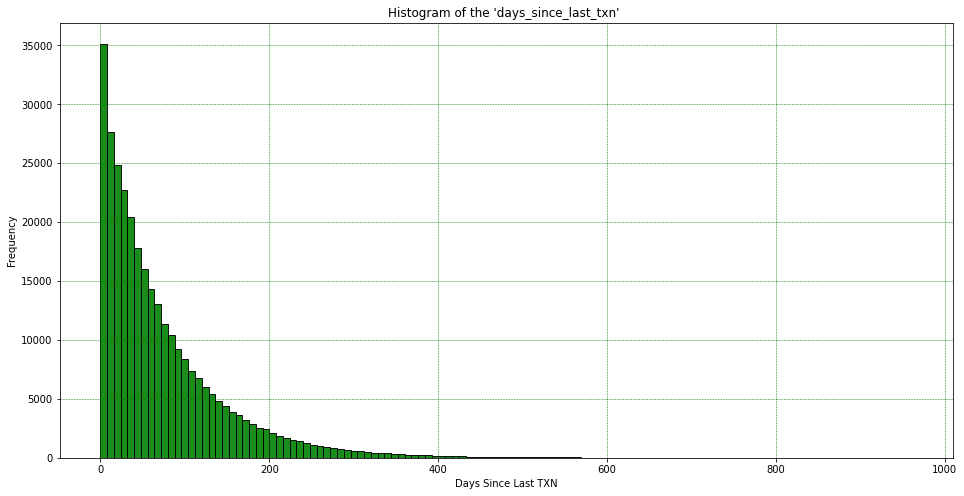

In [0]:
# 5. Plotting a histogram of the ’days since last txn’.

plt.figure(figsize=(16,8)) #changing the figure size for better visualization of the data

bins, counts = days_since_last_txn .select('day_since_last_txn').rdd.flatMap(lambda x: x).histogram(120) # creating the bins and counts of the histogram 
plt.hist(bins[:-1], bins=bins, weights=counts,color = "green", ec="black",  alpha=0.9) # plotting the histogram and changing the features for better presentation 

plt.ylabel("Frequency")
plt.xlabel("Days Since Last TXN")
plt.title("Histogram of the 'days_since_last_txn' ")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

#### Imputing the NaN values

In this case, we cannot set all NaN to 0 because that would not be an accurate representation of the days since a person's last transaction, as it's only NaN because we have a cut-off for the start date of our data.

between mean and median, median is the preferred way to impure the NaN values, as the data is heavily skewed (shown by histogram). This would correspondly skew our imputed mean values, so to avoid that we use median.

In [0]:
# Finding the Median for the dataframe days_since_last_txn

Median = days_since_last_txn.agg(F.percentile_approx("day_since_last_txn", 0.5).alias("median")).collect()[0]

print ("The Median for the days_since_last_txn dataframe is: ", Median[0])

days_since_last_txn = days_since_last_txn.fillna(Median[0])  #Replacing all the null values in the dataframe with the median 
days_since_last_txn.display()

The Median for the days_since_last_txn dataframe is:  51


CLNT_NO ME_DT last_monthly_purchase day_since_last_txn CS1112 2011-05-31 null 51 CS1112 2011-06-30 2011-06-15 15 CS1112 2011-07-31 2011-06-15 46 CS1112 2011-08-31 2011-08-19 12 CS1112 2011-09-30 2011-08-19 42 CS1112 2011-10-31 2011-10-02 29 CS1112 2011-11-30 2011-10-02 59 CS1112 2011-12-31 2011-10-02 90 CS1112 2012-01-31 2011-10-02 121 CS1112 2012-02-29 2011-10-02 150 CS1112 2012-03-31 2011-10-02 181 CS1112 2012-04-30 2012-04-08 22 CS1112 2012-05-31 2012-04-08 53 CS1112 2012-06-30 2012-06-24 6 CS1112 2012-07-31 2012-07-03 28 CS1112 2012-08-31 2012-07-03 59 CS1112 2012-09-30 2012-09-16 14 CS1112 2012-10-31 2012-09-16 45 CS1112 2012-11-30 2012-09-16 75 CS1112 2012-12-31 2012-12-15 16 CS1112 2013-01-31 2012-12-15 47 CS1112 2013-02-28 2012-12-15 75 CS1112 2013-03-31 2013-03-01 30 CS1112 2013-04-30 2013-03-01 60 CS1112 2013-05-31 2013-03-01 91 CS1112 2013-06-30 2013-03-01 121 CS1112 2013-07-31 2013-07-01 30 CS1112 2013-08-31 2013-07-01 61 CS1112 2013-09-30 2013-07-01 91 CS1112 2013-10-31 2013-07-01 122 CS1112 2013-11-30 2013-11-13 17 CS1112 2013-12-31 2013-11-13 48 CS1112 2014-01-31 2013-11-13 79 CS1112 2014-02-28 2013-11-13 107 CS1112 2014-03-31 2013-11-13 138 CS1112 2014-04-30 2014-04-29 1 CS1112 2014-05-31 2014-04-29 32 CS1112 2014-06-30 2014-04-29 62 CS1112 2014-07-31 2014-07-16 15 CS1112 2014-08-31 2014-07-16 46 CS1112 2014-09-30 2014-07-16 76 CS1112 2014-10-31 2014-07-16 107 CS1112 2014-11-30 2014-07-16 137 CS1112 2014-12-31 2014-12-04 27 CS1112 2015-01-31 2015-01-14 17 CS1112 2015-02-28 2015-01-14 45 CS1112 2015-03-31 2015-01-14 76 CS1114 2011-05-31 null 51 CS1114 2011-06-30 null 51 CS1114 2011-07-31 2011-07-14 17 CS1114 2011-08-31 2011-08-24 7 CS1114 2011-09-30 2011-09-19 11 CS1114 2011-10-31 2011-09-19 42 CS1114 2011-11-30 2011-09-19 72 CS1114 2011-12-31 2011-09-19 103 CS1114 2012-01-31 2011-09-19 134 CS1114 2012-02-29 2011-09-19 163 CS1114 2012-03-31 2011-09-19 194 CS1114 2012-04-30 2011-09-19 224 CS1114 2012-05-31 2012-05-13 18 CS1114 2012-06-30 2012-05-13 48 CS1114 2012-07-31 2012-07-28 3 CS1114 2012-08-31 2012-07-28 34 CS1114 2012-09-30 2012-07-28 64 CS1114 2012-10-31 2012-07-28 95 CS1114 2012-11-30 2012-07-28 125 CS1114 2012-12-31 2012-07-28 156 CS1114 2013-01-31 2013-01-17 14 CS1114 2013-02-28 2013-01-17 42 CS1114 2013-03-31 2013-01-17 73 CS1114 2013-04-30 2013-01-17 103 CS1114 2013-05-31 2013-05-27 4 CS1114 2013-06-30 2013-05-27 34 CS1114 2013-07-31 2013-05-27 65 CS1114 2013-08-31 2013-05-27 96 CS1114 2013-09-30 2013-09-11 19 CS1114 2013-10-31 2013-09-11 50 CS1114 2013-11-30 2013-09-11 80 CS1114 2013-12-31 2013-12-29 2 CS1114 2014-01-31 2014-01-25 6 CS1114 2014-02-28 2014-02-04 24 CS1114 2014-03-31 2014-02-04 55 CS1114 2014-04-30 2014-02-04 85 CS1114 2014-05-31 2014-02-04 116 CS1114 2014-06-30 2014-02-04 146 CS1114 2014-07-31 2014-02-04 177 CS1114 2014-08-31 2014-08-31 0 CS1114 2014-09-30 2014-09-01 29 CS1114 2014-10-31 2014-09-01 60 CS1114 2014-11-30 2014-09-01 90 CS1114 2014-12-31 2014-12-31 0 CS1114 2015-01-31 2014-12-31 31 CS1114 2015-02-28 2015-02-12 16 CS1114 2015-03-31 2015-02-12 47 CS1115 2011-05-31 null 51 CS1115 2011-06-30 null 51 CS1115 2011-07-31 null 51 CS1115 2011-08-31 2011-08-10 21 CS1115 2011-09-30 2011-09-11 19 CS1115 2011-10-31 2011-09-11 50 CS1115 2011-11-30 2011-09-11 80 CS1115 2011-12-31 2011-09-11 111 CS1115 2012-01-31 2012-01-06 25 CS1115 2012-02-29 2012-02-26 3 CS1115 2012-03-31 2012-02-26 34 CS1115 2012-04-30 2012-04-23 7 CS1115 2012-05-31 2012-05-03 28 CS1115 2012-06-30 2012-05-03 58 CS1115 2012-07-31 2012-07-18 13 CS1115 2012-08-31 2012-07-18 44 CS1115 2012-09-30 2012-07-18 74 CS1115 2012-10-31 2012-10-16 15 CS1115 2012-11-30 2012-10-16 45 CS1115 2012-12-31 2012-10-16 76 CS1115 2013-01-31 2013-01-19 12 CS1115 2013-02-28 2013-01-19 40 CS1115 2013-03-31 2013-03-20 11 CS1115 2013-04-30 2013-03-20 41 CS1115 2013-05-31 2013-05-11 20 CS1115 2013-06-30 2013-06-27 3 CS1115 2013-07-31 2013-06-27 34 CS1115 2013-08-31 2013-06-27 65 CS1115 2013-09-30 2013-09-18 12 CS1115 2013-10-31 2013-10-17 14 CS11

In [0]:
# 5. Saving [’CLNT_NO’, ’ME_DT’, ’days_since_last_txn’] as a CSV file.

display(days_since_last_txn) # Click the download button below the table display to save the csv file to your local computer 

CLNT_NO ME_DT last_monthly_purchase day_since_last_txn CS1112 2011-05-31 null 51 CS1112 2011-06-30 2011-06-15 15 CS1112 2011-07-31 2011-06-15 46 CS1112 2011-08-31 2011-08-19 12 CS1112 2011-09-30 2011-08-19 42 CS1112 2011-10-31 2011-10-02 29 CS1112 2011-11-30 2011-10-02 59 CS1112 2011-12-31 2011-10-02 90 CS1112 2012-01-31 2011-10-02 121 CS1112 2012-02-29 2011-10-02 150 CS1112 2012-03-31 2011-10-02 181 CS1112 2012-04-30 2012-04-08 22 CS1112 2012-05-31 2012-04-08 53 CS1112 2012-06-30 2012-06-24 6 CS1112 2012-07-31 2012-07-03 28 CS1112 2012-08-31 2012-07-03 59 CS1112 2012-09-30 2012-09-16 14 CS1112 2012-10-31 2012-09-16 45 CS1112 2012-11-30 2012-09-16 75 CS1112 2012-12-31 2012-12-15 16 CS1112 2013-01-31 2012-12-15 47 CS1112 2013-02-28 2012-12-15 75 CS1112 2013-03-31 2013-03-01 30 CS1112 2013-04-30 2013-03-01 60 CS1112 2013-05-31 2013-03-01 91 CS1112 2013-06-30 2013-03-01 121 CS1112 2013-07-31 2013-07-01 30 CS1112 2013-08-31 2013-07-01 61 CS1112 2013-09-30 2013-07-01 91 CS1112 2013-10-31 2013-07-01 122 CS1112 2013-11-30 2013-11-13 17 CS1112 2013-12-31 2013-11-13 48 CS1112 2014-01-31 2013-11-13 79 CS1112 2014-02-28 2013-11-13 107 CS1112 2014-03-31 2013-11-13 138 CS1112 2014-04-30 2014-04-29 1 CS1112 2014-05-31 2014-04-29 32 CS1112 2014-06-30 2014-04-29 62 CS1112 2014-07-31 2014-07-16 15 CS1112 2014-08-31 2014-07-16 46 CS1112 2014-09-30 2014-07-16 76 CS1112 2014-10-31 2014-07-16 107 CS1112 2014-11-30 2014-07-16 137 CS1112 2014-12-31 2014-12-04 27 CS1112 2015-01-31 2015-01-14 17 CS1112 2015-02-28 2015-01-14 45 CS1112 2015-03-31 2015-01-14 76 CS1114 2011-05-31 null 51 CS1114 2011-06-30 null 51 CS1114 2011-07-31 2011-07-14 17 CS1114 2011-08-31 2011-08-24 7 CS1114 2011-09-30 2011-09-19 11 CS1114 2011-10-31 2011-09-19 42 CS1114 2011-11-30 2011-09-19 72 CS1114 2011-12-31 2011-09-19 103 CS1114 2012-01-31 2011-09-19 134 CS1114 2012-02-29 2011-09-19 163 CS1114 2012-03-31 2011-09-19 194 CS1114 2012-04-30 2011-09-19 224 CS1114 2012-05-31 2012-05-13 18 CS1114 2012-06-30 2012-05-13 48 CS1114 2012-07-31 2012-07-28 3 CS1114 2012-08-31 2012-07-28 34 CS1114 2012-09-30 2012-07-28 64 CS1114 2012-10-31 2012-07-28 95 CS1114 2012-11-30 2012-07-28 125 CS1114 2012-12-31 2012-07-28 156 CS1114 2013-01-31 2013-01-17 14 CS1114 2013-02-28 2013-01-17 42 CS1114 2013-03-31 2013-01-17 73 CS1114 2013-04-30 2013-01-17 103 CS1114 2013-05-31 2013-05-27 4 CS1114 2013-06-30 2013-05-27 34 CS1114 2013-07-31 2013-05-27 65 CS1114 2013-08-31 2013-05-27 96 CS1114 2013-09-30 2013-09-11 19 CS1114 2013-10-31 2013-09-11 50 CS1114 2013-11-30 2013-09-11 80 CS1114 2013-12-31 2013-12-29 2 CS1114 2014-01-31 2014-01-25 6 CS1114 2014-02-28 2014-02-04 24 CS1114 2014-03-31 2014-02-04 55 CS1114 2014-04-30 2014-02-04 85 CS1114 2014-05-31 2014-02-04 116 CS1114 2014-06-30 2014-02-04 146 CS1114 2014-07-31 2014-02-04 177 CS1114 2014-08-31 2014-08-31 0 CS1114 2014-09-30 2014-09-01 29 CS1114 2014-10-31 2014-09-01 60 CS1114 2014-11-30 2014-09-01 90 CS1114 2014-12-31 2014-12-31 0 CS1114 2015-01-31 2014-12-31 31 CS1114 2015-02-28 2015-02-12 16 CS1114 2015-03-31 2015-02-12 47 CS1115 2011-05-31 null 51 CS1115 2011-06-30 null 51 CS1115 2011-07-31 null 51 CS1115 2011-08-31 2011-08-10 21 CS1115 2011-09-30 2011-09-11 19 CS1115 2011-10-31 2011-09-11 50 CS1115 2011-11-30 2011-09-11 80 CS1115 2011-12-31 2011-09-11 111 CS1115 2012-01-31 2012-01-06 25 CS1115 2012-02-29 2012-02-26 3 CS1115 2012-03-31 2012-02-26 34 CS1115 2012-04-30 2012-04-23 7 CS1115 2012-05-31 2012-05-03 28 CS1115 2012-06-30 2012-05-03 58 CS1115 2012-07-31 2012-07-18 13 CS1115 2012-08-31 2012-07-18 44 CS1115 2012-09-30 2012-07-18 74 CS1115 2012-10-31 2012-10-16 15 CS1115 2012-11-30 2012-10-16 45 CS1115 2012-12-31 2012-10-16 76 CS1115 2013-01-31 2013-01-19 12 CS1115 2013-02-28 2013-01-19 40 CS1115 2013-03-31 2013-03-20 11 CS1115 2013-04-30 2013-03-20 41 CS1115 2013-05-31 2013-05-11 20 CS1115 2013-06-30 2013-06-27 3 CS1115 2013-07-31 2013-06-27 34 CS1115 2013-08-31 2013-06-27 65 CS1115 2013-09-30 2013-09-18 12 CS1115 2013-10-31 2013-10-17 14 CS11